In [1]:
# handling postgres database
import psycopg2
import pandas.io.sql as sqlio
import pandas as pd 
from sqlalchemy import create_engine
from io import StringIO
from sklearn.linear_model import Lasso
from sklearn import metrics
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt



# Credentails#####################################
USER =  "ineris"
HOSTNAME = ""
PASSWORD = ""
PORT = "5432"
DATABASE = "ineris"
##################################################

Profiles = ('HOA', 'BSOA (marine)', 'ASOA (nitro-PAHs)', 'BSOA (isoprene)', 'ASOA (oxy-PAHs)', 'OPOA/OBBOA', 'SOA (unknown)', 'ASOA (phenolic compounds oxidation)', 'ASOA (toluene oxidation)', 'BBOA')

# I- Effet de l'approche time series entre 2015-03-01 et 2015-03-31

In [2]:
start_date = '2015-03-01'
end_date = '2015-03-31'
sql = f"""SELECT to_char(date, 'YYYY-MM-DD HH24:00:00') FROM(SELECT date FROM public.data_receptor 
          WHERE date>='{start_date}' AND date<='{end_date}' GROUP BY 1 ORDER BY 1) AS foo;"""
connection = psycopg2.connect(user = USER, password = PASSWORD, host = HOSTNAME, port = PORT, database = DATABASE)
df_dates = sqlio.read_sql_query(sql, connection)
connection.close()
dates = df_dates.T.values[0]

In [3]:
df = pd.read_excel('pmf_profiles.xlsx')

df.drop(columns=['Unnamed: 0'], inplace=True)
df.rename(columns={'Unnamed: 1': 'amus'}, inplace=True)
pro = df.columns[1:]

In [4]:
pro

Index(['HOA', 'BSOA (marine)', 'ASOA (nitro-PAHs)', 'BSOA (isoprene)',
       'ASOA (oxy-PAHs)', 'OPOA/OBBOA', 'SOA (unknown)',
       'ASOA (phenolic compounds oxidation)', 'ASOA (toluene oxidation)',
       'BBOA'],
      dtype='object')

In [5]:
contirubtion = [[] for i in pro]
for i in dates[3:]:    
    date = i
    date_be = (datetime.strptime(date, '%Y-%m-%d %H:%M:%S')-timedelta(hours=1)).strftime('%Y-%m-%d %H:%M:%S')
    date_bee = (datetime.strptime(date, '%Y-%m-%d %H:%M:%S')-timedelta(hours=2)).strftime('%Y-%m-%d %H:%M:%S')
    sql = f"""SELECT * FROM public.data_receptor where date = '{date}' 
    or date = '{date_be}' or date = '{date_bee}'
    order by mass;"""
    connection = psycopg2.connect(user = USER, password = PASSWORD, host = HOSTNAME, port = PORT, database = DATABASE)
    df_receptor_data = sqlio.read_sql_query(sql, connection)
    connection.close()
    df_receptor_data = df_receptor_data[df_receptor_data.columns]
    cor = df.merge(df_receptor_data, left_on='amus', right_on='mass').drop(columns=['mass', 'amus'])


    X_train = cor[pro].values
    y_train = cor['value'].values.reshape(-1,1)

    alpha = 0.0001
    lasso = Lasso(fit_intercept=False, alpha=alpha, positive=True)     # We train without intercept and we shoose to have only positive values
    lasso.fit(X_train, y_train)                                        #training the algorithm  
    print(date)
    for n, prof in enumerate(pro):
        contirubtion[n].append(lasso.coef_[n])

2015-03-01 03:00:00
2015-03-01 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4842545122260853e-05, tolerance: 1.2260852485872674e-05
  positive)


2015-03-01 05:00:00
2015-03-01 06:00:00
2015-03-01 07:00:00
2015-03-01 08:00:00
2015-03-01 09:00:00
2015-03-01 10:00:00
2015-03-01 11:00:00
2015-03-01 12:00:00
2015-03-01 13:00:00
2015-03-01 14:00:00
2015-03-01 15:00:00
2015-03-01 16:00:00
2015-03-01 17:00:00
2015-03-01 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00015157537693739204, tolerance: 0.0001377423514523311
  positive)


2015-03-01 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00014733525607293907, tolerance: 0.00013413319095360892
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001268720937902812, tolerance: 9.026657680882358e-05
  positive)


2015-03-01 20:00:00
2015-03-01 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.135876368707245e-05, tolerance: 4.6017435075171545e-05
  positive)


2015-03-01 22:00:00
2015-03-01 23:00:00
2015-03-02 00:00:00
2015-03-02 01:00:00
2015-03-02 02:00:00
2015-03-02 03:00:00
2015-03-02 04:00:00
2015-03-02 05:00:00
2015-03-02 06:00:00
2015-03-02 07:00:00
2015-03-02 08:00:00
2015-03-02 09:00:00
2015-03-02 10:00:00
2015-03-02 11:00:00
2015-03-02 12:00:00
2015-03-02 13:00:00
2015-03-02 14:00:00
2015-03-02 15:00:00
2015-03-02 16:00:00
2015-03-02 17:00:00
2015-03-02 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8067332001030917e-05, tolerance: 1.5744488546220098e-05
  positive)


2015-03-02 19:00:00
2015-03-02 20:00:00
2015-03-02 21:00:00
2015-03-02 22:00:00
2015-03-02 23:00:00
2015-03-03 00:00:00
2015-03-03 01:00:00
2015-03-03 02:00:00
2015-03-03 03:00:00
2015-03-03 04:00:00
2015-03-03 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00061403369195525, tolerance: 0.00038445020981305673
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005148629084568354, tolerance: 0.0003993964630289607
  positive)


2015-03-03 06:00:00
2015-03-03 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006443129177366724, tolerance: 0.0003686479006467609
  positive)


2015-03-03 08:00:00
2015-03-03 09:00:00
2015-03-03 10:00:00
2015-03-03 11:00:00
2015-03-03 12:00:00
2015-03-03 13:00:00
2015-03-03 14:00:00
2015-03-03 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.063506926247755e-05, tolerance: 3.670596714234731e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.031830827500037e-05, tolerance: 4.201712072304061e-05
  positive)


2015-03-03 16:00:00
2015-03-03 17:00:00
2015-03-03 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010650642024555637, tolerance: 9.103053519447378e-05
  positive)


2015-03-03 19:00:00
2015-03-03 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.618094942832276e-05, tolerance: 6.629442273542327e-05
  positive)


2015-03-03 21:00:00
2015-03-03 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.708638368184804e-05, tolerance: 4.363088493251558e-05
  positive)


2015-03-03 23:00:00
2015-03-04 00:00:00
2015-03-04 01:00:00
2015-03-04 02:00:00
2015-03-04 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00011729102889406623, tolerance: 7.778959406118554e-05
  positive)


2015-03-04 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.711674913542509e-05, tolerance: 8.849800522222594e-05
  positive)


2015-03-04 05:00:00
2015-03-04 06:00:00
2015-03-04 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.392212912763236e-05, tolerance: 8.191822826310258e-05
  positive)


2015-03-04 08:00:00
2015-03-04 09:00:00
2015-03-04 10:00:00
2015-03-04 11:00:00
2015-03-04 12:00:00
2015-03-04 13:00:00
2015-03-04 14:00:00
2015-03-04 15:00:00
2015-03-04 16:00:00
2015-03-04 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8340091335534177e-05, tolerance: 3.081037729441365e-05
  positive)


2015-03-04 18:00:00
2015-03-04 19:00:00
2015-03-04 20:00:00
2015-03-04 21:00:00
2015-03-04 22:00:00
2015-03-04 23:00:00
2015-03-05 00:00:00
2015-03-05 01:00:00
2015-03-05 02:00:00
2015-03-05 03:00:00
2015-03-05 04:00:00
2015-03-05 05:00:00
2015-03-05 06:00:00
2015-03-05 07:00:00
2015-03-05 08:00:00
2015-03-05 09:00:00
2015-03-05 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010229924060566609, tolerance: 0.0005187058761465277
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003780202754498363, tolerance: 0.00037756056931654723
  positive)


2015-03-05 11:00:00
2015-03-05 12:00:00
2015-03-05 13:00:00
2015-03-05 14:00:00
2015-03-05 15:00:00
2015-03-05 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00014296223166547148, tolerance: 0.0001017940753538837
  positive)


2015-03-05 17:00:00
2015-03-05 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00014669201880120747, tolerance: 0.00014065683028717917
  positive)


2015-03-05 19:00:00
2015-03-05 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006916634100130326, tolerance: 0.0005150342247693499
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009089915611305566, tolerance: 0.0008242992055454363
  positive)


2015-03-05 21:00:00
2015-03-05 22:00:00
2015-03-05 23:00:00
2015-03-06 00:00:00
2015-03-06 01:00:00
2015-03-06 02:00:00
2015-03-06 03:00:00
2015-03-06 04:00:00
2015-03-06 05:00:00
2015-03-06 06:00:00
2015-03-06 07:00:00
2015-03-06 08:00:00
2015-03-06 09:00:00
2015-03-06 10:00:00
2015-03-06 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009610357648179579, tolerance: 0.0007086226799924907
  positive)


2015-03-06 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009121617916475755, tolerance: 0.0006892767922692316
  positive)


2015-03-06 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009334656252859702, tolerance: 0.0007375883223351295
  positive)


2015-03-06 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010942825166658648, tolerance: 0.0007793645910027376
  positive)


2015-03-06 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019100810944283758, tolerance: 0.0008731348028888754
  positive)


2015-03-06 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017279268740896664, tolerance: 0.0008349550462356449
  positive)


2015-03-06 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017195218409226942, tolerance: 0.0008165005532225746
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013019384066151884, tolerance: 0.0011784031793330247
  positive)


2015-03-06 18:00:00
2015-03-06 19:00:00
2015-03-06 20:00:00
2015-03-06 21:00:00
2015-03-06 22:00:00
2015-03-06 23:00:00
2015-03-07 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0022072705397437886, tolerance: 0.001867782197112214
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026649080013039783, tolerance: 0.001576665094283794
  positive)


2015-03-07 01:00:00
2015-03-07 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029039223656518176, tolerance: 0.0015479410722665414
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034193371908375347, tolerance: 0.002182043214783679
  positive)


2015-03-07 03:00:00
2015-03-07 04:00:00
2015-03-07 05:00:00
2015-03-07 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003934825570835743, tolerance: 0.0034453927839019024
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00446549847598765, tolerance: 0.0032969037775853866
  positive)


2015-03-07 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0048132277989500205, tolerance: 0.003215352225160648
  positive)


2015-03-07 08:00:00
2015-03-07 09:00:00
2015-03-07 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00381999016832385, tolerance: 0.0029040866033344646
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025747180046490903, tolerance: 0.002262699844496619
  positive)


2015-03-07 11:00:00
2015-03-07 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001749800941478613, tolerance: 0.0017448145045272662
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001664010689462203, tolerance: 0.0014378521600459076
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017680213597455544, tolerance: 0.0014015608313072741
  positive)


2015-03-07 13:00:00
2015-03-07 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001956627564184854, tolerance: 0.0015626212224797505
  positive)


2015-03-07 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0022148465401222728, tolerance: 0.001714439709020966
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002113235729069733, tolerance: 0.0019242294178700508
  positive)


2015-03-07 16:00:00
2015-03-07 17:00:00
2015-03-07 18:00:00
2015-03-07 19:00:00
2015-03-07 20:00:00
2015-03-07 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034199545157176936, tolerance: 0.0026721787173934063
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0039818074228291644, tolerance: 0.003678344677276357
  positive)


2015-03-07 22:00:00
2015-03-07 23:00:00
2015-03-08 00:00:00
2015-03-08 01:00:00
2015-03-08 02:00:00
2015-03-08 03:00:00
2015-03-08 04:00:00
2015-03-08 05:00:00
2015-03-08 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00504783894662518, tolerance: 0.004325977713384124
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005123712218443904, tolerance: 0.004165128105870015
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004669363797080328, tolerance: 0.0036860720481350345
  positive)


2015-03-08 07:00:00
2015-03-08 08:00:00
2015-03-08 09:00:00
2015-03-08 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001971235918328207, tolerance: 0.0017366002890565743
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002732020400093904, tolerance: 0.0015073703538332074
  positive)


2015-03-08 11:00:00
2015-03-08 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00223116012304974, tolerance: 0.0011897173824628362
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001632520397108518, tolerance: 0.0011114874902999118
  positive)


2015-03-08 13:00:00
2015-03-08 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016486579746191124, tolerance: 0.001060649970085235
  positive)


2015-03-08 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010517499206555425, tolerance: 0.0008137646784290576
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012872931545674926, tolerance: 0.0006677560987173814
  positive)


2015-03-08 16:00:00
2015-03-08 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008226933877744508, tolerance: 0.0005552556505385325
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018707850064979548, tolerance: 0.001061462277593323
  positive)


2015-03-08 18:00:00
2015-03-08 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025853049579573906, tolerance: 0.0018178663499867802
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004012217776542815, tolerance: 0.0026066864973142423
  positive)


2015-03-08 20:00:00
2015-03-08 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003960718916792949, tolerance: 0.002512351157211112
  positive)


2015-03-08 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0024552184725388226, tolerance: 0.0017373944522145566
  positive)


2015-03-08 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012853890576380866, tolerance: 0.0007789526217494864
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00041658820948353714, tolerance: 0.00028846906735647404
  positive)


2015-03-09 00:00:00
2015-03-09 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00017805508183776908, tolerance: 0.00016868254452078151
  positive)


2015-03-09 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00017590190754484397, tolerance: 0.00015508464871561011
  positive)


2015-03-09 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00016730675945435605, tolerance: 0.0001462890214983288
  positive)


2015-03-09 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00024394812043443403, tolerance: 0.0001720906032463571
  positive)


2015-03-09 05:00:00
2015-03-09 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00045757358773312884, tolerance: 0.0004423769891436594
  positive)


2015-03-09 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006464177258781872, tolerance: 0.0005839480945630853
  positive)


2015-03-09 08:00:00
2015-03-09 09:00:00
2015-03-09 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009219581745333952, tolerance: 0.0005313777080884364
  positive)


2015-03-09 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00129775427951841, tolerance: 0.0005502736981394689
  positive)


2015-03-09 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013778937870066732, tolerance: 0.0006335271847228735
  positive)


2015-03-09 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001506641855762797, tolerance: 0.0007872256428792002
  positive)


2015-03-09 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002113136979360067, tolerance: 0.0010503576124809713
  positive)


2015-03-09 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00251754136500712, tolerance: 0.0012521441338528454
  positive)


2015-03-09 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029840836888380684, tolerance: 0.0015192387208813201
  positive)


2015-03-09 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023007177671986456, tolerance: 0.001996058921315218
  positive)


2015-03-09 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0022993668738446604, tolerance: 0.0022766805115232705
  positive)


2015-03-09 19:00:00
2015-03-09 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0031765593474164244, tolerance: 0.002879882555547418
  positive)


2015-03-09 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0038825489062950524, tolerance: 0.0031642286365004425
  positive)


2015-03-09 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004073008205350004, tolerance: 0.0032923502761699475
  positive)


2015-03-09 23:00:00
2015-03-10 00:00:00
2015-03-10 01:00:00
2015-03-10 02:00:00
2015-03-10 03:00:00
2015-03-10 04:00:00
2015-03-10 05:00:00
2015-03-10 06:00:00
2015-03-10 07:00:00
2015-03-10 08:00:00
2015-03-10 09:00:00
2015-03-10 10:00:00
2015-03-10 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001959329864691828, tolerance: 0.00184666092390612
  positive)


2015-03-10 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015595823853133406, tolerance: 0.001429407153168577
  positive)


2015-03-10 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012926791934258774, tolerance: 0.0010442952223378885
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013336081113480835, tolerance: 0.0009790636499744064
  positive)


2015-03-10 14:00:00
2015-03-10 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008414373180617996, tolerance: 0.0007575130253729393
  positive)


2015-03-10 16:00:00
2015-03-10 17:00:00
2015-03-10 18:00:00
2015-03-10 19:00:00
2015-03-10 20:00:00
2015-03-10 21:00:00
2015-03-10 22:00:00
2015-03-10 23:00:00
2015-03-11 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011802985905649127, tolerance: 0.0007457325628916934
  positive)


2015-03-11 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009413238852788858, tolerance: 0.0006425836390133779
  positive)


2015-03-11 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001038702660369012, tolerance: 0.000686844331584324
  positive)


2015-03-11 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001676348754784951, tolerance: 0.000901096696833384
  positive)


2015-03-11 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001216848615125013, tolerance: 0.001108500787333204
  positive)


2015-03-11 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013365960415410716, tolerance: 0.0012755116145171694
  positive)


2015-03-11 06:00:00
2015-03-11 07:00:00
2015-03-11 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003730640739663671, tolerance: 0.0026733090877147495
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006099151236295702, tolerance: 0.0032662170959117647
  positive)


2015-03-11 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006162990449601738, tolerance: 0.0034182198774315403
  positive)


2015-03-11 10:00:00
2015-03-11 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005134509458833092, tolerance: 0.003308343135945714
  positive)


2015-03-11 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0048796491092901045, tolerance: 0.0030754890047352563
  positive)


2015-03-11 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004491610133445043, tolerance: 0.002905368046637135
  positive)


2015-03-11 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004303658675124111, tolerance: 0.002564922550847107
  positive)


2015-03-11 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004082881954585421, tolerance: 0.0023579008116783855
  positive)


2015-03-11 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004507465463214594, tolerance: 0.0023105606533385067
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004603015307830902, tolerance: 0.0024912310435740584
  positive)


2015-03-11 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0049320529152125925, tolerance: 0.0029967451574757996
  positive)


2015-03-11 18:00:00
2015-03-11 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004442710565578656, tolerance: 0.0033562495549511384
  positive)


2015-03-11 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0052042986713423806, tolerance: 0.003839182613486294
  positive)


2015-03-11 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005471888834669286, tolerance: 0.004125808758921619
  positive)


2015-03-11 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006398470262207828, tolerance: 0.004200528975822169
  positive)


2015-03-11 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005967636281655753, tolerance: 0.003723989175865455
  positive)


2015-03-12 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003510848477576878, tolerance: 0.0028308765446176027
  positive)


2015-03-12 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034920621096969917, tolerance: 0.0019704884397651404
  positive)


2015-03-12 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035475463938872687, tolerance: 0.0015632158889082425
  positive)


2015-03-12 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026734130534734474, tolerance: 0.0011769065583446532
  positive)


2015-03-12 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016845752112606832, tolerance: 0.0009717312673332861
  positive)


2015-03-12 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009105601395381288, tolerance: 0.000842861484309335
  positive)


2015-03-12 06:00:00
2015-03-12 07:00:00
2015-03-12 08:00:00
2015-03-12 09:00:00
2015-03-12 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009281603056188123, tolerance: 0.0007420933332224373
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009758396739853598, tolerance: 0.000673552418978904
  positive)


2015-03-12 11:00:00
2015-03-12 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006652578701120682, tolerance: 0.0005924200617230926
  positive)


2015-03-12 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006093871558981723, tolerance: 0.00036150038075862705
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000560277159500612, tolerance: 0.00029441980803677386
  positive)


2015-03-12 14:00:00
2015-03-12 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008444496079499236, tolerance: 0.00032628201118403255
  positive)


2015-03-12 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000586958826950798, tolerance: 0.0003456390792156829
  positive)


2015-03-12 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007094273264561038, tolerance: 0.0004089602285379599
  positive)


2015-03-12 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009060717469033322, tolerance: 0.00046180531273156024
  positive)


2015-03-12 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012916158565104974, tolerance: 0.0007181061833300621
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015975031042903542, tolerance: 0.0010320176736749878
  positive)


2015-03-12 20:00:00
2015-03-12 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013823339211496977, tolerance: 0.0011927541910029648
  positive)


2015-03-12 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011503838341590522, tolerance: 0.0010254752167365557
  positive)


2015-03-12 23:00:00
2015-03-13 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000960236935712469, tolerance: 0.0006661519290590782
  positive)


2015-03-13 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001022348684184507, tolerance: 0.0007284906829245345
  positive)


2015-03-13 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012050029624003505, tolerance: 0.0008072163598705817
  positive)


2015-03-13 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012701405477223496, tolerance: 0.0008931353129330347
  positive)


2015-03-13 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001825806845407063, tolerance: 0.0010902048766126356
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002396207412327933, tolerance: 0.0013911773579538729
  positive)


2015-03-13 05:00:00
2015-03-13 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003004844076418614, tolerance: 0.0017010413368096341
  positive)


2015-03-13 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021502353194696178, tolerance: 0.0019233296571715371
  positive)


2015-03-13 08:00:00
2015-03-13 09:00:00
2015-03-13 10:00:00
2015-03-13 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0020640071921809514, tolerance: 0.0017803798790243341
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001923706382766524, tolerance: 0.001630841047775407
  positive)


2015-03-13 12:00:00
2015-03-13 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015267922698697367, tolerance: 0.0012883277960006692
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011344854892151313, tolerance: 0.0010528288212074063
  positive)


2015-03-13 14:00:00
2015-03-13 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002049483133318347, tolerance: 0.0010314763915872853
  positive)


2015-03-13 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025468227777195596, tolerance: 0.0012960580592907595
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003595086764546146, tolerance: 0.0016268022130342431
  positive)


2015-03-13 17:00:00
2015-03-13 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0028184936322859927, tolerance: 0.001882396373494201
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027278153381086467, tolerance: 0.002205050278331382
  positive)


2015-03-13 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026517781326132195, tolerance: 0.0024955374941533544
  positive)


2015-03-13 20:00:00
2015-03-13 21:00:00
2015-03-13 22:00:00
2015-03-13 23:00:00
2015-03-14 00:00:00
2015-03-14 01:00:00
2015-03-14 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006150025785871371, tolerance: 0.004693942869148427
  positive)


2015-03-14 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004852694952929601, tolerance: 0.0039479169434528645
  positive)


2015-03-14 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004558597190809005, tolerance: 0.003430766993847118
  positive)


2015-03-14 05:00:00
2015-03-14 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002174171450942952, tolerance: 0.0020432288178484797
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0020540713557503504, tolerance: 0.0016362977042226625
  positive)


2015-03-14 07:00:00
2015-03-14 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014832837858940046, tolerance: 0.0014338695936989983
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002004354906339309, tolerance: 0.0014310742071238466
  positive)


2015-03-14 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023489027081230185, tolerance: 0.0015416949364217523
  positive)


2015-03-14 10:00:00
2015-03-14 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00285253119149656, tolerance: 0.0019283752281842787
  positive)


2015-03-14 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003443059726992076, tolerance: 0.0020627116797366438
  positive)


2015-03-14 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003716556735591861, tolerance: 0.002167706242047974
  positive)


2015-03-14 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004879256819300848, tolerance: 0.0023818072953822106
  positive)


2015-03-14 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004981804885311303, tolerance: 0.002794607151705122
  positive)


2015-03-14 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005876061857694029, tolerance: 0.002922989272557056
  positive)


2015-03-14 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006528158054789804, tolerance: 0.002994009122207314
  positive)


2015-03-14 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006498861673364553, tolerance: 0.003228912010792543
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007728398384074575, tolerance: 0.003972130341397508
  positive)


2015-03-14 19:00:00
2015-03-14 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010704973642696625, tolerance: 0.005133670143941076
  positive)


2015-03-14 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013488173248975333, tolerance: 0.0062557697190376476
  positive)


2015-03-14 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014192214598890723, tolerance: 0.00674813025181562
  positive)


2015-03-14 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013588370926877924, tolerance: 0.007240190477326021
  positive)


2015-03-15 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013392073667464088, tolerance: 0.00758589743505494
  positive)


2015-03-15 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012348270808515444, tolerance: 0.008087165469013615
  positive)


2015-03-15 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011294228644364135, tolerance: 0.007469892228072096
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009830681502907251, tolerance: 0.006873558856157209
  positive)


2015-03-15 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010205200281657174, tolerance: 0.006352460062512786
  positive)


2015-03-15 04:00:00
2015-03-15 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010479647490901516, tolerance: 0.006337030915925574
  positive)


2015-03-15 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010847470845636059, tolerance: 0.006147875446197447
  positive)


2015-03-15 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011949254777751175, tolerance: 0.006253192920486832
  positive)


2015-03-15 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013691537790793087, tolerance: 0.006326692929177378
  positive)


2015-03-15 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01437975185275725, tolerance: 0.006280417751822356
  positive)


2015-03-15 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013610948726938785, tolerance: 0.006046617147907928
  positive)


2015-03-15 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010972195100959536, tolerance: 0.005477997773577912
  positive)


2015-03-15 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01040347425645119, tolerance: 0.005002688826863229
  positive)


2015-03-15 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009145567378937125, tolerance: 0.004412683751630732
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008421231336271873, tolerance: 0.003961792167110155
  positive)


2015-03-15 14:00:00
2015-03-15 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007032776305858329, tolerance: 0.00357673858797118
  positive)


2015-03-15 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004715574033066258, tolerance: 0.0031466342522307052
  positive)


2015-03-15 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002906666365475513, tolerance: 0.002832623455347162
  positive)


2015-03-15 18:00:00
2015-03-15 19:00:00
2015-03-15 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026116088189293424, tolerance: 0.0024183143891087803
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029700473133131428, tolerance: 0.002508492640947071
  positive)


2015-03-15 21:00:00
2015-03-15 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003522084993722408, tolerance: 0.002621009434462498
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030209297139876315, tolerance: 0.0024736956885663543
  positive)


2015-03-15 23:00:00
2015-03-16 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026631910256959546, tolerance: 0.002168462959387413
  positive)


2015-03-16 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025130192805588036, tolerance: 0.0019407293820461774
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0033603491335997757, tolerance: 0.0017806795107478419
  positive)


2015-03-16 02:00:00
2015-03-16 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003508879410726605, tolerance: 0.0017656247709699174
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003423795258372452, tolerance: 0.0016506503129193042
  positive)


2015-03-16 04:00:00
2015-03-16 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016661832785007935, tolerance: 0.0015900273441422713
  positive)


2015-03-16 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018120883647657626, tolerance: 0.0017589624646843192
  positive)


2015-03-16 07:00:00
2015-03-16 08:00:00
2015-03-16 09:00:00
2015-03-16 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003910743960343563, tolerance: 0.0034778812628441865
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005506485676359932, tolerance: 0.0037496614476984977
  positive)


2015-03-16 11:00:00
2015-03-16 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006240189445645333, tolerance: 0.0040842680634355435
  positive)


2015-03-16 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010333951632264193, tolerance: 0.004677410633119549
  positive)


2015-03-16 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009386012080173964, tolerance: 0.004867799598205246
  positive)


2015-03-16 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01042293025920113, tolerance: 0.005155171240956748
  positive)


2015-03-16 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010720769971704597, tolerance: 0.0053465402402974975
  positive)


2015-03-16 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011020954607467215, tolerance: 0.005508628938895914
  positive)


2015-03-16 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00718366754770397, tolerance: 0.005234713175449313
  positive)


2015-03-16 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00639449788885052, tolerance: 0.005249572771371613
  positive)


2015-03-16 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0068301030726108936, tolerance: 0.006017594726967091
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008981159387984494, tolerance: 0.007942323760867185
  positive)


2015-03-16 21:00:00
2015-03-16 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012800524603904018, tolerance: 0.010132085242379598
  positive)


2015-03-16 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017772731663184382, tolerance: 0.012203102283263297
  positive)


2015-03-17 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021391731416692122, tolerance: 0.013266801369892126
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0235695444643238, tolerance: 0.014189019628221741
  positive)


2015-03-17 01:00:00
2015-03-17 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021816279281263645, tolerance: 0.014148308728703997
  positive)


2015-03-17 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020816837316109088, tolerance: 0.014660228936326946
  positive)


2015-03-17 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021297631514054227, tolerance: 0.014703120673785203
  positive)


2015-03-17 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01957038560394142, tolerance: 0.014932737876659843
  positive)


2015-03-17 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01921575384897592, tolerance: 0.01513747060104542
  positive)


2015-03-17 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017381231287902033, tolerance: 0.015234815067784834
  positive)


2015-03-17 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017934975564315336, tolerance: 0.014996172010344635
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013125615282696401, tolerance: 0.011192874711075013
  positive)


2015-03-17 09:00:00
2015-03-17 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007584215144822437, tolerance: 0.00675484720131312
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003709994209780243, tolerance: 0.0028580185863627586
  positive)


2015-03-17 11:00:00
2015-03-17 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002240588669686683, tolerance: 0.0018921601726853393
  positive)


2015-03-17 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016443579308969627, tolerance: 0.0016159652196834195
  positive)


2015-03-17 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016530956133239405, tolerance: 0.0015616889588141692
  positive)


2015-03-17 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002032105100227277, tolerance: 0.0016319753712612582
  positive)


2015-03-17 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030371006613885004, tolerance: 0.0017662059544163917
  positive)


2015-03-17 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004088431830307215, tolerance: 0.002221802674568193
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003890283949299106, tolerance: 0.0025636184561353636
  positive)


2015-03-17 18:00:00
2015-03-17 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004016968511410701, tolerance: 0.003225613947817023
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004598589727319191, tolerance: 0.00386849944324718
  positive)


2015-03-17 20:00:00
2015-03-17 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004818406106117196, tolerance: 0.004707614157709666
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005802530212289464, tolerance: 0.005362447711739379
  positive)


2015-03-17 22:00:00
2015-03-17 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006449392023872749, tolerance: 0.005620666649245936
  positive)


2015-03-18 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006850687639989583, tolerance: 0.006229017604650509
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007696480693049235, tolerance: 0.006634744581395208
  positive)


2015-03-18 01:00:00
2015-03-18 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00931119297414082, tolerance: 0.007056141940302408
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009608197328709517, tolerance: 0.007104160969223844
  positive)


2015-03-18 03:00:00
2015-03-18 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009603825298832996, tolerance: 0.007469418419650842
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011565178137478704, tolerance: 0.008915412473999263
  positive)


2015-03-18 05:00:00
2015-03-18 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016051252863483745, tolerance: 0.01142346699303182
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01846515894417, tolerance: 0.014227704125984285
  positive)


2015-03-18 07:00:00
2015-03-18 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023709998060720605, tolerance: 0.016363257848622536
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02517609677790203, tolerance: 0.017405219532134277
  positive)


2015-03-18 09:00:00
2015-03-18 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02600726535992548, tolerance: 0.017256039767538204
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02710313287413746, tolerance: 0.016601034949102866
  positive)


2015-03-18 11:00:00
2015-03-18 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.027789848644630077, tolerance: 0.01561970638493477
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.028105724682135624, tolerance: 0.015537912448309973
  positive)


2015-03-18 13:00:00
2015-03-18 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02800101607604724, tolerance: 0.015494785365969682
  positive)


2015-03-18 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.030875470911878172, tolerance: 0.015711011208733767
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.030484906432845016, tolerance: 0.016106761889385802
  positive)


2015-03-18 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03354003641564174, tolerance: 0.01839998614114627
  positive)


2015-03-18 17:00:00
2015-03-18 18:00:00
2015-03-18 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03387384684785433, tolerance: 0.020723074630270462
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03600396285578367, tolerance: 0.02098558846104192
  positive)


2015-03-18 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.031031252843128687, tolerance: 0.01875473757404811
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.024847558379071266, tolerance: 0.015191727716745403
  positive)


2015-03-18 21:00:00
2015-03-18 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01842050053580735, tolerance: 0.011861459427456197
  positive)


2015-03-18 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012222708251878434, tolerance: 0.008664370054313917
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008578450171736751, tolerance: 0.006461345317372483
  positive)


2015-03-19 00:00:00
2015-03-19 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007752651527070303, tolerance: 0.005694832322296152
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007349497254105733, tolerance: 0.005422311385340061
  positive)


2015-03-19 02:00:00
2015-03-19 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007248544011518948, tolerance: 0.005221960917458607
  positive)


2015-03-19 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005942847659865594, tolerance: 0.004908189220910548
  positive)


2015-03-19 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005723020728459129, tolerance: 0.004715656122861542
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005529756306971889, tolerance: 0.004542861671643701
  positive)


2015-03-19 06:00:00
2015-03-19 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005308848842096897, tolerance: 0.0040850683991726965
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0040024421128097565, tolerance: 0.0031094016522675715
  positive)


2015-03-19 08:00:00
2015-03-19 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035338165879814643, tolerance: 0.00229011384170961
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002621473482341683, tolerance: 0.001755555819135534
  positive)


2015-03-19 10:00:00
2015-03-19 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002633344080263486, tolerance: 0.0017918209316893279
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002938126146965727, tolerance: 0.0019117247632725175
  positive)


2015-03-19 12:00:00
2015-03-19 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003276165681609558, tolerance: 0.0018485070815665737
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003285536117775087, tolerance: 0.0018403892185545013
  positive)


2015-03-19 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002684308073795428, tolerance: 0.0017085403821641301
  positive)


2015-03-19 15:00:00
2015-03-19 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0028933018120569885, tolerance: 0.001756928185283519
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00369576157689791, tolerance: 0.001840652728531628
  positive)


2015-03-19 17:00:00
2015-03-19 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004452650198422725, tolerance: 0.002192787228635386
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005093479678936863, tolerance: 0.0026908273770587373
  positive)


2015-03-19 19:00:00
2015-03-19 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005971201172007334, tolerance: 0.0034257894746499086
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008358965440514843, tolerance: 0.004638913751974624
  positive)


2015-03-19 21:00:00
2015-03-19 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010616948541437798, tolerance: 0.006278173710407486
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01423383630561259, tolerance: 0.007943148134831875
  positive)


2015-03-19 23:00:00
2015-03-20 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014628843605065667, tolerance: 0.00917672704312268
  positive)


2015-03-20 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014261299058157095, tolerance: 0.009918895345892687
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014466968134936017, tolerance: 0.010604974272211014
  positive)


2015-03-20 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015141958738649264, tolerance: 0.01073898969944582
  positive)


2015-03-20 03:00:00
2015-03-20 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014983052163073218, tolerance: 0.01099937991723216
  positive)


2015-03-20 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015646100855325085, tolerance: 0.011683767166277005
  positive)


2015-03-20 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01575048750607294, tolerance: 0.01207937303743797
  positive)


2015-03-20 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014471274672931966, tolerance: 0.011861143970847128
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013852260111302916, tolerance: 0.01048750388353056
  positive)


2015-03-20 08:00:00
2015-03-20 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015789435961428594, tolerance: 0.010046311969099176
  positive)


2015-03-20 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016443879504925235, tolerance: 0.010242311130690985
  positive)


2015-03-20 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018606225934545473, tolerance: 0.011199347403190691
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022406424892871257, tolerance: 0.012556428428091524
  positive)


2015-03-20 12:00:00
2015-03-20 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.025400936971424537, tolerance: 0.014445281624643525
  positive)


2015-03-20 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03121879265754085, tolerance: 0.01632555490117294
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03656174184427757, tolerance: 0.017642516039564574
  positive)


2015-03-20 15:00:00
2015-03-20 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03736703962307214, tolerance: 0.01905003621114963
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.036606166024822584, tolerance: 0.021072284302533814
  positive)


2015-03-20 17:00:00
2015-03-20 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03849337355569804, tolerance: 0.023646375791258646
  positive)


2015-03-20 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.040176585158832157, tolerance: 0.02573184621493789
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04168882898333043, tolerance: 0.027445938591506226
  positive)


2015-03-20 20:00:00
2015-03-20 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.044475214472203095, tolerance: 0.028831837095367407
  positive)


2015-03-20 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04835622628060954, tolerance: 0.030001532896732307
  positive)


2015-03-20 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.048161105694642714, tolerance: 0.030250893543480414
  positive)


2015-03-21 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04721298485928538, tolerance: 0.030983549682271714
  positive)


2015-03-21 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04479004423927091, tolerance: 0.030929515311170906
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04861027065809159, tolerance: 0.03210976667100115
  positive)


2015-03-21 02:00:00
2015-03-21 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0549974080497575, tolerance: 0.03367168470998182
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.053734767857541776, tolerance: 0.03536719144230381
  positive)


2015-03-21 04:00:00
2015-03-21 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05192321081707524, tolerance: 0.034952463789689775
  positive)


2015-03-21 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.043581191808488295, tolerance: 0.029434985418804436
  positive)


2015-03-21 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.028619752669706955, tolerance: 0.021528720724910612
  positive)


2015-03-21 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01847931452950169, tolerance: 0.0139661589123823
  positive)


2015-03-21 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013251805510475223, tolerance: 0.010248698216387494
  positive)


2015-03-21 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014255480944390692, tolerance: 0.009207019826119787
  positive)


2015-03-21 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0119283678046469, tolerance: 0.007635190966486931
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008655354802340032, tolerance: 0.005297055348615108
  positive)


2015-03-21 12:00:00
2015-03-21 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004421838131506206, tolerance: 0.002630295509435752
  positive)


2015-03-21 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013914963150623016, tolerance: 0.001106014863596477
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005539513628163295, tolerance: 0.00036791230808734277
  positive)


2015-03-21 15:00:00
2015-03-21 16:00:00
2015-03-21 17:00:00
2015-03-21 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00011300025912295078, tolerance: 0.00011280340538589351
  positive)


2015-03-21 19:00:00
2015-03-21 20:00:00
2015-03-21 21:00:00
2015-03-21 22:00:00
2015-03-21 23:00:00
2015-03-22 00:00:00
2015-03-22 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00031589625919403036, tolerance: 0.0001914007654398508
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00037554024298528874, tolerance: 0.00021738965907929693
  positive)


2015-03-22 02:00:00
2015-03-22 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00043712723733149716, tolerance: 0.0002690935832714768
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005328483231870351, tolerance: 0.0003516578055170321
  positive)


2015-03-22 04:00:00
2015-03-22 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005688522226026602, tolerance: 0.00039067640306763353
  positive)


2015-03-22 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006373804668503048, tolerance: 0.00041664938756191296
  positive)


2015-03-22 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00047320938747125174, tolerance: 0.00036399648885733314
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00044939388004225714, tolerance: 0.00036069304282600537
  positive)


2015-03-22 08:00:00
2015-03-22 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005631203267146556, tolerance: 0.00042670671520546235
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000686037961391911, tolerance: 0.0005327703982081707
  positive)


2015-03-22 10:00:00
2015-03-22 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008343205000636029, tolerance: 0.000633683172596436
  positive)


2015-03-22 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009103168430439346, tolerance: 0.000626634827240394
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009306222891820592, tolerance: 0.0005878019430950133
  positive)


2015-03-22 13:00:00
2015-03-22 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007879813685211581, tolerance: 0.000505007226482171
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006098078448181568, tolerance: 0.00046754324647213714
  positive)


2015-03-22 15:00:00
2015-03-22 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000842435315139993, tolerance: 0.0005066714067271112
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001102918995275426, tolerance: 0.0006111325981027017
  positive)


2015-03-22 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016841645136074224, tolerance: 0.0008092888523344753
  positive)


2015-03-22 18:00:00
2015-03-22 19:00:00
2015-03-22 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002124713169388226, tolerance: 0.0012883992198928493
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025108130374432713, tolerance: 0.0017260886247945327
  positive)


2015-03-22 21:00:00
2015-03-22 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019763441286406724, tolerance: 0.0019172917522617986
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019084770333668427, tolerance: 0.0017644654418833363
  positive)


2015-03-22 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001945399534903025, tolerance: 0.0017078935710177242
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021347918352154008, tolerance: 0.0017190225596307067
  positive)


2015-03-23 00:00:00
2015-03-23 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018210083324073367, tolerance: 0.0017829202009336576
  positive)


2015-03-23 02:00:00
2015-03-23 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019232298993947378, tolerance: 0.0018859661464714996
  positive)


2015-03-23 04:00:00
2015-03-23 05:00:00
2015-03-23 06:00:00
2015-03-23 07:00:00
2015-03-23 08:00:00
2015-03-23 09:00:00
2015-03-23 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004608060290292829, tolerance: 0.003959356705412621
  positive)


2015-03-23 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0054541703200916, tolerance: 0.004146178450464881
  positive)


2015-03-23 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0053936024309878955, tolerance: 0.003849607405907126
  positive)


2015-03-23 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004924428729493668, tolerance: 0.0033035594918686116
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006278615497542911, tolerance: 0.0027391991268412327
  positive)


2015-03-23 14:00:00
2015-03-23 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006383650956160725, tolerance: 0.0026645150480162686
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0061921079611468866, tolerance: 0.003450083035523417
  positive)


2015-03-23 16:00:00
2015-03-23 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006717249633252043, tolerance: 0.003796763055302601
  positive)


2015-03-23 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00875914797987598, tolerance: 0.0037828093696351405
  positive)


2015-03-23 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007196717967939942, tolerance: 0.00359888452984682
  positive)


2015-03-23 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006145490525955588, tolerance: 0.004410186931568653
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006417823217558127, tolerance: 0.005527863749586706
  positive)


2015-03-23 21:00:00
2015-03-23 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009148352510444657, tolerance: 0.005974945510778382
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008612580042719475, tolerance: 0.005541235797006339
  positive)


2015-03-23 23:00:00
2015-03-24 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00879684354208582, tolerance: 0.004841376501068925
  positive)


2015-03-24 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007811696924597822, tolerance: 0.00401004816509961
  positive)


2015-03-24 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005410689296319049, tolerance: 0.0031443120713305376
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034010255003356638, tolerance: 0.0022349819715928657
  positive)


2015-03-24 03:00:00
2015-03-24 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002693092106577144, tolerance: 0.0017100484039865554
  positive)


2015-03-24 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002452951631074729, tolerance: 0.0016255943453090563
  positive)


2015-03-24 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0033271987395501745, tolerance: 0.0018097070607447166
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004109546670826081, tolerance: 0.00213647978367886
  positive)


2015-03-24 07:00:00
2015-03-24 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034200400389104157, tolerance: 0.002115620136929621
  positive)


2015-03-24 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002887732627409767, tolerance: 0.001880104137690387
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029308549559863145, tolerance: 0.001775468868235965
  positive)


2015-03-24 10:00:00
2015-03-24 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002930383582918056, tolerance: 0.0020624988501383047
  positive)


2015-03-24 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004680909444532574, tolerance: 0.0022105173459774983
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004609570177729963, tolerance: 0.002384688569879093
  positive)


2015-03-24 13:00:00
2015-03-24 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035482168199661712, tolerance: 0.002103991977473315
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0031972646586890807, tolerance: 0.0020651326022507305
  positive)


2015-03-24 15:00:00
2015-03-24 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003051678003982851, tolerance: 0.0017709946424157594
  positive)


2015-03-24 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003574068958791511, tolerance: 0.0018055918739189715
  positive)


2015-03-24 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035152021097913932, tolerance: 0.0021136447825219366
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002301210827381439, tolerance: 0.002055432701158121
  positive)


2015-03-24 19:00:00
2015-03-24 20:00:00
2015-03-24 21:00:00
2015-03-24 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008712043438698913, tolerance: 0.0008624747912276522
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005986207436668445, tolerance: 0.0004014705719664694
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002765789848722111, tolerance: 0.00019963715167882194
  positive)


2015-03-24 23:00:00
2015-03-25 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001331864172465884, tolerance: 9.620420054235726e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001474502153026129, tolerance: 8.366665616828202e-05
  positive)


2015-03-25 01:00:00
2015-03-25 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001490366433197117, tolerance: 0.00010213392986136954
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002984804486743098, tolerance: 0.00018310436587362015
  positive)


2015-03-25 03:00:00
2015-03-25 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005339047567408106, tolerance: 0.000346126543827138
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012761745920280565, tolerance: 0.0007000756775851474
  positive)


2015-03-25 05:00:00
2015-03-25 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017689549539884886, tolerance: 0.001102539580710192
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016123563251164708, tolerance: 0.001210151432360282
  positive)


2015-03-25 07:00:00
2015-03-25 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014433338324795486, tolerance: 0.0011166545144580973
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014355256434888698, tolerance: 0.0009044876817624495
  positive)


2015-03-25 09:00:00
2015-03-25 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001767275860012324, tolerance: 0.000977500422472626
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016892726623410279, tolerance: 0.0009669641284299005
  positive)


2015-03-25 11:00:00
2015-03-25 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015390191124172309, tolerance: 0.0009348912196184102
  positive)


2015-03-25 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014040144514331082, tolerance: 0.0008979274288164543
  positive)


2015-03-25 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015834984539808972, tolerance: 0.0009478251448461809
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013794571262903677, tolerance: 0.0009285260526393514
  positive)


2015-03-25 15:00:00
2015-03-25 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010984901504845906, tolerance: 0.000843989213564667
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011501803583439385, tolerance: 0.000874247134621705
  positive)


2015-03-25 17:00:00
2015-03-25 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015958837317572305, tolerance: 0.0011117915449812465
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017313965749669175, tolerance: 0.0013017365984111411
  positive)


2015-03-25 19:00:00
2015-03-25 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014721334240703765, tolerance: 0.001299620330337515
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001599338473293993, tolerance: 0.0014035660319664709
  positive)


2015-03-25 21:00:00
2015-03-25 22:00:00
2015-03-25 23:00:00
2015-03-26 00:00:00
2015-03-26 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0031790643695213117, tolerance: 0.0027507292618582455
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0032847710928296317, tolerance: 0.002295231556886314
  positive)


2015-03-26 02:00:00
2015-03-26 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003160920039815829, tolerance: 0.0024813143652040047
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036386004985006354, tolerance: 0.0028213562550681234
  positive)


2015-03-26 04:00:00
2015-03-26 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00483560969415249, tolerance: 0.0031027246472447303
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005715218427274293, tolerance: 0.0034356170917641126
  positive)


2015-03-26 06:00:00
2015-03-26 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005424674223830986, tolerance: 0.0035048007557542103
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003841021961274338, tolerance: 0.0028694764777646314
  positive)


2015-03-26 08:00:00
2015-03-26 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021196005927841544, tolerance: 0.001835049247373219
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010433842310589858, tolerance: 0.0007923761860636868
  positive)


2015-03-26 10:00:00
2015-03-26 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004521871969050961, tolerance: 0.0003717924512068554
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00015743986597613335, tolerance: 0.00013147227808172916
  positive)


2015-03-26 12:00:00
2015-03-26 13:00:00
2015-03-26 14:00:00
2015-03-26 15:00:00
2015-03-26 16:00:00
2015-03-26 17:00:00
2015-03-26 18:00:00
2015-03-26 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00022103195372734363, tolerance: 0.00020401259121654382
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002742505932011516, tolerance: 0.00024638925344881127
  positive)


2015-03-26 20:00:00
2015-03-26 21:00:00
2015-03-26 22:00:00
2015-03-26 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00019651458202708805, tolerance: 0.00018063748680335632
  positive)


2015-03-27 00:00:00
2015-03-27 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00016932642942326867, tolerance: 0.00015088180788568013
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00015032182449447803, tolerance: 0.00013150834230150614
  positive)


2015-03-27 02:00:00
2015-03-27 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00014769218346857328, tolerance: 0.00011050146366347864
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00016216625402768782, tolerance: 0.00011192137896715036
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002758304775130685, tolerance: 0.00013897320411306656
  positive)


2015-03-27 04:00:00
2015-03-27 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001929477530128211, tolerance: 0.00015262495383440227
  positive)


2015-03-27 06:00:00
2015-03-27 07:00:00
2015-03-27 08:00:00
2015-03-27 09:00:00
2015-03-27 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00025472477340873767, tolerance: 0.00014495477283768264
  positive)


2015-03-27 11:00:00
2015-03-27 12:00:00
2015-03-27 13:00:00
2015-03-27 14:00:00
2015-03-27 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002233938966571536, tolerance: 0.00012200132429751647
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003167772197312565, tolerance: 0.0001443862569434387
  positive)


2015-03-27 16:00:00
2015-03-27 17:00:00
2015-03-27 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003684205913296601, tolerance: 0.00029954482397168266
  positive)


2015-03-27 19:00:00
2015-03-27 20:00:00
2015-03-27 21:00:00
2015-03-27 22:00:00
2015-03-27 23:00:00
2015-03-28 00:00:00
2015-03-28 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000807301462363394, tolerance: 0.0007860977671917464
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012043983105328449, tolerance: 0.0009281271375764096
  positive)


2015-03-28 02:00:00
2015-03-28 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001304377700994147, tolerance: 0.000935682565313454
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009073706162024964, tolerance: 0.0007768981940032968
  positive)


2015-03-28 04:00:00
2015-03-28 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00042714500378193687, tolerance: 0.0004133969539420166
  positive)


2015-03-28 06:00:00
2015-03-28 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00013673606259903548, tolerance: 0.00011284382462399974
  positive)


2015-03-28 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00016720815321977917, tolerance: 0.00012791025234457946
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002090520083391778, tolerance: 0.00018188267111651676
  positive)


2015-03-28 09:00:00
2015-03-28 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00026447603810616366, tolerance: 0.00022392040236345086
  positive)


2015-03-28 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003442268036984164, tolerance: 0.0002180426859634872
  positive)


2015-03-28 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002849329411955259, tolerance: 0.00018319930570385496
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00027803101493947824, tolerance: 0.00019513713178233354
  positive)


2015-03-28 13:00:00
2015-03-28 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002549630145751505, tolerance: 0.00021516807754842635
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00031564243851685617, tolerance: 0.00024685816618954474
  positive)


2015-03-28 15:00:00
2015-03-28 16:00:00
2015-03-28 17:00:00
2015-03-28 18:00:00
2015-03-28 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000205021612994084, tolerance: 0.00014957366324353508
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00027783648599344346, tolerance: 0.0001514262462883244
  positive)


2015-03-28 20:00:00
2015-03-28 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000198683618061829, tolerance: 0.0001171432078939677
  positive)


2015-03-28 22:00:00
2015-03-28 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.392089865435527e-05, tolerance: 5.2998717620024876e-05
  positive)


2015-03-29 00:00:00
2015-03-29 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.55904116090242e-05, tolerance: 7.301831237685566e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010161503075578789, tolerance: 6.495501503519388e-05
  positive)


2015-03-29 02:00:00
2015-03-29 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.353254986434618e-05, tolerance: 4.9980695446901224e-05
  positive)


2015-03-29 04:00:00
2015-03-29 05:00:00
2015-03-29 06:00:00
2015-03-29 07:00:00
2015-03-29 08:00:00
2015-03-29 09:00:00
2015-03-29 10:00:00
2015-03-29 11:00:00
2015-03-29 12:00:00
2015-03-29 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.0024315133981485e-05, tolerance: 4.905041152849932e-05
  positive)


2015-03-29 14:00:00
2015-03-29 15:00:00
2015-03-29 16:00:00
2015-03-29 17:00:00
2015-03-29 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.120973093702524e-05, tolerance: 2.283514640633988e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.489841797455235e-05, tolerance: 3.2732650274483875e-05
  positive)


2015-03-29 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.5114729739111764e-05, tolerance: 3.65741032809303e-05
  positive)


2015-03-29 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.3658728698244345e-05, tolerance: 3.383032122112564e-05
  positive)


2015-03-29 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9273916909980033e-05, tolerance: 2.4012444186522016e-05
  positive)


2015-03-29 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3157118802363125e-05, tolerance: 2.225070025907153e-05
  positive)


2015-03-29 23:00:00
2015-03-30 00:00:00
2015-03-30 01:00:00
2015-03-30 02:00:00
2015-03-30 03:00:00
2015-03-30 04:00:00
2015-03-30 05:00:00
2015-03-30 06:00:00
2015-03-30 07:00:00
2015-03-30 08:00:00
2015-03-30 09:00:00
2015-03-30 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4727919481536886e-05, tolerance: 1.3430884812291486e-05
  positive)


2015-03-30 11:00:00
2015-03-30 12:00:00
2015-03-30 13:00:00
2015-03-30 14:00:00
2015-03-30 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.402072205491036e-05, tolerance: 5.178842580076087e-05
  positive)


2015-03-30 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001222493934455761, tolerance: 7.671098814924428e-05
  positive)


2015-03-30 17:00:00
2015-03-30 18:00:00
2015-03-30 19:00:00
2015-03-30 20:00:00
2015-03-30 21:00:00
2015-03-30 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002721461989046922, tolerance: 0.0002169286445122932
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002292656187387887, tolerance: 0.00016958600861973966
  positive)


2015-03-30 23:00:00
2015-03-31 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001038068051842922, tolerance: 8.712692693475604e-05
  positive)


In [6]:
contirubtion1 = [[] for i in pro]
for i in dates[3:]:    
    date = i
    date_be = (datetime.strptime(date, '%Y-%m-%d %H:%M:%S')-timedelta(hours=1)).strftime('%Y-%m-%d %H:%M:%S')
    date_bee = (datetime.strptime(date, '%Y-%m-%d %H:%M:%S')-timedelta(hours=2)).strftime('%Y-%m-%d %H:%M:%S')
    sql = f"""SELECT * FROM public.data_receptor where date = '{date}' 
    order by mass;"""
    connection = psycopg2.connect(user = USER, password = PASSWORD, host = HOSTNAME, port = PORT, database = DATABASE)
    df_receptor_data = sqlio.read_sql_query(sql, connection)
    connection.close()
    df_receptor_data = df_receptor_data[df_receptor_data.columns]
    cor = df.merge(df_receptor_data, left_on='amus', right_on='mass').drop(columns=['mass', 'amus'])


    X_train = cor[pro].values
    y_train = cor['value'].values.reshape(-1,1)

    alpha = 0.0001
    lasso = Lasso(fit_intercept=False, alpha=alpha, positive=True)     # We train without intercept and we shoose to have only positive values
    lasso.fit(X_train, y_train)                                        #training the algorithm  
    print(date)
    for n, prof in enumerate(pro):
        contirubtion1[n].append(lasso.coef_[n])

2015-03-01 03:00:00
2015-03-01 04:00:00
2015-03-01 05:00:00
2015-03-01 06:00:00
2015-03-01 07:00:00
2015-03-01 08:00:00
2015-03-01 09:00:00
2015-03-01 10:00:00
2015-03-01 11:00:00
2015-03-01 12:00:00
2015-03-01 13:00:00
2015-03-01 14:00:00
2015-03-01 15:00:00
2015-03-01 16:00:00
2015-03-01 17:00:00
2015-03-01 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.436038688563707e-05, tolerance: 5.299571690666356e-05
  positive)


2015-03-01 19:00:00
2015-03-01 20:00:00
2015-03-01 21:00:00
2015-03-01 22:00:00
2015-03-01 23:00:00
2015-03-02 00:00:00
2015-03-02 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.985667775707445e-06, tolerance: 4.677761425858651e-06
  positive)


2015-03-02 02:00:00
2015-03-02 03:00:00
2015-03-02 04:00:00
2015-03-02 05:00:00
2015-03-02 06:00:00
2015-03-02 07:00:00
2015-03-02 08:00:00
2015-03-02 09:00:00
2015-03-02 10:00:00
2015-03-02 11:00:00
2015-03-02 12:00:00
2015-03-02 13:00:00
2015-03-02 14:00:00
2015-03-02 15:00:00
2015-03-02 16:00:00
2015-03-02 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.399187932120502e-06, tolerance: 5.280620422534367e-06
  positive)


2015-03-02 18:00:00
2015-03-02 19:00:00
2015-03-02 20:00:00
2015-03-02 21:00:00
2015-03-02 22:00:00
2015-03-02 23:00:00
2015-03-03 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00020344635879786938, tolerance: 7.492131585270639e-05
  positive)


2015-03-03 01:00:00
2015-03-03 02:00:00
2015-03-03 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00013352780884815386, tolerance: 0.00010814379322666276
  positive)


2015-03-03 04:00:00
2015-03-03 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00023548827598666045, tolerance: 0.00015613988719389644
  positive)


2015-03-03 06:00:00
2015-03-03 07:00:00
2015-03-03 08:00:00
2015-03-03 09:00:00
2015-03-03 10:00:00
2015-03-03 11:00:00
2015-03-03 12:00:00
2015-03-03 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8436167666212467e-05, tolerance: 1.8661555792268836e-05
  positive)


2015-03-03 14:00:00
2015-03-03 15:00:00
2015-03-03 16:00:00
2015-03-03 17:00:00
2015-03-03 18:00:00
2015-03-03 19:00:00
2015-03-03 20:00:00
2015-03-03 21:00:00
2015-03-03 22:00:00
2015-03-03 23:00:00
2015-03-04 00:00:00
2015-03-04 01:00:00
2015-03-04 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.019953286442084e-05, tolerance: 2.5337971172329545e-05
  positive)


2015-03-04 03:00:00
2015-03-04 04:00:00
2015-03-04 05:00:00
2015-03-04 06:00:00
2015-03-04 07:00:00
2015-03-04 08:00:00
2015-03-04 09:00:00
2015-03-04 10:00:00
2015-03-04 11:00:00
2015-03-04 12:00:00
2015-03-04 13:00:00
2015-03-04 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.596366009462793e-06, tolerance: 7.645765610790413e-06
  positive)


2015-03-04 15:00:00
2015-03-04 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9543978046271913e-05, tolerance: 1.1167434162985545e-05
  positive)


2015-03-04 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9793450658373186e-05, tolerance: 1.6959132127730043e-05
  positive)


2015-03-04 18:00:00
2015-03-04 19:00:00
2015-03-04 20:00:00
2015-03-04 21:00:00
2015-03-04 22:00:00
2015-03-04 23:00:00
2015-03-05 00:00:00
2015-03-05 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003426227298049655, tolerance: 0.0002284671597769867
  positive)


2015-03-05 02:00:00
2015-03-05 03:00:00
2015-03-05 04:00:00
2015-03-05 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00021934771152020208, tolerance: 0.0002139830503642016
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002717256758839959, tolerance: 0.0001854552914868311
  positive)


2015-03-05 06:00:00
2015-03-05 07:00:00
2015-03-05 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00033471507254466057, tolerance: 0.00020300407820245125
  positive)


2015-03-05 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00036471726640711823, tolerance: 0.00021458605338521892
  positive)


2015-03-05 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010821029833720051, tolerance: 0.00010111574455885754
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.779148685955464e-05, tolerance: 6.18587713724708e-05
  positive)


2015-03-05 11:00:00
2015-03-05 12:00:00
2015-03-05 13:00:00
2015-03-05 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.250112484407748e-05, tolerance: 3.626136996983362e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.723708644573715e-05, tolerance: 3.486803666355871e-05
  positive)


2015-03-05 15:00:00
2015-03-05 16:00:00
2015-03-05 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00014970665857320844, tolerance: 5.363322225160293e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000232699452080023, tolerance: 0.0001721302661196636
  positive)


2015-03-05 18:00:00
2015-03-05 19:00:00
2015-03-05 20:00:00
2015-03-05 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00038474597466517553, tolerance: 0.00036289820302768945
  positive)


2015-03-05 22:00:00
2015-03-05 23:00:00
2015-03-06 00:00:00
2015-03-06 01:00:00
2015-03-06 02:00:00
2015-03-06 03:00:00
2015-03-06 04:00:00
2015-03-06 05:00:00
2015-03-06 06:00:00
2015-03-06 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004824261783571162, tolerance: 0.000473568131933632
  positive)


2015-03-06 08:00:00
2015-03-06 09:00:00
2015-03-06 10:00:00
2015-03-06 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00024252062382076542, tolerance: 0.00021148513368050113
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00029736842598917807, tolerance: 0.0002883464781667275
  positive)


2015-03-06 12:00:00
2015-03-06 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00023938466556700302, tolerance: 0.00018944518042200289
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003711072857337794, tolerance: 0.00025979666374639895
  positive)


2015-03-06 14:00:00
2015-03-06 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005507140233601588, tolerance: 0.0003301227468343357
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006101525753309262, tolerance: 0.00028321539230814053
  positive)


2015-03-06 16:00:00
2015-03-06 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00030456869011683853, tolerance: 0.00022161690709316867
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007097395669165823, tolerance: 0.0003116682538212653
  positive)


2015-03-06 18:00:00
2015-03-06 19:00:00
2015-03-06 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000741715291979481, tolerance: 0.0006426902259206216
  positive)


2015-03-06 21:00:00
2015-03-06 22:00:00
2015-03-06 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007328067535608499, tolerance: 0.0006193849906373155
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008854303064400075, tolerance: 0.0004751393421332544
  positive)


2015-03-07 00:00:00
2015-03-07 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009986454980251865, tolerance: 0.00048214076151322427
  positive)


2015-03-07 02:00:00
2015-03-07 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016261626042435402, tolerance: 0.0011092414846503918
  positive)


2015-03-07 04:00:00
2015-03-07 05:00:00

C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012716238936059127, tolerance: 0.0011168441384578588
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017964954055663465, tolerance: 0.0010322175556534273
  positive)



2015-03-07 06:00:00
2015-03-07 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016441439402025068, tolerance: 0.0011478420834741003
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016126303122781273, tolerance: 0.0010352925860331206
  positive)


2015-03-07 08:00:00
2015-03-07 09:00:00
2015-03-07 10:00:00
2015-03-07 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006426193941906199, tolerance: 0.0005174072460637679
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004348474151689699, tolerance: 0.0004139895893458858
  positive)


2015-03-07 12:00:00
2015-03-07 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010150599509934346, tolerance: 0.00047016399589762045
  positive)


2015-03-07 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000876537458098731, tolerance: 0.0006784676372362442
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007202838616562849, tolerance: 0.0005658080758871011
  positive)


2015-03-07 15:00:00
2015-03-07 16:00:00
2015-03-07 17:00:00
2015-03-07 18:00:00
2015-03-07 19:00:00
2015-03-07 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000755390756787629, tolerance: 0.0007127534449381444
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013831373914670528, tolerance: 0.0009113216456722891
  positive)


2015-03-07 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011850120306786914, tolerance: 0.0010481036267829728
  positive)


2015-03-07 22:00:00
2015-03-07 23:00:00
2015-03-08 00:00:00
2015-03-08 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017187136052156677, tolerance: 0.001437966827425614
  positive)


2015-03-08 02:00:00
2015-03-08 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001614752486752323, tolerance: 0.0014997454698642745
  positive)


2015-03-08 04:00:00
2015-03-08 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014401762635608203, tolerance: 0.001418055637956911
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0022566791868140375, tolerance: 0.001522082807589666
  positive)


2015-03-08 06:00:00
2015-03-08 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001509546860718615, tolerance: 0.0012249896603234373
  positive)


2015-03-08 08:00:00
2015-03-08 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010085990997528993, tolerance: 0.0006944718310806324
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008649399885447785, tolerance: 0.0004269451235785555
  positive)


2015-03-08 10:00:00
2015-03-08 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006815187214515772, tolerance: 0.00038595339917401965
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005391930870331301, tolerance: 0.000376818859710261
  positive)


2015-03-08 12:00:00
2015-03-08 13:00:00
2015-03-08 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008383278428864245, tolerance: 0.00033511587895934284
  positive)


2015-03-08 15:00:00
2015-03-08 16:00:00
2015-03-08 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004906553236580513, tolerance: 0.00020270665170395494
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004196671231604678, tolerance: 0.0002226154307804939
  positive)


2015-03-08 18:00:00
2015-03-08 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009583433988948741, tolerance: 0.0006361401951088743
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001392677254104937, tolerance: 0.0009591107240974118
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001720429409712408, tolerance: 0.001011435578107956
  positive)


2015-03-08 20:00:00
2015-03-08 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007899283828821657, tolerance: 0.0005418048550057443
  positive)


2015-03-08 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000325280714841965, tolerance: 0.0001841540191008565
  positive)


2015-03-08 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010658525815253079, tolerance: 5.2993747642885893e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.581244296037468e-05, tolerance: 5.132130061273171e-05
  positive)


2015-03-09 00:00:00
2015-03-09 01:00:00
2015-03-09 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.226460781400331e-05, tolerance: 3.9395851837714513e-05
  positive)


2015-03-09 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.9525574395209724e-05, tolerance: 4.252567339545038e-05
  positive)


2015-03-09 04:00:00
2015-03-09 05:00:00
2015-03-09 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00034567891586529016, tolerance: 0.00022120438146214398
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002572619498911483, tolerance: 0.00023174018343261805
  positive)


2015-03-09 07:00:00
2015-03-09 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000209315429515502, tolerance: 0.00016357408990903114
  positive)


2015-03-09 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002722731448677783, tolerance: 0.0002033548710792509
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00039655585662650783, tolerance: 0.0001644487471001544
  positive)


2015-03-09 10:00:00
2015-03-09 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000539074940894951, tolerance: 0.00018247007996006361
  positive)


2015-03-09 12:00:00
2015-03-09 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000526542871411869, tolerance: 0.0003181472052564809
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011238304261872935, tolerance: 0.00044560204956183507
  positive)


2015-03-09 14:00:00
2015-03-09 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006065958645540253, tolerance: 0.0004883948790345297
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009217303943740958, tolerance: 0.0005852417922849555
  positive)


2015-03-09 16:00:00
2015-03-09 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001026634763979897, tolerance: 0.0009224222499957327
  positive)


2015-03-09 18:00:00
2015-03-09 19:00:00
2015-03-09 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001693369610344251, tolerance: 0.001157224254957583
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001276146719105995, tolerance: 0.001053362550195607
  positive)


2015-03-09 21:00:00
2015-03-09 22:00:00
2015-03-09 23:00:00
2015-03-10 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010723011609148434, tolerance: 0.001064868362817319
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012957808370166043, tolerance: 0.0010652054118641962
  positive)


2015-03-10 01:00:00
2015-03-10 02:00:00
2015-03-10 03:00:00
2015-03-10 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001335081648350776, tolerance: 0.0012468458561860393
  positive)


2015-03-10 05:00:00
2015-03-10 06:00:00
2015-03-10 07:00:00
2015-03-10 08:00:00
2015-03-10 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009838782578928213, tolerance: 0.0008214707724160036
  positive)


2015-03-10 10:00:00
2015-03-10 11:00:00

C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005438032227532176, tolerance: 0.00042125927901886
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004901566084465382, tolerance: 0.00040421700167846044
  positive)



2015-03-10 12:00:00
2015-03-10 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00021888163568089657, tolerance: 0.0002188189416405679
  positive)


2015-03-10 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005800130654251071, tolerance: 0.00035602770665537806
  positive)


2015-03-10 15:00:00
2015-03-10 16:00:00
2015-03-10 17:00:00
2015-03-10 18:00:00
2015-03-10 19:00:00
2015-03-10 20:00:00
2015-03-10 21:00:00
2015-03-10 22:00:00
2015-03-10 23:00:00
2015-03-11 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004131405487978069, tolerance: 0.00026684593282854996
  positive)


2015-03-11 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002841871094350192, tolerance: 0.00020155909859425272
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004971731564217593, tolerance: 0.00031110662539949604
  positive)


2015-03-11 02:00:00
2015-03-11 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007194214680432695, tolerance: 0.00038843097283963534
  positive)


2015-03-11 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004132431399728213, tolerance: 0.00040896318909407263
  positive)


2015-03-11 05:00:00
2015-03-11 06:00:00
2015-03-11 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014552199265473638, tolerance: 0.0009589505325666327
  positive)


2015-03-11 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019644226063809684, tolerance: 0.001074613914996566
  positive)


2015-03-11 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0024306600506210484, tolerance: 0.0012326526483485655
  positive)


2015-03-11 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00173726493153575, tolerance: 0.0011109533140864088
  positive)


2015-03-11 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015198626472694848, tolerance: 0.0009647371735107395
  positive)


2015-03-11 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016650769477528828, tolerance: 0.0009997985171381076
  positive)


2015-03-11 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013520580193103014, tolerance: 0.0009408323559882877
  positive)


2015-03-11 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010506638324121725, tolerance: 0.0006242916777207119
  positive)


2015-03-11 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015166999393355371, tolerance: 0.0007927767779693858
  positive)


2015-03-11 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017125836057702275, tolerance: 0.0008934921976484088
  positive)


2015-03-11 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010366466766309687, tolerance: 0.0008049620679562635
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021612252736323383, tolerance: 0.0012982908918711272
  positive)


2015-03-11 18:00:00
2015-03-11 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013029148356778382, tolerance: 0.001252996595123748
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017575708039520715, tolerance: 0.0012878951264914194
  positive)


2015-03-11 20:00:00
2015-03-11 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030158792182544934, tolerance: 0.001584917037306451
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001703546941908619, tolerance: 0.0013277168120242983
  positive)


2015-03-11 22:00:00
2015-03-11 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000883508612680879, tolerance: 0.0008113553265347065
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001013570729573957, tolerance: 0.0006918044060585977
  positive)


2015-03-12 00:00:00
2015-03-12 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001188384684690175, tolerance: 0.00046732870717183615
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001048678098588723, tolerance: 0.0004040827756778084
  positive)


2015-03-12 02:00:00
2015-03-12 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003685141629643381, tolerance: 0.00030549507549500866
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00027266421773864324, tolerance: 0.00026215341616046915
  positive)


2015-03-12 04:00:00
2015-03-12 05:00:00
2015-03-12 06:00:00
2015-03-12 07:00:00
2015-03-12 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00043335511580422717, tolerance: 0.00023528310395493077
  positive)


2015-03-12 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00028990315521389663, tolerance: 0.0002484351671814528
  positive)


2015-03-12 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002527030888634825, tolerance: 0.00018983414784252034
  positive)


2015-03-12 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00023272522675615468, tolerance: 0.00015415074669911945
  positive)


2015-03-12 12:00:00
2015-03-12 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00023872998050659, tolerance: 0.00010920593769709704
  positive)


2015-03-12 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00021066072027646704, tolerance: 8.707017397726623e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00021418773124706096, tolerance: 0.00013000589950966926
  positive)


2015-03-12 15:00:00
2015-03-12 16:00:00
2015-03-12 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003064480152981221, tolerance: 0.00015039132329954324
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005154266987566474, tolerance: 0.00018285098370326964
  positive)


2015-03-12 18:00:00
2015-03-12 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004111855357781663, tolerance: 0.00038486387632724915
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006214954026062874, tolerance: 0.0004643028136444688
  positive)


2015-03-12 20:00:00
2015-03-12 21:00:00
2015-03-12 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00027224684913459496, tolerance: 0.0002175849020608399
  positive)


2015-03-12 23:00:00
2015-03-13 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003286057046260919, tolerance: 0.00022679232172126602
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003609760996658483, tolerance: 0.00027992365592629625
  positive)


2015-03-13 01:00:00
2015-03-13 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00044069853063575994, tolerance: 0.0003005003822230194
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00045127252435898544, tolerance: 0.0003127112747837192
  positive)


2015-03-13 03:00:00
2015-03-13 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009351084188706574, tolerance: 0.00047699321960589694
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00114513069196051, tolerance: 0.000601472863564257
  positive)


2015-03-13 05:00:00
2015-03-13 06:00:00
2015-03-13 07:00:00
2015-03-13 08:00:00
2015-03-13 09:00:00
2015-03-13 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007705937899106161, tolerance: 0.0006191148496454791
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006093414694711167, tolerance: 0.0005370816561263553
  positive)


2015-03-13 11:00:00
2015-03-13 12:00:00
2015-03-13 13:00:00
2015-03-13 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00044513570255666577, tolerance: 0.00027660159787074143
  positive)


2015-03-13 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010444890654464061, tolerance: 0.00045329211238345145
  positive)


2015-03-13 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011887607166663101, tolerance: 0.0005411832655742155
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008939273177469374, tolerance: 0.000632326835076576
  positive)


2015-03-13 17:00:00
2015-03-13 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001074697953919174, tolerance: 0.0007088862728434096
  positive)


2015-03-13 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009446507978585665, tolerance: 0.0008638371704113962
  positive)


2015-03-13 20:00:00
2015-03-13 21:00:00
2015-03-13 22:00:00
2015-03-13 23:00:00
2015-03-14 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025930046339839655, tolerance: 0.001952919679087046
  positive)


2015-03-14 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001425966715901495, tolerance: 0.0014171288372541793
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021914702347560593, tolerance: 0.0013238943528072011
  positive)


2015-03-14 02:00:00
2015-03-14 03:00:00
2015-03-14 04:00:00
2015-03-14 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010995215000827565, tolerance: 0.0008999788876484328
  positive)


2015-03-14 06:00:00
2015-03-14 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006412406251433181, tolerance: 0.0005503383083918347
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007723266711307354, tolerance: 0.0004930477740226158
  positive)


2015-03-14 08:00:00
2015-03-14 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006846974458178529, tolerance: 0.00039048351128454797
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009804622142153673, tolerance: 0.000547542921816683
  positive)


2015-03-14 10:00:00
2015-03-14 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008223629595204198, tolerance: 0.0006036685033205211
  positive)


2015-03-14 12:00:00
2015-03-14 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013211694664456257, tolerance: 0.0006818793733690484
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012929234821896108, tolerance: 0.0007086630656318511
  positive)


2015-03-14 14:00:00
2015-03-14 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00187964140099683, tolerance: 0.000991264856381311
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002066418171750562, tolerance: 0.0010946792296919598
  positive)


2015-03-14 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018100788650222428, tolerance: 0.0008370451864837849
  positive)


2015-03-14 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023299126140911078, tolerance: 0.0010622847060315689
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023576268899470343, tolerance: 0.0013295821182771892
  positive)


2015-03-14 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0031421397433963813, tolerance: 0.0015802635170887502
  positive)


2015-03-14 19:00:00
2015-03-14 20:00:00
2015-03-14 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005284726608840929, tolerance: 0.002223824508575137
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004430729674997056, tolerance: 0.00245168169337376
  positive)


2015-03-14 22:00:00
2015-03-14 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035214760980720496, tolerance: 0.002072624049866723
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004297742506880149, tolerance: 0.002715884734085538
  positive)


2015-03-15 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004640899133269233, tolerance: 0.002797388651102679
  positive)


2015-03-15 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0041729131084030785, tolerance: 0.002573892083825397
  positive)


2015-03-15 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0032381033553236654, tolerance: 0.0020986114931440176
  positive)


2015-03-15 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003123468731573674, tolerance: 0.0022010552791877935
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0037700708316692373, tolerance: 0.0020527932901809737
  positive)


2015-03-15 04:00:00
2015-03-15 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004100536070312175, tolerance: 0.002083182346556807
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00348819326423439, tolerance: 0.0020118998094596657
  positive)


2015-03-15 06:00:00
2015-03-15 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005065583135286444, tolerance: 0.0021581107644703603
  positive)


2015-03-15 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004994474394578381, tolerance: 0.0021566823552473524
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004091914106366596, tolerance: 0.001965624632104644
  positive)


2015-03-15 09:00:00
2015-03-15 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004310939917969983, tolerance: 0.0019243101605559323
  positive)


2015-03-15 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025467610649563197, tolerance: 0.0015880629809173357
  positive)


2015-03-15 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030941542087352877, tolerance: 0.0014903156853899615
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026274107267855, tolerance: 0.0013343050853234356
  positive)


2015-03-15 13:00:00
2015-03-15 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027831858743142934, tolerance: 0.001137171396396758
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001724005749177561, tolerance: 0.001105262106250986
  positive)


2015-03-15 15:00:00
2015-03-15 16:00:00
2015-03-15 17:00:00
2015-03-15 18:00:00
2015-03-15 19:00:00
2015-03-15 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007566059881925413, tolerance: 0.0007480616579396927
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012314052767618596, tolerance: 0.0008887948251435152
  positive)


2015-03-15 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010615586404469461, tolerance: 0.0008716361578638633
  positive)


2015-03-15 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017542905911206797, tolerance: 0.0008605784514551198
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007491567466098546, tolerance: 0.0007414810792473711
  positive)


2015-03-15 23:00:00
2015-03-16 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007301620597672418, tolerance: 0.0005664034286849225
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011021938242613272, tolerance: 0.000632844874113884
  positive)


2015-03-16 01:00:00
2015-03-16 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011840404919330827, tolerance: 0.0005814312079490357
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011522563892279597, tolerance: 0.0005513486889069983
  positive)


2015-03-16 03:00:00
2015-03-16 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006640596179640383, tolerance: 0.0005178704160632706
  positive)


2015-03-16 05:00:00
2015-03-16 06:00:00
2015-03-16 07:00:00
2015-03-16 08:00:00
2015-03-16 09:00:00
2015-03-16 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018506905973106353, tolerance: 0.0012136629260996589
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015383689137100382, tolerance: 0.0012246964753868455
  positive)


2015-03-16 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002964052940299323, tolerance: 0.0013113020462119924
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026409867933117987, tolerance: 0.0015482695418367054
  positive)


2015-03-16 12:00:00
2015-03-16 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0032132420624500745, tolerance: 0.00181783904507085
  positive)


2015-03-16 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003522877025797788, tolerance: 0.0015016910112976903
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034662826819509916, tolerance: 0.001835641184588207
  positive)


2015-03-16 15:00:00
2015-03-16 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036224865449321873, tolerance: 0.0020092080444116
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019288811690556726, tolerance: 0.0016637797098961059
  positive)


2015-03-16 17:00:00
2015-03-16 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025354590213846687, tolerance: 0.0015617254211416074
  positive)


2015-03-16 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002132639687186879, tolerance: 0.0020240676403339
  positive)


2015-03-16 20:00:00
2015-03-16 21:00:00

C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005017281878411217, tolerance: 0.003486454455041701
  positive)



2015-03-16 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006161911590579015, tolerance: 0.004213829121846312
  positive)


2015-03-16 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006604100207477672, tolerance: 0.004502818706375284
  positive)


2015-03-17 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006942377658450641, tolerance: 0.0045501535416705265
  positive)


2015-03-17 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008928285538623383, tolerance: 0.005136047380175931
  positive)


2015-03-17 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005468252321435149, tolerance: 0.004462107806857537
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007363745477844411, tolerance: 0.005062073749293478
  positive)


2015-03-17 03:00:00
2015-03-17 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007543147999171419, tolerance: 0.005178939117634187
  positive)


2015-03-17 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004764913174923072, tolerance: 0.0046917250097321785
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006103462412834427, tolerance: 0.005266806473679053
  positive)


2015-03-17 06:00:00
2015-03-17 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006157009252111281, tolerance: 0.005276283584373604
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005260770714106085, tolerance: 0.004453081952291977
  positive)


2015-03-17 08:00:00
2015-03-17 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00206815968600204, tolerance: 0.0014635091744094328
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010519430963868738, tolerance: 0.0008382560746117095
  positive)


2015-03-17 10:00:00
2015-03-17 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007105606219903193, tolerance: 0.0005562533373416164
  positive)


2015-03-17 12:00:00
2015-03-17 13:00:00
2015-03-17 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006229847833788388, tolerance: 0.0005620611216097899
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006332335531124477, tolerance: 0.0005019770764723658
  positive)


2015-03-17 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009576480870048523, tolerance: 0.0005679371731791026
  positive)


2015-03-17 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001619285814712673, tolerance: 0.0006962917047649233
  positive)


2015-03-17 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001265508337051198, tolerance: 0.0009575737966241675
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013469308020115514, tolerance: 0.0009097529547462728
  positive)


2015-03-17 18:00:00
2015-03-17 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00138696649360779, tolerance: 0.0013582871964465826
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001886680610332139, tolerance: 0.001600459292054324
  positive)


2015-03-17 20:00:00
2015-03-17 21:00:00
2015-03-17 22:00:00
2015-03-17 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002376075568601751, tolerance: 0.0020131207504762933
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0022680085380268715, tolerance: 0.0018586782295608839
  positive)


2015-03-18 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002547050967301727, tolerance: 0.0023572186246133323
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003220812119866235, tolerance: 0.0024188477272209918
  positive)


2015-03-18 01:00:00
2015-03-18 02:00:00

C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035446163240818625, tolerance: 0.0022800755884680845
  positive)



2015-03-18 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002740784140572758, tolerance: 0.0024052376535347677
  positive)


2015-03-18 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0031670487255969285, tolerance: 0.0027841051776479916
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004870231540547956, tolerance: 0.003726069642816503
  positive)


2015-03-18 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0070593724723451365, tolerance: 0.004913292172567326
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008467598690434133, tolerance: 0.005588342310600455
  positive)


2015-03-18 06:00:00
2015-03-18 07:00:00
2015-03-18 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008012422393405785, tolerance: 0.005861623365454755
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008684023185955812, tolerance: 0.005955253856079065
  positive)


2015-03-18 09:00:00
2015-03-18 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00945691877330471, tolerance: 0.005439162546004384
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00920136431164404, tolerance: 0.005206618547019417
  positive)


2015-03-18 11:00:00
2015-03-18 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009271810424020567, tolerance: 0.004973925291910967
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009881736418042915, tolerance: 0.005357368609379589
  positive)


2015-03-18 13:00:00
2015-03-18 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009478431093641201, tolerance: 0.005163491464679127
  positive)


2015-03-18 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010708880397972756, tolerance: 0.005190151134675051
  positive)


2015-03-18 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009008683270533974, tolerance: 0.005753119290031622
  positive)


2015-03-18 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013194972980896467, tolerance: 0.007456715716439594
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011589937999460315, tolerance: 0.007513239623799245
  positive)


2015-03-18 18:00:00
2015-03-18 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0109380188676464, tolerance: 0.006015633120803082
  positive)


2015-03-18 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008369940363247515, tolerance: 0.005225864829445783
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005855835852316835, tolerance: 0.003950229766496539
  positive)


2015-03-18 21:00:00
2015-03-18 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004347528377703545, tolerance: 0.002685364831513876
  positive)


2015-03-18 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0028055766713679722, tolerance: 0.002028775456303503
  positive)


2015-03-19 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002226601034147428, tolerance: 0.0017472050295551035
  positive)


2015-03-19 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027855633437481996, tolerance: 0.0019188518364375458
  positive)


2015-03-19 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023938655703975653, tolerance: 0.0017562545193474113
  positive)


2015-03-19 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001900286693735374, tolerance: 0.0015468545616736504
  positive)


2015-03-19 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018137836624938734, tolerance: 0.0016050801398894855
  positive)


2015-03-19 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019245240226671637, tolerance: 0.0015637214212984051
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015619963754803104, tolerance: 0.0013740601104558095
  positive)


2015-03-19 06:00:00
2015-03-19 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016500379455425627, tolerance: 0.001147286867418482
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007342811717057146, tolerance: 0.0005880546743932796
  positive)


2015-03-19 08:00:00
2015-03-19 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001086704076696957, tolerance: 0.0005547722998978482
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008397230508766836, tolerance: 0.0006127288448444062
  positive)


2015-03-19 10:00:00
2015-03-19 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007306614911168239, tolerance: 0.0006243197869470734
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014057715939962898, tolerance: 0.0006746761314810378
  positive)


2015-03-19 12:00:00
2015-03-19 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008824367692155601, tolerance: 0.0005495111631384624
  positive)


2015-03-19 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009874624009143344, tolerance: 0.0006162019239350011
  positive)


2015-03-19 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009482319340740029, tolerance: 0.0005428272950906667
  positive)


2015-03-19 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001080754700721825, tolerance: 0.0005978989662578512
  positive)


2015-03-19 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013815123105362145, tolerance: 0.0006999264671831098
  positive)


2015-03-19 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014276533593381375, tolerance: 0.000894961795194425
  positive)


2015-03-19 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0020454245804602967, tolerance: 0.0010959391146812029
  positive)


2015-03-19 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0022220775377467424, tolerance: 0.0014348885647742806
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00414170144638479, tolerance: 0.0021080860725191403
  positive)


2015-03-19 21:00:00
2015-03-19 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004137690064987121, tolerance: 0.0027351990731140654
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005192589182533491, tolerance: 0.0030998629891986706
  positive)


2015-03-19 23:00:00
2015-03-20 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004666159969852455, tolerance: 0.003341664980809944
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004772462538569708, tolerance: 0.0034773673758840716
  positive)


2015-03-20 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004698201136047041, tolerance: 0.003785941915516999
  positive)


2015-03-20 02:00:00
2015-03-20 03:00:00
2015-03-20 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0050758078218353115, tolerance: 0.0034756804080447526
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00498452197002025, tolerance: 0.0037377575936704092
  positive)


2015-03-20 05:00:00
2015-03-20 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005398410215937122, tolerance: 0.004470329164561845
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005052295854371176, tolerance: 0.0038712862792057152
  positive)


2015-03-20 07:00:00
2015-03-20 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005247143312371683, tolerance: 0.003519528527079566
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005042635501711544, tolerance: 0.003096689077245277
  positive)


2015-03-20 09:00:00
2015-03-20 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005469216279250507, tolerance: 0.003430094364774334
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005620084878355133, tolerance: 0.0037155276886713753
  positive)


2015-03-20 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007242580128471128, tolerance: 0.004053725349744982
  positive)


2015-03-20 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007608328393904323, tolerance: 0.0047871753896751666
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00933481840441934, tolerance: 0.005604380885223378
  positive)


2015-03-20 13:00:00
2015-03-20 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012694723369662608, tolerance: 0.005933998626274395
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011592737205897805, tolerance: 0.006104136528066799
  positive)


2015-03-20 15:00:00
2015-03-20 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011419233253706675, tolerance: 0.007011901056808436
  positive)


2015-03-20 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013425236889343307, tolerance: 0.007956246717658584
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0137004768882215, tolerance: 0.008678228016791627
  positive)


2015-03-20 18:00:00
2015-03-20 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013290663380891798, tolerance: 0.00909737148048768
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014648029224656647, tolerance: 0.009670339094226916
  positive)


2015-03-20 20:00:00
2015-03-20 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016466480652241627, tolerance: 0.010064126520652816
  positive)


2015-03-20 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01717159743720735, tolerance: 0.010267067281852577
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01452353834795339, tolerance: 0.009919699740975025
  positive)


2015-03-20 23:00:00
2015-03-21 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01559909111886168, tolerance: 0.010796782659444113
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014728871017798628, tolerance: 0.010213032910751771
  positive)


2015-03-21 01:00:00
2015-03-21 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016769467210103257, tolerance: 0.011099951100805265
  positive)


2015-03-21 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019387895918655175, tolerance: 0.012358700698424778
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018221851438821067, tolerance: 0.01190853964307376
  positive)


2015-03-21 04:00:00
2015-03-21 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015765661897765626, tolerance: 0.010685223448191238
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010039846835947979, tolerance: 0.006841222327539438
  positive)


2015-03-21 06:00:00
2015-03-21 07:00:00
2015-03-21 08:00:00
2015-03-21 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004799356187661733, tolerance: 0.0031226616356629273
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004049937867600387, tolerance: 0.0031237616315446326
  positive)


2015-03-21 10:00:00
2015-03-21 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004938303553308295, tolerance: 0.002960596558912228
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026905274545737014, tolerance: 0.0015508327760300727
  positive)


2015-03-21 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013371652097828104, tolerance: 0.0007856260136728081
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005759269667121153, tolerance: 0.0002938367197328714
  positive)


2015-03-21 13:00:00
2015-03-21 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.396280325940822e-05, tolerance: 2.6552130190797697e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00011801109392134586, tolerance: 4.752345816367357e-05
  positive)


2015-03-21 15:00:00
2015-03-21 16:00:00
2015-03-21 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.99782036707851e-05, tolerance: 2.9689531240831493e-05
  positive)


2015-03-21 18:00:00
2015-03-21 19:00:00
2015-03-21 20:00:00
2015-03-21 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.668881975024731e-05, tolerance: 4.5242986593366714e-05
  positive)


2015-03-21 22:00:00
2015-03-21 23:00:00
2015-03-22 00:00:00
2015-03-22 01:00:00
2015-03-22 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00013004367743371832, tolerance: 7.617477012739361e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001436782418635118, tolerance: 7.70742294836245e-05
  positive)


2015-03-22 03:00:00
2015-03-22 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00015600469802093224, tolerance: 0.00011584458366045869
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002423842609925557, tolerance: 0.00015873899237294888
  positive)


2015-03-22 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00016391274630152101, tolerance: 0.00011609282703422601
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00015102892991942108, tolerance: 0.00014181756815473802
  positive)


2015-03-22 06:00:00
2015-03-22 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00017474406692393786, tolerance: 0.00010608609366836912
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00016553073213707004, tolerance: 0.00011278938100289826
  positive)


2015-03-22 08:00:00
2015-03-22 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002871833787385465, tolerance: 0.00020783124053419497
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002796368686432491, tolerance: 0.00021214977667107738
  positive)


2015-03-22 10:00:00
2015-03-22 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00028203544998384004, tolerance: 0.00021370215539116366
  positive)


2015-03-22 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00037056919876393484, tolerance: 0.00020078289517815298
  positive)


2015-03-22 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00019198411955375673, tolerance: 0.00017331689252569657
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00021077125081065112, tolerance: 0.00013090743877832147
  positive)


2015-03-22 14:00:00
2015-03-22 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002624853930131869, tolerance: 0.00016331891516811913
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003369763103685439, tolerance: 0.00021244505278067056
  positive)


2015-03-22 16:00:00
2015-03-22 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005021674055044742, tolerance: 0.00023536863015391203
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005071171622144269, tolerance: 0.0003614751693998927
  positive)


2015-03-22 18:00:00
2015-03-22 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008512151103542941, tolerance: 0.0006915554203390443
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009513945003485806, tolerance: 0.0006730580350555956
  positive)


2015-03-22 20:00:00
2015-03-22 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006183933401324344, tolerance: 0.0005526782968671588
  positive)


2015-03-22 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010386176320512676, tolerance: 0.0005387291099605819
  positive)


2015-03-22 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007051977203062516, tolerance: 0.0006164861641899835
  positive)


2015-03-23 00:00:00
2015-03-23 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006205024647048269, tolerance: 0.0006026267512635327
  positive)


2015-03-23 02:00:00
2015-03-23 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008551767132422708, tolerance: 0.0006583601628781805
  positive)


2015-03-23 04:00:00
2015-03-23 05:00:00
2015-03-23 06:00:00
2015-03-23 07:00:00
2015-03-23 08:00:00
2015-03-23 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018169069449114061, tolerance: 0.0014463232749888492
  positive)


2015-03-23 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015602741068228704, tolerance: 0.0013166960501761243
  positive)


2015-03-23 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017772990671449237, tolerance: 0.0013831591252999082
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019311354591906634, tolerance: 0.0011497522304310939
  positive)


2015-03-23 12:00:00
2015-03-23 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016957930295708051, tolerance: 0.0007706481361376105
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019722652842360426, tolerance: 0.0008187987602725284
  positive)


2015-03-23 14:00:00
2015-03-23 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016153335717552066, tolerance: 0.00107506815160613
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0032000301621956505, tolerance: 0.0015562161236447594
  positive)


2015-03-23 16:00:00
2015-03-23 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002386564567688102, tolerance: 0.0011654787800517118
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00226554086998872, tolerance: 0.0010611144659386695
  positive)


2015-03-23 18:00:00
2015-03-23 19:00:00
2015-03-23 20:00:00
2015-03-23 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002875896664811183, tolerance: 0.001976781181773545
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003289325118595622, tolerance: 0.002178791283956722
  positive)


2015-03-23 22:00:00
2015-03-23 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0024038332464783735, tolerance: 0.0018193730450481139
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002565985553491144, tolerance: 0.001543071468001502
  positive)


2015-03-24 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026621009096510113, tolerance: 0.0014789319880193091
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017156950703898673, tolerance: 0.0009880447090787985
  positive)


2015-03-24 01:00:00
2015-03-24 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012485809005034643, tolerance: 0.0006773353742324301
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008401101422147936, tolerance: 0.0005696018882816367
  positive)


2015-03-24 03:00:00
2015-03-24 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009179143033091783, tolerance: 0.00046311114147248855
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009367356595463457, tolerance: 0.000592881315554931
  positive)


2015-03-24 05:00:00
2015-03-24 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013224950174073567, tolerance: 0.000753714603717297
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011213184431751065, tolerance: 0.0007898838644066317
  positive)


2015-03-24 07:00:00
2015-03-24 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008529501504349075, tolerance: 0.0005720216688056924
  positive)


2015-03-24 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007163381698220644, tolerance: 0.000518198604478063
  positive)


2015-03-24 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001182049787153092, tolerance: 0.0006852485949522095
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015475106294885119, tolerance: 0.0008590516507080323
  positive)


2015-03-24 11:00:00
2015-03-24 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015034853048952034, tolerance: 0.0006662171003172562
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010955160812944724, tolerance: 0.0008594198188538043
  positive)


2015-03-24 13:00:00
2015-03-24 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005892856238366604, tolerance: 0.0005783550583022539
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013178453256564426, tolerance: 0.000627357725094672
  positive)


2015-03-24 15:00:00
2015-03-24 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010126384023373212, tolerance: 0.0005652818590188335
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012310586513168131, tolerance: 0.000612952289805466
  positive)


2015-03-24 17:00:00
2015-03-24 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011372421777657536, tolerance: 0.000935410633697637
  positive)


2015-03-24 19:00:00
2015-03-24 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00045440685493177736, tolerance: 0.0002256792349774973
  positive)


2015-03-24 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00021471957709662086, tolerance: 0.0001297257785951369
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.347971087334884e-05, tolerance: 4.6065558393835186e-05
  positive)


2015-03-24 22:00:00
2015-03-24 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.098293887975712e-05, tolerance: 2.3845814689849907e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.898299635852993e-05, tolerance: 2.6292827458672177e-05
  positive)


2015-03-25 00:00:00
2015-03-25 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.784769939184276e-05, tolerance: 3.352801401975994e-05
  positive)


2015-03-25 02:00:00
2015-03-25 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002674864337961257, tolerance: 0.00010726326347092279
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00023567377306488776, tolerance: 0.00019655019197327778
  positive)


2015-03-25 04:00:00
2015-03-25 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006624556803605476, tolerance: 0.00039626222214094684
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006416698363161319, tolerance: 0.0005097271665959675
  positive)


2015-03-25 06:00:00
2015-03-25 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003743664881272627, tolerance: 0.0003041620436233677
  positive)


2015-03-25 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005003867838349911, tolerance: 0.000302765304238762
  positive)


2015-03-25 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00047735411993476105, tolerance: 0.00029756033390032004
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006788741273917676, tolerance: 0.0003771747843335442
  positive)


2015-03-25 10:00:00
2015-03-25 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00042884173765412367, tolerance: 0.00029222901019603626
  positive)


2015-03-25 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003995568935845732, tolerance: 0.00026548742508883
  positive)


2015-03-25 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004961590256117887, tolerance: 0.00034021099353158813
  positive)


2015-03-25 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006687479442491918, tolerance: 0.00034212672622576285
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002885452033000841, tolerance: 0.0002461883328820003
  positive)


2015-03-25 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00035898944715802555, tolerance: 0.0002556741544569037
  positive)


2015-03-25 16:00:00
2015-03-25 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00038753680074724234, tolerance: 0.0003723846472828011
  positive)


2015-03-25 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008290455316084504, tolerance: 0.00048373274324154156
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005444252416385055, tolerance: 0.00044561920788679823
  positive)


2015-03-25 19:00:00
2015-03-25 20:00:00
2015-03-25 21:00:00
2015-03-25 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008561475050165067, tolerance: 0.0005876784448704973
  positive)


2015-03-25 23:00:00
2015-03-26 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011563926188536099, tolerance: 0.000781215694662743
  positive)


2015-03-26 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009180178377956628, tolerance: 0.0007029559618444678
  positive)


2015-03-26 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012113204187765205, tolerance: 0.000811059900379103
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010070781357997272, tolerance: 0.0009672985029804341
  positive)


2015-03-26 03:00:00
2015-03-26 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016595397880033377, tolerance: 0.0010429978517085864
  positive)


2015-03-26 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016960669938424627, tolerance: 0.0010924282925557098
  positive)


2015-03-26 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0020320549604452513, tolerance: 0.001300190947499816
  positive)


2015-03-26 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013683080678077806, tolerance: 0.001112181515698684
  positive)


2015-03-26 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005536454848134925, tolerance: 0.0004571040145661316
  positive)


2015-03-26 09:00:00
2015-03-26 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00015764768244228532, tolerance: 6.950845438915196e-05
  positive)


2015-03-26 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9219346347176475e-05, tolerance: 3.652027970930022e-05
  positive)


2015-03-26 12:00:00
2015-03-26 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.229331495572087e-05, tolerance: 1.9213112202172294e-05
  positive)


2015-03-26 14:00:00
2015-03-26 15:00:00
2015-03-26 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.342708157169771e-05, tolerance: 3.755417504301668e-05
  positive)


2015-03-26 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.38426439925097e-05, tolerance: 6.263678127648444e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.364977765469792e-05, tolerance: 7.984927090502464e-05
  positive)


2015-03-26 18:00:00
2015-03-26 19:00:00
2015-03-26 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010415619724374759, tolerance: 7.294711626555124e-05
  positive)


2015-03-26 21:00:00
2015-03-26 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010877876465372176, tolerance: 5.733825272039021e-05
  positive)


2015-03-26 23:00:00
2015-03-27 00:00:00
2015-03-27 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.2222285981361194e-05, tolerance: 3.796478713621622e-05
  positive)


2015-03-27 02:00:00
2015-03-27 03:00:00
2015-03-27 04:00:00
2015-03-27 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010783770154869365, tolerance: 6.501661228213241e-05
  positive)


2015-03-27 06:00:00
2015-03-27 07:00:00
2015-03-27 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.398079219022395e-05, tolerance: 5.796453268562969e-05
  positive)


2015-03-27 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9571807114936455e-05, tolerance: 2.920081486014744e-05
  positive)


2015-03-27 10:00:00
2015-03-27 11:00:00
2015-03-27 12:00:00
2015-03-27 13:00:00
2015-03-27 14:00:00
2015-03-27 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00011580732725604463, tolerance: 5.162027079968366e-05
  positive)


2015-03-27 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.258709300884397e-05, tolerance: 4.692773522844914e-05
  positive)


2015-03-27 17:00:00
2015-03-27 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00022492047714446108, tolerance: 0.0001588278476848309
  positive)


2015-03-27 19:00:00
2015-03-27 20:00:00
2015-03-27 21:00:00
2015-03-27 22:00:00
2015-03-27 23:00:00
2015-03-28 00:00:00
2015-03-28 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00031384218186398215, tolerance: 0.0002517623682604931
  positive)


2015-03-28 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005144449627238999, tolerance: 0.00041649560879089976
  positive)


2015-03-28 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004481921753498857, tolerance: 0.0002674245882620611
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010502599804715481, tolerance: 9.297799695033591e-05
  positive)


2015-03-28 04:00:00
2015-03-28 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.972191950509055e-05, tolerance: 5.299436872961968e-05
  positive)


2015-03-28 06:00:00
2015-03-28 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9756462341783514e-05, tolerance: 3.269294725580379e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.415915453515257e-05, tolerance: 6.806079645019941e-05
  positive)


2015-03-28 08:00:00
2015-03-28 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.866477903884823e-05, tolerance: 8.112892741051358e-05
  positive)


2015-03-28 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.680728415272129e-05, tolerance: 7.473067850273788e-05
  positive)


2015-03-28 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00012231005837195553, tolerance: 6.21830800502357e-05
  positive)


2015-03-28 12:00:00
2015-03-28 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.872637815684646e-05, tolerance: 8.666850458121644e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.802406984696669e-05, tolerance: 8.221402581632851e-05
  positive)


2015-03-28 14:00:00
2015-03-28 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.863963826899034e-05, tolerance: 7.797563579199978e-05
  positive)


2015-03-28 16:00:00
2015-03-28 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.6214712148983624e-05, tolerance: 4.914090652179045e-05
  positive)


2015-03-28 18:00:00
2015-03-28 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.861520019436329e-05, tolerance: 5.276965106897274e-05
  positive)


2015-03-28 20:00:00
2015-03-28 21:00:00
2015-03-28 22:00:00
2015-03-28 23:00:00
2015-03-29 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5225280406466115e-05, tolerance: 2.403166799146459e-05
  positive)


2015-03-29 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.18152188755901e-05, tolerance: 2.5732760276818413e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2923982708500292e-05, tolerance: 1.5190586766910874e-05
  positive)


2015-03-29 02:00:00
2015-03-29 03:00:00
2015-03-29 04:00:00
2015-03-29 05:00:00
2015-03-29 06:00:00
2015-03-29 07:00:00
2015-03-29 08:00:00
2015-03-29 09:00:00
2015-03-29 10:00:00
2015-03-29 11:00:00
2015-03-29 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3795327315799964e-05, tolerance: 1.6566890931219696e-05
  positive)


2015-03-29 13:00:00
2015-03-29 14:00:00
2015-03-29 15:00:00
2015-03-29 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.159781104983668e-06, tolerance: 4.7471802037191525e-06
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4474725853669702e-05, tolerance: 1.0996520870839334e-05
  positive)


2015-03-29 17:00:00
2015-03-29 18:00:00
2015-03-29 19:00:00
2015-03-29 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.029650852232833e-05, tolerance: 8.252738811034662e-06
  positive)


2015-03-29 21:00:00
2015-03-29 22:00:00
2015-03-29 23:00:00
2015-03-30 00:00:00
2015-03-30 01:00:00
2015-03-30 02:00:00
2015-03-30 03:00:00
2015-03-30 04:00:00
2015-03-30 05:00:00
2015-03-30 06:00:00
2015-03-30 07:00:00
2015-03-30 08:00:00
2015-03-30 09:00:00
2015-03-30 10:00:00
2015-03-30 11:00:00
2015-03-30 12:00:00
2015-03-30 13:00:00
2015-03-30 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.079085953450189e-05, tolerance: 2.234893874985446e-05
  positive)


2015-03-30 15:00:00
2015-03-30 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.3120805944112046e-05, tolerance: 3.3460976175346484e-05
  positive)


2015-03-30 17:00:00
2015-03-30 18:00:00
2015-03-30 19:00:00
2015-03-30 20:00:00
2015-03-30 21:00:00
2015-03-30 22:00:00
2015-03-30 23:00:00
2015-03-31 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7423258868718315e-05, tolerance: 2.4861307692545272e-05
  positive)


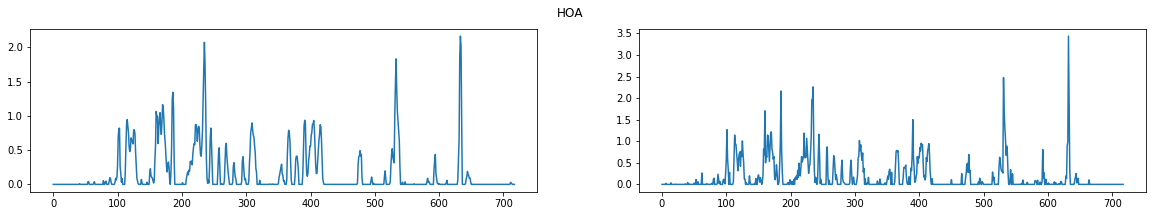

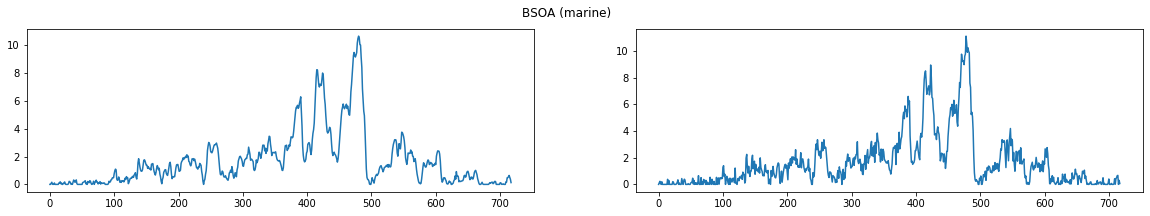

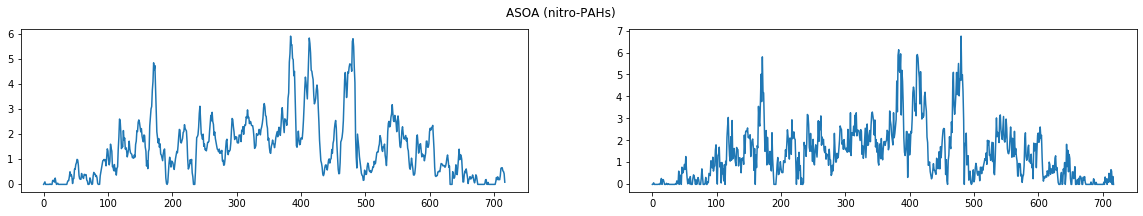

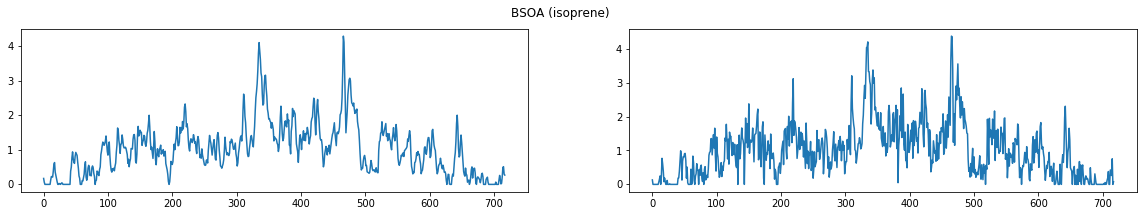

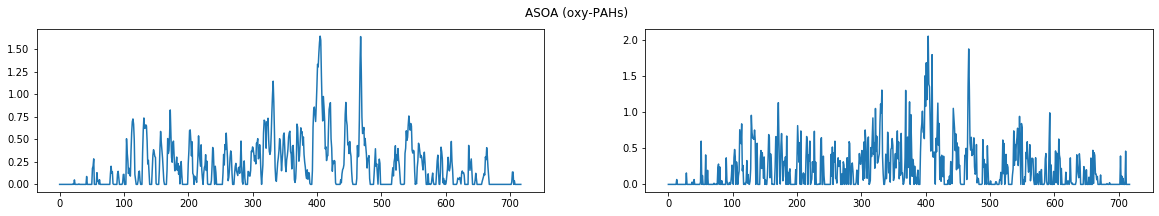

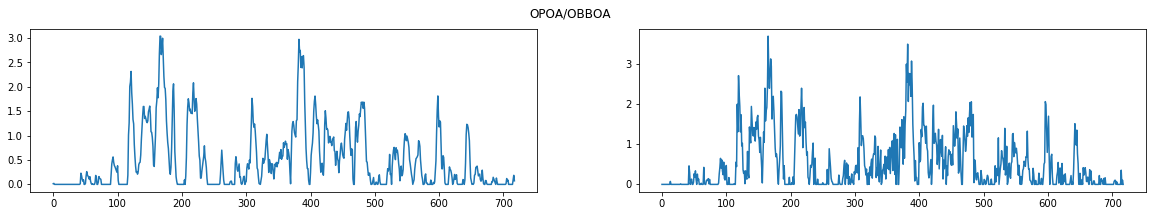

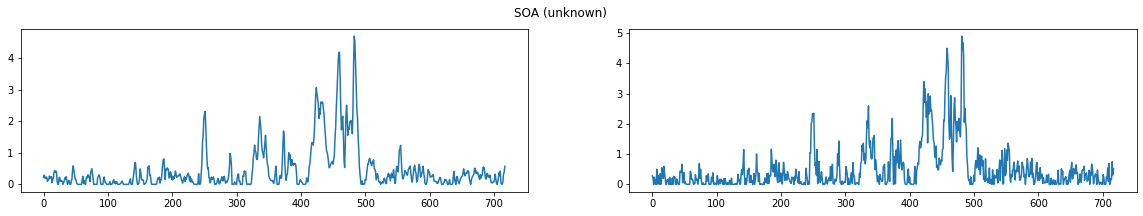

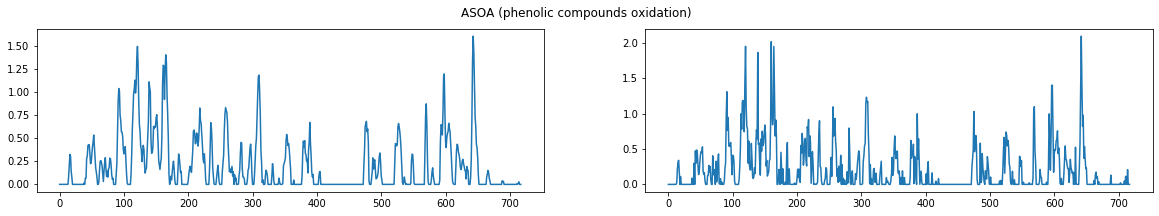

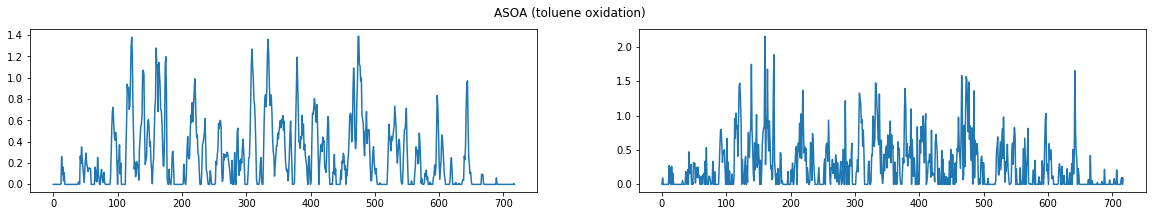

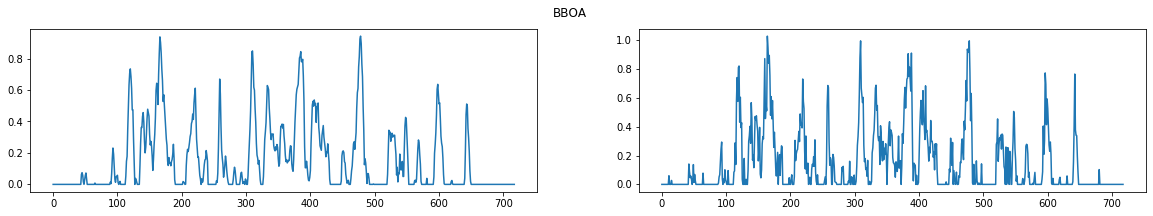

In [7]:
plt.rcParams["figure.figsize"] = (20,3)
for n, prof in enumerate(pro):
    fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.size(7,10)
    fig.suptitle(prof)
    ax1.plot(contirubtion[n])
    ax2.plot(contirubtion1[n])
    plt.show()

# Ii- Effet de l'approche time series entre 2015-10-01 et 2015-10-31

In [8]:
start_date = '2015-10-01'
end_date = '2015-10-31'
sql = f"""SELECT to_char(date, 'YYYY-MM-DD HH24:00:00') FROM(SELECT date FROM public.data_receptor 
          WHERE date>='{start_date}' AND date<='{end_date}' GROUP BY 1 ORDER BY 1) AS foo;"""
connection = psycopg2.connect(user = USER, password = PASSWORD, host = HOSTNAME, port = PORT, database = DATABASE)
df_dates = sqlio.read_sql_query(sql, connection)
connection.close()
dates = df_dates.T.values[0]

In [9]:
df = pd.read_excel('pmf_profiles.xlsx')

df.drop(columns=['Unnamed: 0'], inplace=True)
df.rename(columns={'Unnamed: 1': 'amus'}, inplace=True)
pro = df.columns[1:]

In [10]:
pro

Index(['HOA', 'BSOA (marine)', 'ASOA (nitro-PAHs)', 'BSOA (isoprene)',
       'ASOA (oxy-PAHs)', 'OPOA/OBBOA', 'SOA (unknown)',
       'ASOA (phenolic compounds oxidation)', 'ASOA (toluene oxidation)',
       'BBOA'],
      dtype='object')

In [11]:
contirubtion = [[] for i in pro]
for i in dates[3:]:    
    date = i
    date_be = (datetime.strptime(date, '%Y-%m-%d %H:%M:%S')-timedelta(hours=1)).strftime('%Y-%m-%d %H:%M:%S')
    date_bee = (datetime.strptime(date, '%Y-%m-%d %H:%M:%S')-timedelta(hours=2)).strftime('%Y-%m-%d %H:%M:%S')
    sql = f"""SELECT * FROM public.data_receptor where date = '{date}' 
    or date = '{date_be}' or date = '{date_bee}'
    order by mass;"""
    connection = psycopg2.connect(user = USER, password = PASSWORD, host = HOSTNAME, port = PORT, database = DATABASE)
    df_receptor_data = sqlio.read_sql_query(sql, connection)
    connection.close()
    df_receptor_data = df_receptor_data[df_receptor_data.columns]
    cor = df.merge(df_receptor_data, left_on='amus', right_on='mass').drop(columns=['mass', 'amus'])


    X_train = cor[pro].values
    y_train = cor['value'].values.reshape(-1,1)

    alpha = 0.0001
    lasso = Lasso(fit_intercept=False, alpha=alpha, positive=True)     # We train without intercept and we shoose to have only positive values
    lasso.fit(X_train, y_train)                                        #training the algorithm  
    print(date)
    for n, prof in enumerate(pro):
        contirubtion[n].append(lasso.coef_[n])

C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013469884381489827, tolerance: 0.0008659533631826588
  positive)


2015-10-01 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014603764643397535, tolerance: 0.0009123085686799853
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001693197667421223, tolerance: 0.0009680411453919145
  positive)


2015-10-01 04:00:00
2015-10-01 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017496713622908583, tolerance: 0.0010723319626114497
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019295919157961694, tolerance: 0.0010567005243500142
  positive)


2015-10-01 06:00:00
2015-10-01 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00154713949958106, tolerance: 0.0009674499237601161
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013052515309436782, tolerance: 0.0008070219004603301
  positive)


2015-10-01 08:00:00
2015-10-01 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014753737783505805, tolerance: 0.000859317281636076
  positive)


2015-10-01 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018069658713244507, tolerance: 0.0010466995668063036
  positive)


2015-10-01 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018660241022298296, tolerance: 0.0012367492814004243
  positive)


2015-10-01 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017465074394359403, tolerance: 0.001137264470258083
  positive)


2015-10-01 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001520437480972442, tolerance: 0.0008966021991025123
  positive)


2015-10-01 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011232928385038234, tolerance: 0.0006981869660804317
  positive)


2015-10-01 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010926087360124022, tolerance: 0.0006786700754293203
  positive)


2015-10-01 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012848956448837084, tolerance: 0.0007032120820664094
  positive)


2015-10-01 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017115464267707936, tolerance: 0.0008809620557639374
  positive)


2015-10-01 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002497125324905536, tolerance: 0.0013133587434930787
  positive)


2015-10-01 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003504806112907516, tolerance: 0.0016229408237202968
  positive)


2015-10-01 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036985447058640597, tolerance: 0.001631139747919056
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0031096829695827777, tolerance: 0.0013902190613106094
  positive)


2015-10-01 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002748555520392021, tolerance: 0.001195549607894744
  positive)


2015-10-01 22:00:00
2015-10-01 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019971702672714683, tolerance: 0.0011046568254945547
  positive)


2015-10-02 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001583481408019621, tolerance: 0.0010194098219441982
  positive)


2015-10-02 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015959565970613005, tolerance: 0.0010107904094368166
  positive)


2015-10-02 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017887038426521798, tolerance: 0.0010899354812031609
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018956000259260156, tolerance: 0.0011862080728980468
  positive)


2015-10-02 03:00:00
2015-10-02 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021136234971327154, tolerance: 0.0012682166427105189
  positive)


2015-10-02 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025813066883333124, tolerance: 0.0014190441788156634
  positive)


2015-10-02 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0032272303561213245, tolerance: 0.001758857677758951
  positive)


2015-10-02 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004039563637006305, tolerance: 0.0021719631476858417
  positive)


2015-10-02 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0042142512351523165, tolerance: 0.0023065734823058772
  positive)


2015-10-02 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004847623840073825, tolerance: 0.002467226624142161
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005509092772930546, tolerance: 0.0026110101997531276
  positive)


2015-10-02 10:00:00
2015-10-02 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0057712057428675745, tolerance: 0.0026009958282611338
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0046367826248178146, tolerance: 0.002070620077284548
  positive)


2015-10-02 12:00:00
2015-10-02 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002875430747385721, tolerance: 0.0013823984433175233
  positive)


2015-10-02 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0020531102178737437, tolerance: 0.00097238022206942
  positive)


2015-10-02 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001924361353506654, tolerance: 0.0009490734500696395
  positive)


2015-10-02 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025623665578718147, tolerance: 0.0010612561632531673
  positive)


2015-10-02 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002798056747322447, tolerance: 0.0013049027131213774
  positive)


2015-10-02 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00345420729408584, tolerance: 0.0015204832546809098
  positive)


2015-10-02 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003997090622295918, tolerance: 0.001957584126956712
  positive)


2015-10-02 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006193826428920524, tolerance: 0.0028755174906893873
  positive)


2015-10-02 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00893882278115421, tolerance: 0.00395160645062854
  positive)


2015-10-02 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011375695687360105, tolerance: 0.0049160127857387406
  positive)


2015-10-02 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012755185380494416, tolerance: 0.005728544478846651
  positive)


2015-10-03 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014943210869101387, tolerance: 0.006585459874112667
  positive)


2015-10-03 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015253242593161048, tolerance: 0.006927745461021394
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014428190887882386, tolerance: 0.006603301718519387
  positive)


2015-10-03 02:00:00
2015-10-03 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012660987979710964, tolerance: 0.005839526396201921
  positive)


2015-10-03 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011997106741655245, tolerance: 0.005481878721040743
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012130854307845149, tolerance: 0.0051772970107184825
  positive)


2015-10-03 05:00:00
2015-10-03 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01204864005589823, tolerance: 0.005204291198725642
  positive)


2015-10-03 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013246700549062851, tolerance: 0.005611503730239044
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014942810010123708, tolerance: 0.006284532580855287
  positive)


2015-10-03 08:00:00
2015-10-03 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015558540098295048, tolerance: 0.006226054754142742
  positive)


2015-10-03 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010928118354957883, tolerance: 0.004916056048366004
  positive)


2015-10-03 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0064093003824687855, tolerance: 0.003299385598346743
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0048816206608029294, tolerance: 0.0022994583068146135
  positive)


2015-10-03 12:00:00
2015-10-03 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00428510285286933, tolerance: 0.0021099226929495642
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004414967872859547, tolerance: 0.0020588952528797643
  positive)


2015-10-03 14:00:00
2015-10-03 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0038386258081444663, tolerance: 0.0020007339777964378
  positive)


2015-10-03 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0038142712221534564, tolerance: 0.002107010633564844
  positive)


2015-10-03 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00702718191062357, tolerance: 0.0030996082600695004
  positive)


2015-10-03 18:00:00
2015-10-03 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010012351966826705, tolerance: 0.004032777825338783
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011288150952536727, tolerance: 0.004740404271500258
  positive)


2015-10-03 20:00:00
2015-10-03 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011656077191842168, tolerance: 0.004925188690068986
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013852249461406396, tolerance: 0.005440664726295003
  positive)


2015-10-03 22:00:00
2015-10-03 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01716045758241183, tolerance: 0.006262005223932683
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018919839766822433, tolerance: 0.007410175811819528
  positive)


2015-10-04 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018815876247750885, tolerance: 0.008098879162584002
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020153134779898857, tolerance: 0.008687738738242913
  positive)


2015-10-04 01:00:00
2015-10-04 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020320834816559483, tolerance: 0.008397448972484997
  positive)


2015-10-04 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01980386761905066, tolerance: 0.00825169052908999
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017100977141886756, tolerance: 0.007830793471948741
  positive)


2015-10-04 04:00:00
2015-10-04 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01480224883327505, tolerance: 0.007653271386850564
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016321181107937496, tolerance: 0.007774514231795822
  positive)


2015-10-04 06:00:00
2015-10-04 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016424826050286417, tolerance: 0.007864160171956762
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016510581421735393, tolerance: 0.007852185293741019
  positive)


2015-10-04 08:00:00
2015-10-04 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015295140906152416, tolerance: 0.00709341368443161
  positive)


2015-10-04 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013089938205331497, tolerance: 0.006217470048343285
  positive)


2015-10-04 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010513382603694832, tolerance: 0.0052213898652489965
  positive)


2015-10-04 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007722571693196387, tolerance: 0.004630337056253278
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006850549076907436, tolerance: 0.004620188518970612
  positive)


2015-10-04 13:00:00
2015-10-04 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006942699659121754, tolerance: 0.004618944517616966
  positive)


2015-10-04 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006714551078996836, tolerance: 0.004592024128951375
  positive)


2015-10-04 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00584965030545799, tolerance: 0.004141748152578376
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006069712536570071, tolerance: 0.004235696876116737
  positive)


2015-10-04 17:00:00
2015-10-04 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00752739326285129, tolerance: 0.0046397801990104084
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008990796988467498, tolerance: 0.005498723995828265
  positive)


2015-10-04 19:00:00
2015-10-04 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008986797099600208, tolerance: 0.0053065742949346415
  positive)


2015-10-04 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006922589901678156, tolerance: 0.004550189323638535
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004770789569254197, tolerance: 0.0032255338817026072
  positive)


2015-10-04 22:00:00
2015-10-04 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034657684795941224, tolerance: 0.002448096160328843
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0022883918073914877, tolerance: 0.0016867759076792446
  positive)


2015-10-05 00:00:00
2015-10-05 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015507905524159704, tolerance: 0.0011298571421989062
  positive)


2015-10-05 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008691685420412765, tolerance: 0.0006975491258313395
  positive)


2015-10-05 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007984082754343078, tolerance: 0.0006028571232752127
  positive)


2015-10-05 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007331830508117004, tolerance: 0.000530317062222061
  positive)


2015-10-05 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00082015285515891, tolerance: 0.0005447617184204325
  positive)


2015-10-05 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009248708460593454, tolerance: 0.0005589977760533814
  positive)


2015-10-05 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001204506569600805, tolerance: 0.0007347851361223057
  positive)


2015-10-05 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001421582758239795, tolerance: 0.0007708445933743896
  positive)


2015-10-05 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013804056223712807, tolerance: 0.0008596747651412049
  positive)


2015-10-05 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016584566114105082, tolerance: 0.0010194183865919304
  positive)


2015-10-05 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00240355851627741, tolerance: 0.0011843201178880587
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026745005919278017, tolerance: 0.0013343092110262298
  positive)


2015-10-05 12:00:00
2015-10-05 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019148742717551848, tolerance: 0.001046090534947111
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014160814865459281, tolerance: 0.0007777838755767487
  positive)


2015-10-05 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009615557755231763, tolerance: 0.0005032966780896782
  positive)


2015-10-05 15:00:00
2015-10-05 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008537286595707155, tolerance: 0.0004541724689239948
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006778806676614457, tolerance: 0.00040869712172344336
  positive)


2015-10-05 17:00:00
2015-10-05 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004857788654113737, tolerance: 0.00033848149981401934
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00034783247121434463, tolerance: 0.00029085560840255736
  positive)


2015-10-05 19:00:00
2015-10-05 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004242167224704392, tolerance: 0.00035786435893517493
  positive)


2015-10-05 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005832270730131844, tolerance: 0.0004462185816401859
  positive)


2015-10-05 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008389020445974532, tolerance: 0.0005926650505703034
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009044088022322483, tolerance: 0.0006190112495960661
  positive)


2015-10-05 23:00:00
2015-10-06 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008857381216341303, tolerance: 0.0005780555868474836
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009065423206830181, tolerance: 0.0005585195788033937
  positive)


2015-10-06 01:00:00
2015-10-06 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010309864951470737, tolerance: 0.0006160109765308797
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001063136748980252, tolerance: 0.0006681529989308339
  positive)


2015-10-06 03:00:00
2015-10-06 04:00:00
2015-10-06 05:00:00
2015-10-06 06:00:00
2015-10-06 07:00:00
2015-10-06 08:00:00
2015-10-06 09:00:00
2015-10-06 10:00:00
2015-10-06 11:00:00
2015-10-06 12:00:00
2015-10-06 13:00:00
2015-10-06 14:00:00
2015-10-06 15:00:00
2015-10-06 16:00:00
2015-10-06 17:00:00
2015-10-06 18:00:00
2015-10-06 19:00:00
2015-10-06 20:00:00
2015-10-06 21:00:00
2015-10-06 22:00:00
2015-10-06 23:00:00
2015-10-07 00:00:00
2015-10-07 01:00:00
2015-10-07 02:00:00
2015-10-07 03:00:00
2015-10-07 04:00:00
2015-10-07 05:00:00
2015-10-07 06:00:00
2015-10-07 07:00:00
2015-10-07 08:00:00
2015-10-07 09:00:00
2015-10-07 10:00:00
2015-10-07 11:00:00
2015-10-07 12:00:00
2015-10-07 13:00:00
2015-10-07 14:00:00
2015-10-07 15:00:00
2015-10-07 16:00:00
2015-10-07 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.5244624827578406e-05, tolerance: 4.274199524177643e-05
  positive)


2015-10-07 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.017622232851795e-05, tolerance: 7.991960413551541e-05
  positive)


2015-10-07 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00015328878787107536, tolerance: 0.00013666382087549846
  positive)


2015-10-07 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00036124448236421816, tolerance: 0.00018682091744925486
  positive)


2015-10-07 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004013243145859491, tolerance: 0.00021214532432274727
  positive)


2015-10-07 22:00:00
2015-10-07 23:00:00
2015-10-08 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002726598563151106, tolerance: 0.0001344343139735045
  positive)


2015-10-08 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001730545553091812, tolerance: 0.00010870937568875234
  positive)


2015-10-08 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00015956993474281964, tolerance: 0.00011302464466110958
  positive)


2015-10-08 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00014769300883206438, tolerance: 0.00011046477130794823
  positive)


2015-10-08 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00016859313865746212, tolerance: 0.00010557780648291795
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00017394980076821005, tolerance: 0.0001031089335993102
  positive)


2015-10-08 05:00:00
2015-10-08 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00017738317251042926, tolerance: 0.00011175850108562423
  positive)


2015-10-08 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00022672640768225255, tolerance: 0.00012612570335653788
  positive)


2015-10-08 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00023562600506559991, tolerance: 0.00016081948901786408
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00022954962881228252, tolerance: 0.00015584859150298382
  positive)


2015-10-08 09:00:00
2015-10-08 10:00:00
2015-10-08 11:00:00
2015-10-08 12:00:00
2015-10-08 13:00:00
2015-10-08 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.4351166520864164e-05, tolerance: 5.0771060719376574e-05
  positive)


2015-10-08 15:00:00
2015-10-08 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00016150438691657498, tolerance: 9.939285267081579e-05
  positive)


2015-10-08 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00042612904136880847, tolerance: 0.00016037264824442132
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006125979832745099, tolerance: 0.0003434651370509688
  positive)


2015-10-08 18:00:00
2015-10-08 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009387153358792477, tolerance: 0.0005766356890648816
  positive)


2015-10-08 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013450549510807819, tolerance: 0.0007835834469013614
  positive)


2015-10-08 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018899896535902183, tolerance: 0.001028805381370764
  positive)


2015-10-08 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035232419467321474, tolerance: 0.0019137799782852
  positive)


2015-10-08 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005585241459699963, tolerance: 0.002700087874204514
  positive)


2015-10-09 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006726422619619962, tolerance: 0.0032478125649951645
  positive)


2015-10-09 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005187377165150331, tolerance: 0.0027469009299036914
  positive)


2015-10-09 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0050578208510778655, tolerance: 0.002164281566604189
  positive)


2015-10-09 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004097288828440432, tolerance: 0.001671451368207047
  positive)


2015-10-09 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036891348818752986, tolerance: 0.0015726043660157594
  positive)


2015-10-09 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0033160748688289554, tolerance: 0.0015111993737678502
  positive)


2015-10-09 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030570693806341726, tolerance: 0.0015812271551584147
  positive)


2015-10-09 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002537882319278442, tolerance: 0.0015622599023612442
  positive)


2015-10-09 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0024236846359371907, tolerance: 0.001654021865283967
  positive)


2015-10-09 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001989533026820145, tolerance: 0.0013114248781811624
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001565665324944121, tolerance: 0.0009429304398871676
  positive)


2015-10-09 10:00:00
2015-10-09 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010756914050924493, tolerance: 0.0005609598278909232
  positive)


2015-10-09 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009578940449871745, tolerance: 0.0004518687850478014
  positive)


2015-10-09 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008291611039250822, tolerance: 0.00036350451417962564
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000705899884825098, tolerance: 0.0003308526968494448
  positive)


2015-10-09 14:00:00
2015-10-09 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005495781160955379, tolerance: 0.0002678669707782716
  positive)


2015-10-09 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004871781403905581, tolerance: 0.0002731493992098162
  positive)


2015-10-09 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006758949060358677, tolerance: 0.000346211642491451
  positive)


2015-10-09 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011731186423555306, tolerance: 0.0005948656068550833
  positive)


2015-10-09 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001892056533568054, tolerance: 0.0011927576255451944
  positive)


2015-10-09 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003338853455003399, tolerance: 0.0020560256556264294
  positive)


2015-10-09 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004661587378428866, tolerance: 0.0026854958092315854
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0050947261591279824, tolerance: 0.00275305592326254
  positive)


2015-10-09 22:00:00
2015-10-09 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004083915543905359, tolerance: 0.002206139798067762
  positive)


2015-10-10 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0038091822811038845, tolerance: 0.0016693675738576694
  positive)


2015-10-10 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002723372891438154, tolerance: 0.0013919098903459207
  positive)


2015-10-10 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002342037351937956, tolerance: 0.00143010568718955
  positive)


2015-10-10 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002748079556515154, tolerance: 0.0017798576845694059
  positive)


2015-10-10 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0033650975274418515, tolerance: 0.002114534834211527
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00402076168783623, tolerance: 0.0024812169625244764
  positive)


2015-10-10 05:00:00
2015-10-10 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00434611182428778, tolerance: 0.0025910644042810745
  positive)


2015-10-10 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003901308718233548, tolerance: 0.002562794481439835
  positive)


2015-10-10 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003596426331399033, tolerance: 0.002355258170627428
  positive)


2015-10-10 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002972579898190497, tolerance: 0.001977408489291822
  positive)


2015-10-10 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023128667429375693, tolerance: 0.001486927836815573
  positive)


2015-10-10 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015479218530351502, tolerance: 0.0009906073118997377
  positive)


2015-10-10 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011676254506087086, tolerance: 0.000730514560448571
  positive)


2015-10-10 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001195203749257523, tolerance: 0.0006237338669252055
  positive)


2015-10-10 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00103931255765073, tolerance: 0.0006353702639549548
  positive)


2015-10-10 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009308262008990275, tolerance: 0.000619661471640676
  positive)


2015-10-10 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00120946282294776, tolerance: 0.0007771237996478721
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015106332191116845, tolerance: 0.0009458053459985168
  positive)


2015-10-10 17:00:00
2015-10-10 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019638374830691224, tolerance: 0.0012201055030753446
  positive)


2015-10-10 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0031189690198802356, tolerance: 0.0015535110879754414
  positive)


2015-10-10 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00444461269224683, tolerance: 0.00210444266153739
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00498081720519114, tolerance: 0.002347546727542681
  positive)


2015-10-10 21:00:00
2015-10-10 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004729302225396581, tolerance: 0.002202014091813058
  positive)


2015-10-10 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0037464676487479753, tolerance: 0.0016838708649470503
  positive)


2015-10-11 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0031739256238891844, tolerance: 0.001275542943499078
  positive)


2015-10-11 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018143007794467342, tolerance: 0.001006915074367205
  positive)


2015-10-11 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013697429226584568, tolerance: 0.000824471018802004
  positive)


2015-10-11 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001241275065409976, tolerance: 0.0008023628015493369
  positive)


2015-10-11 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012969694168355056, tolerance: 0.000823406438992343
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017033453535314491, tolerance: 0.0010290972602668344
  positive)


2015-10-11 05:00:00
2015-10-11 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002514438398256269, tolerance: 0.0013181418022634134
  positive)


2015-10-11 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003707355053840039, tolerance: 0.0016774673389921952
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003745830024802943, tolerance: 0.0020443939250573417
  positive)


2015-10-11 08:00:00
2015-10-11 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003972921594262685, tolerance: 0.002271416085702804
  positive)


2015-10-11 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004185314610177349, tolerance: 0.0026084569777731236
  positive)


2015-10-11 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005860080525052019, tolerance: 0.002920259280676736
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006730203743749913, tolerance: 0.003309535980542655
  positive)


2015-10-11 12:00:00
2015-10-11 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007321717720773863, tolerance: 0.0032734099198560218
  positive)


2015-10-11 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007534924280798758, tolerance: 0.00319705189026151
  positive)


2015-10-11 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00607852615655903, tolerance: 0.0030506503167028144
  positive)


2015-10-11 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0053896620392690775, tolerance: 0.003045813881738265
  positive)


2015-10-11 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00554811495115172, tolerance: 0.0030313551718805353
  positive)


2015-10-11 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006474329652764621, tolerance: 0.0034913466242856247
  positive)


2015-10-11 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007952680354631814, tolerance: 0.004336577291928742
  positive)


2015-10-11 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008952620070011463, tolerance: 0.005405249644168571
  positive)


2015-10-11 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009682302889531647, tolerance: 0.006165397411890229
  positive)


2015-10-11 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010287010449907825, tolerance: 0.0065437199493927865
  positive)


2015-10-11 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010747841670128364, tolerance: 0.00654544985680632
  positive)


2015-10-12 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01025648315582589, tolerance: 0.0062373502999163825
  positive)


2015-10-12 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009527484293912453, tolerance: 0.005919693320272626
  positive)


2015-10-12 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008741220769270183, tolerance: 0.005541230845937208
  positive)


2015-10-12 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008395184130745706, tolerance: 0.005263082294134028
  positive)


2015-10-12 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007616274512051019, tolerance: 0.004910334386395704
  positive)


2015-10-12 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008102319957531426, tolerance: 0.004750670337482599
  positive)


2015-10-12 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008790849604517842, tolerance: 0.004816686607848077
  positive)


2015-10-12 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009235569215538905, tolerance: 0.005187235014904335
  positive)


2015-10-12 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01114955967674694, tolerance: 0.005532434552146099
  positive)


2015-10-12 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011562736297345402, tolerance: 0.005693186427304019
  positive)


2015-10-12 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012314764868906036, tolerance: 0.005707925945058527
  positive)


2015-10-12 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011560500311112637, tolerance: 0.005307420791668636
  positive)


2015-10-12 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010065804097855235, tolerance: 0.00487061600792445
  positive)


2015-10-12 13:00:00
2015-10-12 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00826449617091965, tolerance: 0.004281140941099301
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007993964214741106, tolerance: 0.004113914137828049
  positive)


2015-10-12 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008543191873307675, tolerance: 0.004009631004505606
  positive)


2015-10-12 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009625117430651794, tolerance: 0.00409738580069213
  positive)


2015-10-12 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009914600836519932, tolerance: 0.004512811161297313
  positive)


2015-10-12 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011475639703814627, tolerance: 0.004987389777370089
  positive)


2015-10-12 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012653381969121372, tolerance: 0.00567810061020363
  positive)


2015-10-12 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013927241815695046, tolerance: 0.006559666881493277
  positive)


2015-10-12 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014529541924122674, tolerance: 0.007198334893853447
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01462773001506007, tolerance: 0.007263562000810345
  positive)


2015-10-12 22:00:00
2015-10-12 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011773239964324111, tolerance: 0.006456279371742318
  positive)


2015-10-13 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011694116052724496, tolerance: 0.0057594121212532125
  positive)


2015-10-13 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010007775658539095, tolerance: 0.005269211785529865
  positive)


2015-10-13 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00894457123399487, tolerance: 0.005057262647612123
  positive)


2015-10-13 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007507073312563894, tolerance: 0.004511233145279477
  positive)


2015-10-13 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005729526684891462, tolerance: 0.0036314063337128354
  positive)


2015-10-13 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004384662872273515, tolerance: 0.002720372985967494
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003533037575410597, tolerance: 0.002181235401401082
  positive)


2015-10-13 06:00:00
2015-10-13 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002684259569291192, tolerance: 0.0017754943215717927
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0020361343856300507, tolerance: 0.0013966028596210781
  positive)


2015-10-13 08:00:00
2015-10-13 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015540306237753349, tolerance: 0.00095633044032414
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016210127978135563, tolerance: 0.00102090028983884
  positive)


2015-10-13 10:00:00
2015-10-13 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017653028952741429, tolerance: 0.0010938838167738536
  positive)


2015-10-13 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0020630567067604563, tolerance: 0.0012908975172545697
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002185958523586301, tolerance: 0.0013191802067760133
  positive)


2015-10-13 13:00:00
2015-10-13 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002138159138077432, tolerance: 0.001350076843199054
  positive)


2015-10-13 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0022094608197385027, tolerance: 0.001437207542752055
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025362803461452255, tolerance: 0.0017177065000389554
  positive)


2015-10-13 16:00:00
2015-10-13 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027141344463169487, tolerance: 0.0018456401244599711
  positive)


2015-10-13 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030457702204225168, tolerance: 0.001792632720847702
  positive)


2015-10-13 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026709765202588935, tolerance: 0.0015853374100628015
  positive)


2015-10-13 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0024575289530282957, tolerance: 0.001511676520022641
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002776442704738355, tolerance: 0.0017166366007612174
  positive)


2015-10-13 21:00:00
2015-10-13 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00282034935660494, tolerance: 0.00181971675893173
  positive)


2015-10-13 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003141497974543033, tolerance: 0.001998327253972657
  positive)


2015-10-14 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003081554445725408, tolerance: 0.0020055665549885424
  positive)


2015-10-14 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003223217389220996, tolerance: 0.002016074101723847
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003257957582761803, tolerance: 0.0021191312691337385
  positive)


2015-10-14 02:00:00
2015-10-14 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027043027280977128, tolerance: 0.0019181000259895652
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026829236002809675, tolerance: 0.0018862734294069856
  positive)


2015-10-14 04:00:00
2015-10-14 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029859900398347405, tolerance: 0.002051500752889519
  positive)


2015-10-14 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0039902383493115035, tolerance: 0.0025378518756205416
  positive)


2015-10-14 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004595061028952074, tolerance: 0.0030682706831318676
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004700106454282205, tolerance: 0.003008796995598649
  positive)


2015-10-14 08:00:00
2015-10-14 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00393764718906553, tolerance: 0.0025964864184719483
  positive)


2015-10-14 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030480133216048144, tolerance: 0.002057578199820837
  positive)


2015-10-14 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002640815483122644, tolerance: 0.0016082371628686443
  positive)


2015-10-14 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025434615640268776, tolerance: 0.001422151722999797
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0022854333588945702, tolerance: 0.0013126495838628174
  positive)


2015-10-14 13:00:00
2015-10-14 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002244946812006654, tolerance: 0.0013956604366820852
  positive)


2015-10-14 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023730694274300447, tolerance: 0.001512241256029786
  positive)


2015-10-14 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0028113167338513767, tolerance: 0.0018174256236113129
  positive)


2015-10-14 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0033571133668604536, tolerance: 0.0021953021934141954
  positive)


2015-10-14 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00470066298363947, tolerance: 0.002675574178293046
  positive)


2015-10-14 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004555904586552362, tolerance: 0.002363056852778975
  positive)


2015-10-14 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029142338644143617, tolerance: 0.001637578616835511
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015637110119505193, tolerance: 0.0008061263313133191
  positive)


2015-10-14 21:00:00
2015-10-14 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007744421889447767, tolerance: 0.0004455915666069397
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006301218296342892, tolerance: 0.00044707312454384364
  positive)


2015-10-14 23:00:00
2015-10-15 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006728882464182434, tolerance: 0.00048282408493390954
  positive)


2015-10-15 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007180507014032805, tolerance: 0.0005242896132557856
  positive)


2015-10-15 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007120277929963947, tolerance: 0.0004898845229969979
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006004409513185732, tolerance: 0.00044133921777231473
  positive)


2015-10-15 03:00:00
2015-10-15 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000574897279431448, tolerance: 0.0004106312016361087
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005712025033009389, tolerance: 0.0004603776701405651
  positive)


2015-10-15 05:00:00
2015-10-15 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007075576493624711, tolerance: 0.0004956694539991754
  positive)


2015-10-15 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007963764372472745, tolerance: 0.0005523372617625917
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009991854825399382, tolerance: 0.0006650566606225617
  positive)


2015-10-15 08:00:00
2015-10-15 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011755484958777818, tolerance: 0.0007843490602287445
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013510182263271157, tolerance: 0.0008350411812552764
  positive)


2015-10-15 10:00:00
2015-10-15 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012932333164611468, tolerance: 0.0008055169620230409
  positive)


2015-10-15 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012370451298717167, tolerance: 0.000733405504012498
  positive)


2015-10-15 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001266452661256164, tolerance: 0.0007138246376622805
  positive)


2015-10-15 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009895812630358568, tolerance: 0.0007101725522821311
  positive)


2015-10-15 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001054322332641855, tolerance: 0.0007403359522311966
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011804308075454018, tolerance: 0.0008414410570166178
  positive)


2015-10-15 16:00:00
2015-10-15 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015293552822660123, tolerance: 0.0009239250564238722
  positive)


2015-10-15 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0020017407870030757, tolerance: 0.001107285715053871
  positive)


2015-10-15 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023588318856547774, tolerance: 0.0013661560794379602
  positive)


2015-10-15 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002750679722564209, tolerance: 0.001873525442664965
  positive)


2015-10-15 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003955209814585026, tolerance: 0.002433037527287743
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004842485290112053, tolerance: 0.0029126123424248773
  positive)


2015-10-15 22:00:00
2015-10-15 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005385286965985971, tolerance: 0.0030664846575756935
  positive)


2015-10-16 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005303403274150381, tolerance: 0.0030344295342003874
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005053678198032326, tolerance: 0.0030162121883042284
  positive)


2015-10-16 01:00:00
2015-10-16 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005403377792853825, tolerance: 0.003061850263313349
  positive)


2015-10-16 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005426562944056371, tolerance: 0.0031287986560922707
  positive)


2015-10-16 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005004744774680686, tolerance: 0.002899559213407722
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0040755478429833625, tolerance: 0.0024648333578539444
  positive)


2015-10-16 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036775312267426363, tolerance: 0.002023331339881036
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027445817877030723, tolerance: 0.0017462370373847842
  positive)


2015-10-16 06:00:00
2015-10-16 07:00:00
2015-10-16 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00264165654908341, tolerance: 0.0015459764178435947
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002345981548546844, tolerance: 0.0013764990934310678
  positive)


2015-10-16 09:00:00
2015-10-16 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002174896774028573, tolerance: 0.001188273120323918
  positive)


2015-10-16 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021321124505554907, tolerance: 0.0011724232494888143
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0024610633900714607, tolerance: 0.0012669375667620593
  positive)


2015-10-16 12:00:00
2015-10-16 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030231832466173225, tolerance: 0.0016156334853443637
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003501854199236973, tolerance: 0.0019668694099336838
  positive)


2015-10-16 14:00:00
2015-10-16 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003951821724076751, tolerance: 0.0021692806098235454
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003702328656900254, tolerance: 0.002256023205579817
  positive)


2015-10-16 16:00:00
2015-10-16 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004101701750154674, tolerance: 0.0022264086654845143
  positive)


2015-10-16 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003513959825899783, tolerance: 0.0021613577873486607
  positive)


2015-10-16 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003572158515115366, tolerance: 0.001928411250279412
  positive)


2015-10-16 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003783137748912757, tolerance: 0.002189634187421342
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003577452903392009, tolerance: 0.002208796599485737
  positive)


2015-10-16 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0037752252862526536, tolerance: 0.0023853634941116597
  positive)


2015-10-16 22:00:00
2015-10-16 23:00:00
2015-10-17 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030398098987433966, tolerance: 0.002061796153735969
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0028258967236446386, tolerance: 0.0019304310439683075
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025429834596002454, tolerance: 0.0016791105901893873
  positive)


2015-10-17 01:00:00
2015-10-17 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002398125803697297, tolerance: 0.0015407107355585525
  positive)


2015-10-17 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0022499332612818668, tolerance: 0.0014317612798668347
  positive)


2015-10-17 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0020687852088437514, tolerance: 0.0013673475482235754
  positive)


2015-10-17 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002115728454988433, tolerance: 0.0013268090043931271
  positive)


2015-10-17 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021190902647432105, tolerance: 0.0012904189977308751
  positive)


2015-10-17 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018270918870543426, tolerance: 0.0013426798785293559
  positive)


2015-10-17 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023080607678349907, tolerance: 0.0015798664261870712
  positive)


2015-10-17 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026166423668879946, tolerance: 0.0019486113462402089
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0032735063123238983, tolerance: 0.00218064680992745
  positive)


2015-10-17 10:00:00
2015-10-17 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029183200612959356, tolerance: 0.0021058194446371735
  positive)


2015-10-17 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0022855760256422775, tolerance: 0.0017274898447793916
  positive)


2015-10-17 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019174885961392718, tolerance: 0.0014519242715523718
  positive)


2015-10-17 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016975222752773078, tolerance: 0.0011371317449973008
  positive)


2015-10-17 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001585310672768292, tolerance: 0.00094426112017794
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013507130215893864, tolerance: 0.0007707678176449799
  positive)


2015-10-17 16:00:00
2015-10-17 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009805885158015032, tolerance: 0.0006857599233992394
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001037994686058804, tolerance: 0.0007455917427506974
  positive)


2015-10-17 18:00:00
2015-10-17 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001411813460559741, tolerance: 0.0009837148934821968
  positive)


2015-10-17 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002391026242461569, tolerance: 0.0017771679557294616
  positive)


2015-10-17 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002874735294659092, tolerance: 0.002126946205560561
  positive)


2015-10-17 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0032494477008795375, tolerance: 0.0024850731677111782
  positive)


2015-10-17 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030680894587960528, tolerance: 0.0023178050624527175
  positive)


2015-10-18 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036518813898197694, tolerance: 0.002409606268316123
  positive)


2015-10-18 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0038286722594704087, tolerance: 0.002326781970780157
  positive)


2015-10-18 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003802691757332534, tolerance: 0.002212728652371226
  positive)


2015-10-18 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036867200402064815, tolerance: 0.0022094909378169362
  positive)


2015-10-18 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002889806047124799, tolerance: 0.0018746348646789194
  positive)


2015-10-18 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002261591551999842, tolerance: 0.001598739296353514
  positive)


2015-10-18 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001688175236331399, tolerance: 0.0012253401294379364
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013481885403571203, tolerance: 0.0009885597291108212
  positive)


2015-10-18 07:00:00
2015-10-18 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011040625291289796, tolerance: 0.0006932780224397031
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008935048690097841, tolerance: 0.0005131820598374333
  positive)


2015-10-18 09:00:00
2015-10-18 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008357610110372848, tolerance: 0.0004633425081953295
  positive)


2015-10-18 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007534123362146344, tolerance: 0.0005027420699864737
  positive)


2015-10-18 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012430123669099208, tolerance: 0.0006275858905630228
  positive)


2015-10-18 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001335638304609376, tolerance: 0.0007021353520490387
  positive)


2015-10-18 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012955599465170886, tolerance: 0.0008385966151121272
  positive)


2015-10-18 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015694317922959888, tolerance: 0.0010100691118823777
  positive)


2015-10-18 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016630339110239659, tolerance: 0.0011747644409783738
  positive)


2015-10-18 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016648216443298225, tolerance: 0.0013440332796991322
  positive)


2015-10-18 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0024049862837508817, tolerance: 0.0015691474567899556
  positive)


2015-10-18 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003590250332204059, tolerance: 0.002211926086378579
  positive)


2015-10-18 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003804444336952706, tolerance: 0.0026385552741569978
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0042324603970761016, tolerance: 0.003021160884135688
  positive)


2015-10-18 21:00:00
2015-10-18 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005030231941428459, tolerance: 0.0033127347621884867
  positive)


2015-10-18 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005570174996723187, tolerance: 0.003761668380376011
  positive)


2015-10-19 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006123672376554562, tolerance: 0.0038363952142297787
  positive)


2015-10-19 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006290709088542318, tolerance: 0.003606497125022078
  positive)


2015-10-19 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00514641265912702, tolerance: 0.0031081716162246397
  positive)


2015-10-19 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005314760791176931, tolerance: 0.0029168655068516464
  positive)


2015-10-19 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004945310580047654, tolerance: 0.002717416292441183
  positive)


2015-10-19 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005268457507710253, tolerance: 0.002821187904079283
  positive)


2015-10-19 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00505381686367834, tolerance: 0.0029762651813508116
  positive)


2015-10-19 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004802420409820249, tolerance: 0.0031601615808262333
  positive)


2015-10-19 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004532407379804114, tolerance: 0.0032209723158449265
  positive)


2015-10-19 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004915142927656407, tolerance: 0.0035161529625900275
  positive)


2015-10-19 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005498497595222807, tolerance: 0.0033250626990897047
  positive)


2015-10-19 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004893363162359998, tolerance: 0.002676792488462732
  positive)


2015-10-19 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002648103713957739, tolerance: 0.0016022319774715791
  positive)


2015-10-19 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0022807057991797858, tolerance: 0.0012128616758131025
  positive)


2015-10-19 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027636022907903124, tolerance: 0.001568736825197448
  positive)


2015-10-19 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035525863357059595, tolerance: 0.00199970027083204
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004151077236351632, tolerance: 0.0022482841703791103
  positive)


2015-10-19 16:00:00
2015-10-19 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004443297164249696, tolerance: 0.0022610120889624175
  positive)


2015-10-19 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0046874088499385125, tolerance: 0.002378681207154131
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004771011692385307, tolerance: 0.0024474035653602962
  positive)


2015-10-19 19:00:00
2015-10-19 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0055176355334559425, tolerance: 0.0025381621831696215
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006829758958555976, tolerance: 0.003109889650292009
  positive)


2015-10-19 21:00:00
2015-10-19 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008222362885300982, tolerance: 0.003808060235394376
  positive)


2015-10-19 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009125174220447972, tolerance: 0.0044548333299860845
  positive)


2015-10-20 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00838823993706913, tolerance: 0.004439903832068427
  positive)


2015-10-20 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00776153088438062, tolerance: 0.004278838404374031
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006774540377849914, tolerance: 0.003949663109609202
  positive)


2015-10-20 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006212635531566216, tolerance: 0.003788050318366058
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005722639178214556, tolerance: 0.003612780590590303
  positive)


2015-10-20 03:00:00
2015-10-20 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005716342380056388, tolerance: 0.003401043209576821
  positive)


2015-10-20 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005572597601087359, tolerance: 0.003075546893779026
  positive)


2015-10-20 06:00:00
2015-10-20 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006101152899490113, tolerance: 0.0029399570894968925
  positive)


2015-10-20 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0055746099553919334, tolerance: 0.0030562678245062897
  positive)


2015-10-20 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005182758744621416, tolerance: 0.0031455701222550606
  positive)


2015-10-20 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005102418852712266, tolerance: 0.0031136916113766212
  positive)


2015-10-20 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006114093355025586, tolerance: 0.003182734293398376
  positive)


2015-10-20 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0066090504027748465, tolerance: 0.00314029743400081
  positive)


2015-10-20 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0062188620963575525, tolerance: 0.003020781216101441
  positive)


2015-10-20 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005143800802701055, tolerance: 0.0027749492509268024
  positive)


2015-10-20 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004352152486013505, tolerance: 0.0022345037194763002
  positive)


2015-10-20 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0037361444311433956, tolerance: 0.001912713617772857
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002764334920168962, tolerance: 0.0014381649243306014
  positive)


2015-10-20 17:00:00
2015-10-20 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0028247476641904967, tolerance: 0.001503238860441001
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030657505969312465, tolerance: 0.0014885754058194289
  positive)


2015-10-20 19:00:00
2015-10-20 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027940950565705086, tolerance: 0.0014551878832364598
  positive)


2015-10-20 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002956677604784741, tolerance: 0.0014575132500703751
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002477637243273531, tolerance: 0.001226238025515478
  positive)


2015-10-20 22:00:00
2015-10-20 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002036820949726015, tolerance: 0.0010563922986359675
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016404281474708265, tolerance: 0.0007678416227203989
  positive)


2015-10-21 00:00:00
2015-10-21 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016701086978314732, tolerance: 0.0006768717521930959
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012769429268988351, tolerance: 0.0006744956715954341
  positive)


2015-10-21 02:00:00
2015-10-21 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011777001188178725, tolerance: 0.0006435582111876286
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010662362212130946, tolerance: 0.000592635376252348
  positive)


2015-10-21 04:00:00
2015-10-21 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010090645056882105, tolerance: 0.0005686109480448337
  positive)


2015-10-21 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011311469962654724, tolerance: 0.0006191254383140139
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011916778591854957, tolerance: 0.0006595900246131678
  positive)


2015-10-21 07:00:00
2015-10-21 08:00:00
2015-10-21 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008682543453275848, tolerance: 0.0005960661483029639
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008423826203248844, tolerance: 0.000523358616391948
  positive)


2015-10-21 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005540381273434203, tolerance: 0.0003824223772278435
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003691574310904777, tolerance: 0.00027074063048537956
  positive)


2015-10-21 11:00:00
2015-10-21 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00019811773806895083, tolerance: 0.0001345621716802916
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00015037761606583738, tolerance: 0.00010641264089562053
  positive)


2015-10-21 13:00:00
2015-10-21 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002097298790321861, tolerance: 0.00015991503972078144
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004907211230977815, tolerance: 0.0003073449655770075
  positive)


2015-10-21 15:00:00
2015-10-21 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000610313663042733, tolerance: 0.0004056402298740448
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009876730688256619, tolerance: 0.000627049415314671
  positive)


2015-10-21 17:00:00
2015-10-21 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016451556357478525, tolerance: 0.0010838668851239385
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00270216675977597, tolerance: 0.0016817779951675172
  positive)


2015-10-21 19:00:00
2015-10-21 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0033265394813485893, tolerance: 0.001732126817176983
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00218520412697476, tolerance: 0.0012877863774990962
  positive)


2015-10-21 21:00:00
2015-10-21 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008917318743084657, tolerance: 0.0006635882398939888
  positive)


2015-10-21 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000600731334806065, tolerance: 0.00044668813770111466
  positive)


2015-10-22 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004514039207041687, tolerance: 0.0003354078335751625
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00038034995301708396, tolerance: 0.00025838915378883625
  positive)


2015-10-22 01:00:00
2015-10-22 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00019936469697441617, tolerance: 0.00014609384233588708
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00013286711059098955, tolerance: 0.00010456913895444591
  positive)


2015-10-22 03:00:00
2015-10-22 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001557737529787398, tolerance: 0.00011774888093981765
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00018293225486071263, tolerance: 0.00012535762883449753
  positive)


2015-10-22 05:00:00
2015-10-22 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001961811598811536, tolerance: 0.0001283920804507515
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00015620055940062695, tolerance: 0.00010170438022417296
  positive)


2015-10-22 07:00:00
2015-10-22 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000170754469333248, tolerance: 0.00013057750828576113
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003546263417709694, tolerance: 0.000285790898658556
  positive)


2015-10-22 09:00:00
2015-10-22 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00036381636070331735, tolerance: 0.00034770215998603817
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004246148442225983, tolerance: 0.0003411083958198387
  positive)


2015-10-22 11:00:00
2015-10-22 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00024820910167515364, tolerance: 0.0001925626834874255
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00019941496544026785, tolerance: 0.00013446670674404477
  positive)


2015-10-22 13:00:00
2015-10-22 14:00:00
2015-10-22 15:00:00
2015-10-22 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001343784013112942, tolerance: 0.00011643975636553441
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00016437848267828598, tolerance: 0.00012153068233647058
  positive)


2015-10-22 17:00:00
2015-10-22 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002670664846627646, tolerance: 0.0002086611243961904
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00046943116247194494, tolerance: 0.0003290064577496896
  positive)


2015-10-22 19:00:00
2015-10-22 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007945504511269186, tolerance: 0.0005002890305280329
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006725476261058017, tolerance: 0.0004399939904177561
  positive)


2015-10-22 21:00:00
2015-10-22 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003741186227809168, tolerance: 0.00031558574375583514
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00022353234819944348, tolerance: 0.0001666013727573291
  positive)


2015-10-22 23:00:00
2015-10-23 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00021907462474643827, tolerance: 0.00015536625031387918
  positive)


2015-10-23 01:00:00
2015-10-23 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00026529407183650475, tolerance: 0.00016863035744623485
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00026451846695335623, tolerance: 0.00016260168335688023
  positive)


2015-10-23 03:00:00
2015-10-23 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00022728537755097727, tolerance: 0.000145861513287149
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00012902587856818137, tolerance: 9.264550746713745e-05
  positive)


2015-10-23 05:00:00
2015-10-23 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010490371274942539, tolerance: 7.742874526248693e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.463951434405868e-05, tolerance: 5.350902555321252e-05
  positive)


2015-10-23 07:00:00
2015-10-23 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.622865895064087e-05, tolerance: 6.500052815734064e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010453136448469735, tolerance: 7.614725745872521e-05
  positive)


2015-10-23 09:00:00
2015-10-23 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.211178012299675e-05, tolerance: 7.67739423528519e-05
  positive)


2015-10-23 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.048681154551596e-05, tolerance: 6.82673180096636e-05
  positive)


2015-10-23 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.189310809737598e-05, tolerance: 4.080286172663783e-05
  positive)


2015-10-23 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.862409898460153e-05, tolerance: 6.560802387442178e-05
  positive)


2015-10-23 14:00:00
2015-10-23 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00037777578535136414, tolerance: 0.00019251977319622608
  positive)


2015-10-23 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007799369136182177, tolerance: 0.00036633949563490153
  positive)


2015-10-23 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013300504282535708, tolerance: 0.000611234492809358
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021186034505613627, tolerance: 0.001058980433510331
  positive)


2015-10-23 18:00:00
2015-10-23 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003504204552858714, tolerance: 0.0017269171713602406
  positive)


2015-10-23 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00435271320547867, tolerance: 0.0020778401126788004
  positive)


2015-10-23 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003924227686036397, tolerance: 0.001886094840930338
  positive)


2015-10-23 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003075610077642621, tolerance: 0.0014606005680309572
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002655917071105046, tolerance: 0.0013923905135087198
  positive)


2015-10-23 23:00:00
2015-10-24 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030924662213981657, tolerance: 0.0015319335150768155
  positive)


2015-10-24 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026132201255968934, tolerance: 0.0013094876647139326
  positive)


2015-10-24 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016905634732330421, tolerance: 0.0010100590287097035
  positive)


2015-10-24 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013085890232087949, tolerance: 0.0008487226593468128
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016880341939713474, tolerance: 0.0009372319909447924
  positive)


2015-10-24 04:00:00
2015-10-24 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019954808544966757, tolerance: 0.0010545022701147924
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001997265755863384, tolerance: 0.001082460608568937
  positive)


2015-10-24 06:00:00
2015-10-24 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002452890591175455, tolerance: 0.0012253554991255144
  positive)


2015-10-24 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002825625399026463, tolerance: 0.0012571783520349143
  positive)


2015-10-24 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002634219352726487, tolerance: 0.0012423065850430213
  positive)


2015-10-24 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002114297563175438, tolerance: 0.0011617268941613937
  positive)


2015-10-24 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017670731726480565, tolerance: 0.0010552147455679497
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016604961740026014, tolerance: 0.0009954322197493484
  positive)


2015-10-24 12:00:00
2015-10-24 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013443169941972713, tolerance: 0.0008576922034321978
  positive)


2015-10-24 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001354253560621993, tolerance: 0.0008738354359906286
  positive)


2015-10-24 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017379221828792701, tolerance: 0.0010544864420011532
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026942863899269143, tolerance: 0.001501061222274634
  positive)


2015-10-24 16:00:00
2015-10-24 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002949012249767846, tolerance: 0.0017300942508373105
  positive)


2015-10-24 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003153095466889924, tolerance: 0.0019043906213316896
  positive)


2015-10-24 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0033099853275888463, tolerance: 0.0019345575969525837
  positive)


2015-10-24 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003386705582668806, tolerance: 0.002135449279793604
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034319919302673446, tolerance: 0.0022336804698006997
  positive)


2015-10-24 21:00:00
2015-10-24 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00352032552950219, tolerance: 0.002308320736412513
  positive)


2015-10-24 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003694846240853873, tolerance: 0.002262077043687389
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0031303330353715797, tolerance: 0.001915450728486488
  positive)


2015-10-25 00:00:00
2015-10-25 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016415342517992482, tolerance: 0.0011787424499850644
  positive)


2015-10-25 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005300151728322433, tolerance: 0.0004601451611732892
  positive)


2015-10-25 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001028797080128846, tolerance: 8.936144024558069e-05
  positive)


2015-10-25 04:00:00
2015-10-25 05:00:00
2015-10-25 06:00:00
2015-10-25 07:00:00
2015-10-25 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00013173438350172484, tolerance: 9.376976746800967e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00015699865763244003, tolerance: 0.00010782821735785082
  positive)


2015-10-25 09:00:00
2015-10-25 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00017538536174133146, tolerance: 0.0001389412800664343
  positive)


2015-10-25 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00015813256901321682, tolerance: 0.00013779672422271593
  positive)


2015-10-25 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00016989558534403343, tolerance: 0.0001557337459358236
  positive)


2015-10-25 13:00:00
2015-10-25 14:00:00
2015-10-25 15:00:00
2015-10-25 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00034486101353171233, tolerance: 0.00029737084843133423
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006238373827296972, tolerance: 0.0004026174827267502
  positive)


2015-10-25 17:00:00
2015-10-25 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010186690188377645, tolerance: 0.0004907402847508799
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001253996773224797, tolerance: 0.0006590051441532787
  positive)


2015-10-25 19:00:00
2015-10-25 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002069063004638494, tolerance: 0.0013011333352544814
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027784785979778626, tolerance: 0.002094324686156974
  positive)


2015-10-25 21:00:00
2015-10-25 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003910279586203769, tolerance: 0.0028651997823532344
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004072658661875117, tolerance: 0.002717768180088018
  positive)


2015-10-25 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003399589417752147, tolerance: 0.0022737295292742338
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026786553691752757, tolerance: 0.0016519416259592203
  positive)


2015-10-26 00:00:00
2015-10-26 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017613388021275878, tolerance: 0.0012897137537602008
  positive)


2015-10-26 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015588249894195605, tolerance: 0.001001368643416377
  positive)


2015-10-26 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001124767205280361, tolerance: 0.0007338564881637206
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007669802241395129, tolerance: 0.0005099421453690026
  positive)


2015-10-26 04:00:00
2015-10-26 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004624521809274418, tolerance: 0.0003286168400053363
  positive)


2015-10-26 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00034441642135200207, tolerance: 0.0002211726802149534
  positive)


2015-10-26 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00029349368428437106, tolerance: 0.0002165267267053911
  positive)


2015-10-26 08:00:00
2015-10-26 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008155988753905108, tolerance: 0.0006272923624310172
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019789579811553826, tolerance: 0.000999540798682363
  positive)


2015-10-26 10:00:00
2015-10-26 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002775970779703596, tolerance: 0.0013196271590545183
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0032794344559157196, tolerance: 0.001684467346570054
  positive)


2015-10-26 12:00:00
2015-10-26 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004037669515858669, tolerance: 0.001959136163305692
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004280700649746505, tolerance: 0.0023012536358825372
  positive)


2015-10-26 14:00:00
2015-10-26 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0045953363960289095, tolerance: 0.002473379802700523
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004857095279120302, tolerance: 0.0027555813708171157
  positive)


2015-10-26 16:00:00
2015-10-26 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005935194851397013, tolerance: 0.003063483356432932
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007656467098608649, tolerance: 0.0034874993455446097
  positive)


2015-10-26 18:00:00
2015-10-26 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009201549120926217, tolerance: 0.0038635102671780177
  positive)


2015-10-26 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00920927012936467, tolerance: 0.004124745553366298
  positive)


2015-10-26 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00936485020354244, tolerance: 0.004337264106520664
  positive)


2015-10-26 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009364705749225113, tolerance: 0.0044990777552701925
  positive)


2015-10-26 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010109833755247447, tolerance: 0.0047028741552055065
  positive)


2015-10-27 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009618609975067832, tolerance: 0.004478739638141737
  positive)


2015-10-27 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008044594808862937, tolerance: 0.003995466900934385
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007317445169638476, tolerance: 0.0032819919654300273
  positive)


2015-10-27 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005661498218292191, tolerance: 0.002832684907509871
  positive)


2015-10-27 03:00:00
2015-10-27 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0049136645341504165, tolerance: 0.002567638967485138
  positive)


2015-10-27 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004582170853593942, tolerance: 0.0024087463257080424
  positive)


2015-10-27 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005310482657252383, tolerance: 0.0024158324853325325
  positive)


2015-10-27 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007230583095151746, tolerance: 0.002507461324701333
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006779207237781866, tolerance: 0.0025411218283270644
  positive)


2015-10-27 08:00:00
2015-10-27 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0063796415965631514, tolerance: 0.0022827076948191954
  positive)


2015-10-27 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004862106217917328, tolerance: 0.0017876513217409639
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00308736397149012, tolerance: 0.0012405353783792553
  positive)


2015-10-27 11:00:00
2015-10-27 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016320913314227248, tolerance: 0.0008086508043771332
  positive)


2015-10-27 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008209893412798736, tolerance: 0.0005357872663328206
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008137039839662408, tolerance: 0.0005364124373142151
  positive)


2015-10-27 14:00:00
2015-10-27 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012519404857804228, tolerance: 0.0007885890345992741
  positive)


2015-10-27 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025816733058600105, tolerance: 0.0011711204886879856
  positive)


2015-10-27 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003104435588423826, tolerance: 0.0012886622438892826
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003351107144334356, tolerance: 0.0014050754505724762
  positive)


2015-10-27 18:00:00
2015-10-27 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004505938061298398, tolerance: 0.0020571479844406428
  positive)


2015-10-27 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007098583755283716, tolerance: 0.002766393777582502
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009569630238910318, tolerance: 0.003266181726988603
  positive)


2015-10-27 21:00:00
2015-10-27 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009400382466240018, tolerance: 0.0031147189044159994
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006731716855300718, tolerance: 0.0024164475984817684
  positive)


2015-10-27 23:00:00
2015-10-28 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003985493676964769, tolerance: 0.0017942908667988803
  positive)


2015-10-28 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021866408539429807, tolerance: 0.0011918760890692068
  positive)


2015-10-28 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019188985572017314, tolerance: 0.001076724096254306
  positive)


2015-10-28 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001281006978526178, tolerance: 0.0007786378537589622
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009088985551124473, tolerance: 0.00044961116483365615
  positive)


2015-10-28 04:00:00
2015-10-28 05:00:00
2015-10-28 06:00:00
2015-10-28 07:00:00
2015-10-28 08:00:00
2015-10-28 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00026793268369122714, tolerance: 0.00016889100968855547
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00022412383166058383, tolerance: 0.00014833209612427669
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00015023922014936741, tolerance: 0.00011015325438681902
  positive)


2015-10-28 10:00:00
2015-10-28 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00012287243918990276, tolerance: 0.00010215198525741431
  positive)


2015-10-28 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.534000742332169e-05, tolerance: 7.17046497322342e-05
  positive)


2015-10-28 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00016110647504286035, tolerance: 0.00013088408277985044
  positive)


2015-10-28 14:00:00
2015-10-28 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00021692859067047598, tolerance: 0.0001687615463498637
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00021556301149776302, tolerance: 0.00018527761649154992
  positive)


2015-10-28 16:00:00
2015-10-28 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003773701963065701, tolerance: 0.0003506606144225157
  positive)


2015-10-28 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006283283577079857, tolerance: 0.000559210164433467
  positive)


2015-10-28 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012472682932482201, tolerance: 0.0008191589408824356
  positive)


2015-10-28 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015978382772859206, tolerance: 0.0009888615948399609
  positive)


2015-10-28 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002069391594495179, tolerance: 0.0012978160941927177
  positive)


2015-10-28 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002696825849471715, tolerance: 0.0015195635166337282
  positive)


2015-10-28 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003127958903851924, tolerance: 0.0015781398676723024
  positive)


2015-10-29 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0032050007654750613, tolerance: 0.001552741086235121
  positive)


2015-10-29 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026521408188788717, tolerance: 0.001483033503579619
  positive)


2015-10-29 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026044508190126853, tolerance: 0.0014147023064411065
  positive)


2015-10-29 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0022264628059755764, tolerance: 0.0011610804302006205
  positive)


2015-10-29 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013954869365629397, tolerance: 0.0008118238537859995
  positive)


2015-10-29 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007947987570052217, tolerance: 0.0004888760101737761
  positive)


2015-10-29 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004950284899682966, tolerance: 0.00028906510663667326
  positive)


2015-10-29 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002976128297663694, tolerance: 0.00020573958661598919
  positive)


2015-10-29 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002487675183621696, tolerance: 0.00014753370886543983
  positive)


2015-10-29 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00017333699929251642, tolerance: 0.00010859644805852796
  positive)


2015-10-29 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00014181437920501166, tolerance: 0.00010470345601716263
  positive)


2015-10-29 11:00:00
2015-10-29 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010094408047545828, tolerance: 9.498979062610925e-05
  positive)


2015-10-29 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.984122676568499e-05, tolerance: 6.730064230490532e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00038453804802639213, tolerance: 0.0002170555265609346
  positive)


2015-10-29 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008693350303760616, tolerance: 0.0004724998246793974
  positive)


2015-10-29 17:00:00
2015-10-29 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014087114681859275, tolerance: 0.0006777100340469396
  positive)


2015-10-29 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002212483988311087, tolerance: 0.0009443128247492342
  positive)


2015-10-29 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027752004030713318, tolerance: 0.0012114520463114517
  positive)


2015-10-29 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0033713106988917663, tolerance: 0.0015457389457933747
  positive)


2015-10-29 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00330194832114572, tolerance: 0.0016714061795687738
  positive)


2015-10-29 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003586942519575878, tolerance: 0.0016638687922112872
  positive)


2015-10-30 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003316587615462118, tolerance: 0.001547028537229459
  positive)


2015-10-30 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025122641211920566, tolerance: 0.0013870330204802045
  positive)


2015-10-30 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021232754790000974, tolerance: 0.0012596765170620546
  positive)


2015-10-30 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0020088687237385886, tolerance: 0.0011706969253589723
  positive)


2015-10-30 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002382493929892586, tolerance: 0.0012302082823750947
  positive)


2015-10-30 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002950249684427704, tolerance: 0.0012429283553585376
  positive)


2015-10-30 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003124943272035857, tolerance: 0.0012617978216731534
  positive)


2015-10-30 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003099148861905463, tolerance: 0.001251559784903114
  positive)


2015-10-30 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00260499604105258, tolerance: 0.0012752941572652516
  positive)


2015-10-30 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027966151369907023, tolerance: 0.001323899653341826
  positive)


2015-10-30 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002883665501488282, tolerance: 0.0013150880789351861
  positive)


2015-10-30 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025749879877470516, tolerance: 0.0012116218204280527
  positive)


2015-10-30 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016603848810481242, tolerance: 0.0010250742429802518
  positive)


2015-10-30 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012424383485131404, tolerance: 0.0009282446407562052
  positive)


2015-10-30 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0020357208489248657, tolerance: 0.001094049244189889
  positive)


2015-10-30 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021955716084047366, tolerance: 0.0012180779573659046
  positive)


2015-10-30 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003049765711390276, tolerance: 0.0012892302195353271
  positive)


2015-10-30 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003032003082098854, tolerance: 0.0012976623699078242
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035243153353962664, tolerance: 0.0015789821656768952
  positive)


2015-10-30 18:00:00
2015-10-30 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004410902452484822, tolerance: 0.0020603915256790775
  positive)


2015-10-30 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005586158412292139, tolerance: 0.0024791830612926964
  positive)


2015-10-30 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0056106205387916365, tolerance: 0.0027390200802984133
  positive)


2015-10-30 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005016628539102577, tolerance: 0.002690817040563119
  positive)


2015-10-30 23:00:00
2015-10-31 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004463670916654908, tolerance: 0.0026081418266344796
  positive)


In [12]:
contirubtion1 = [[] for i in pro]
for i in dates[3:]:    
    date = i
    date_be = (datetime.strptime(date, '%Y-%m-%d %H:%M:%S')-timedelta(hours=1)).strftime('%Y-%m-%d %H:%M:%S')
    date_bee = (datetime.strptime(date, '%Y-%m-%d %H:%M:%S')-timedelta(hours=2)).strftime('%Y-%m-%d %H:%M:%S')
    sql = f"""SELECT * FROM public.data_receptor where date = '{date}' 
    order by mass;"""
    connection = psycopg2.connect(user = USER, password = PASSWORD, host = HOSTNAME, port = PORT, database = DATABASE)
    df_receptor_data = sqlio.read_sql_query(sql, connection)
    connection.close()
    df_receptor_data = df_receptor_data[df_receptor_data.columns]
    cor = df.merge(df_receptor_data, left_on='amus', right_on='mass').drop(columns=['mass', 'amus'])


    X_train = cor[pro].values
    y_train = cor['value'].values.reshape(-1,1)

    alpha = 0.0001
    lasso = Lasso(fit_intercept=False, alpha=alpha, positive=True)     # We train without intercept and we shoose to have only positive values
    lasso.fit(X_train, y_train)                                        #training the algorithm  
    print(date)
    for n, prof in enumerate(pro):
        contirubtion1[n].append(lasso.coef_[n])

C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00047275634400350923, tolerance: 0.0003017509596447582
  positive)


2015-10-01 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005659238036608803, tolerance: 0.0003043268230726754
  positive)


2015-10-01 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006502786454193514, tolerance: 0.0003619633626744809
  positive)


2015-10-01 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005302056063267455, tolerance: 0.0004060417768642934
  positive)


2015-10-01 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005728104585803768, tolerance: 0.00028869538481123973
  positive)


2015-10-01 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00040503966843184313, tolerance: 0.0002727127620845829
  positive)


2015-10-01 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00045036876875700384, tolerance: 0.00024561375356450734
  positive)


2015-10-01 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005778021991508621, tolerance: 0.0003409907659869857
  positive)


2015-10-01 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008384652631102454, tolerance: 0.0004600950472548105
  positive)


2015-10-01 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005931674947502758, tolerance: 0.0004356634681586279
  positive)


2015-10-01 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00041064659399421815, tolerance: 0.0002415059548446445
  positive)


2015-10-01 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003256336152619929, tolerance: 0.00021943277609924003
  positive)


2015-10-01 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003415012284131141, tolerance: 0.00023724823513654727
  positive)


2015-10-01 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00042197971679325697, tolerance: 0.00022198906419353302
  positive)


2015-10-01 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004888869834876286, tolerance: 0.00024397478273632928
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006805646885220283, tolerance: 0.00041499820883407517
  positive)


2015-10-01 17:00:00
2015-10-01 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013817480269383044, tolerance: 0.0006543857519226742
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012371048483121108, tolerance: 0.0005535568629635473
  positive)


2015-10-01 19:00:00
2015-10-01 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010202771030411, tolerance: 0.0004231971330328346
  positive)


2015-10-01 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009889454222164638, tolerance: 0.0004134650653142276
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005280699585649166, tolerance: 0.000358887409547682
  positive)


2015-10-01 22:00:00
2015-10-01 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005236711738169841, tolerance: 0.0003323043506326454
  positive)


2015-10-02 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005100320921890876, tolerance: 0.00032821806176387084
  positive)


2015-10-02 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00055359902196884, tolerance: 0.00035026799704030034
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005959201381324532, tolerance: 0.0004114494223989897
  positive)


2015-10-02 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007336920092780429, tolerance: 0.00042449065345875675
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007657159874432701, tolerance: 0.00043227656685277234
  positive)


2015-10-02 03:00:00
2015-10-02 04:00:00
2015-10-02 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009806821166294648, tolerance: 0.0005622769585041341
  positive)


2015-10-02 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012880001957187998, tolerance: 0.0007643041524020446
  positive)


2015-10-02 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015838193916742124, tolerance: 0.0008453820367796631
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013148529753202048, tolerance: 0.0006968872931241696
  positive)


2015-10-02 08:00:00
2015-10-02 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018244575408639593, tolerance: 0.0009249572942383282
  positive)


2015-10-02 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002299691139077034, tolerance: 0.00098916561239063
  positive)


2015-10-02 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014568834386850145, tolerance: 0.0006868729216321756
  positive)


2015-10-02 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006630374785615073, tolerance: 0.00039458154326174263
  positive)


2015-10-02 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004489675270998848, tolerance: 0.000300943978423605
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005681261149991651, tolerance: 0.0002768547003840724
  positive)


2015-10-02 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007616037183443974, tolerance: 0.00037127477126196233
  positive)


2015-10-02 15:00:00
2015-10-02 16:00:00
2015-10-02 17:00:00

C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008625503580649684, tolerance: 0.00041312669160713255
  positive)


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010972304214135111, tolerance: 0.0005205012502522826
  positive)


2015-10-02 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011937494093144825, tolerance: 0.0005868553128214948
  positive)


2015-10-02 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014841838821900502, tolerance: 0.0008502275638829353
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003521807495348153, tolerance: 0.0014384346139849574
  positive)


2015-10-02 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003732816467033235, tolerance: 0.0016629442727606474
  positive)


2015-10-02 21:00:00
2015-10-02 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004082011068792621, tolerance: 0.0018146338989931349
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0048818417470138445, tolerance: 0.0022509663070928686
  positive)


2015-10-02 23:00:00
2015-10-03 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0060786472794464655, tolerance: 0.0025198596680266632
  positive)


2015-10-03 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004309009637445054, tolerance: 0.002156919485901861
  positive)


2015-10-03 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036973112688235728, tolerance: 0.001926522564590864
  positive)


2015-10-03 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00404203306391192, tolerance: 0.0017560843457091963
  positive)


2015-10-03 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003620501459921729, tolerance: 0.0017992718107406823
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004000610085135001, tolerance: 0.0016219408542686034
  positive)


2015-10-03 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0038136881483164624, tolerance: 0.0017830785337163558
  positive)


2015-10-03 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005434318142580687, tolerance: 0.002206484342254084
  positive)


2015-10-03 07:00:00
2015-10-03 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005088237952469637, tolerance: 0.002294969704884847
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004113890293742392, tolerance: 0.0017246007070038118
  positive)


2015-10-03 09:00:00
2015-10-03 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001671784633420952, tolerance: 0.0008964856364773447
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010703712348706478, tolerance: 0.000678299254865586
  positive)


2015-10-03 11:00:00
2015-10-03 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001447213226965319, tolerance: 0.0007246734154716827
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014083927056988983, tolerance: 0.0007069500226122953
  positive)


2015-10-03 13:00:00
2015-10-03 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011159296777692694, tolerance: 0.0006272718147957862
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009497066980944839, tolerance: 0.0006665121403883561
  positive)


2015-10-03 15:00:00
2015-10-03 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001499919073632408, tolerance: 0.0008132266783807016
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004037292948538863, tolerance: 0.0016198694413004425
  positive)


2015-10-03 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035966481807916187, tolerance: 0.0015996817056576386
  positive)


2015-10-03 18:00:00
2015-10-03 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003458056350646374, tolerance: 0.0015208531245421769
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0044389539343370095, tolerance: 0.0018046538598691705
  positive)


2015-10-03 20:00:00
2015-10-03 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005589472045031234, tolerance: 0.0021151577418836547
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006155220972163235, tolerance: 0.0023421936221798578
  positive)


2015-10-03 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007044923460953659, tolerance: 0.0029528244477560165
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005954795107358326, tolerance: 0.0028038610926481274
  positive)


2015-10-03 23:00:00
2015-10-04 00:00:00
2015-10-04 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0075385522312347575, tolerance: 0.0029310531978387704
  positive)


2015-10-04 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006570117803038962, tolerance: 0.0026625346819980997
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005386281923686696, tolerance: 0.0026581026492531207
  positive)


2015-10-04 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005019302702517872, tolerance: 0.002510156140697522
  positive)


2015-10-04 04:00:00
2015-10-04 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004174996336592244, tolerance: 0.002485012596899922
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006217957391705553, tolerance: 0.002779345494198378
  positive)


2015-10-04 06:00:00
2015-10-04 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005692770771810317, tolerance: 0.0025998020808584606
  positive)


2015-10-04 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004274023217027766, tolerance: 0.002473037718684181
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00472621363563833, tolerance: 0.0020205738848889693
  positive)


2015-10-04 09:00:00
2015-10-04 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003503737020600979, tolerance: 0.0017238584447701346
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021075011195232467, tolerance: 0.0014769575355898913
  positive)


2015-10-04 11:00:00
2015-10-04 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021699413455407972, tolerance: 0.001429521075893252
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027660956814296225, tolerance: 0.0017137099074874685
  positive)


2015-10-04 13:00:00
2015-10-04 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021891734888691873, tolerance: 0.0014757135342362453
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021504940769064024, tolerance: 0.0014026006872276612
  positive)


2015-10-04 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017258331782728422, tolerance: 0.0012634339311144696
  positive)


2015-10-04 16:00:00
2015-10-04 17:00:00
2015-10-04 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027040654157972875, tolerance: 0.0015696622577746054
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0028429544575595198, tolerance: 0.0018066840101213335
  positive)


2015-10-04 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034866841545119556, tolerance: 0.002122377727932326
  positive)


2015-10-04 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002145718271577165, tolerance: 0.0013775125568809812
  positive)


2015-10-04 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015745626743396942, tolerance: 0.0010502990388252275
  positive)


2015-10-04 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001140796710088046, tolerance: 0.0007977222859963984
  positive)


2015-10-04 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008200849472308341, tolerance: 0.0006000748355072165
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00039186045845726993, tolerance: 0.00028897878617562976
  positive)


2015-10-05 00:00:00
2015-10-05 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00033721508769398497, tolerance: 0.00024080352051605988
  positive)


2015-10-05 02:00:00
2015-10-05 03:00:00
2015-10-05 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002903235038518629, tolerance: 0.00019428678361950295
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002674879118226541, tolerance: 0.00016826345946290824
  positive)


2015-10-05 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002419874231681103, tolerance: 0.00018221147533802135
  positive)


2015-10-05 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00042026052355847955, tolerance: 0.00020852284125245186
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006637620089449282, tolerance: 0.00034405081953183247
  positive)


2015-10-05 07:00:00
2015-10-05 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00033495175161761016, tolerance: 0.00021827093259010525
  positive)


2015-10-05 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00045915696311396494, tolerance: 0.00029735301301926723
  positive)


2015-10-05 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011071417546705516, tolerance: 0.000503794440982558
  positive)


2015-10-05 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000751215537540516, tolerance: 0.0003831726638862335
  positive)


2015-10-05 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007147351638479259, tolerance: 0.00044734210615743813
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000396945103200738, tolerance: 0.00021557576490343938
  positive)


2015-10-05 13:00:00
2015-10-05 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00023061574780240766, tolerance: 0.00011486600451587125
  positive)


2015-10-05 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002580825690394386, tolerance: 0.00017285490867036756
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00027537517989669174, tolerance: 0.00016645155573775605
  positive)


2015-10-05 16:00:00
2015-10-05 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00013087923401516703, tolerance: 6.939065731531977e-05
  positive)


2015-10-05 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010348014472489914, tolerance: 0.00010263928676094354
  positive)


2015-10-05 19:00:00
2015-10-05 20:00:00
2015-10-05 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00020844917193201667, tolerance: 0.00013639940784793735
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00026005664801964645, tolerance: 0.00019099350946595437
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00038365738914518084, tolerance: 0.00026527213325641165
  positive)


2015-10-05 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00022368089975900035, tolerance: 0.00016274560687370003
  positive)


2015-10-05 23:00:00
2015-10-06 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00025915897070315046, tolerance: 0.00015003784671737192
  positive)


2015-10-06 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004439045778223188, tolerance: 0.0002457361252123217
  positive)


2015-10-06 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003470636183661893, tolerance: 0.00022023700460118616
  positive)


2015-10-06 03:00:00
2015-10-06 04:00:00
2015-10-06 05:00:00
2015-10-06 06:00:00
2015-10-06 07:00:00
2015-10-06 08:00:00
2015-10-06 09:00:00
2015-10-06 10:00:00
2015-10-06 11:00:00
2015-10-06 12:00:00
2015-10-06 13:00:00
2015-10-06 14:00:00
2015-10-06 15:00:00
2015-10-06 16:00:00
2015-10-06 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5109206658661233e-05, tolerance: 1.2218005529547923e-05
  positive)


2015-10-06 18:00:00
2015-10-06 19:00:00
2015-10-06 20:00:00
2015-10-06 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.338022624636767e-06, tolerance: 8.710898925061986e-06
  positive)


2015-10-06 22:00:00
2015-10-06 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.338115618075948e-06, tolerance: 7.065466306197136e-06
  positive)


2015-10-07 00:00:00
2015-10-07 01:00:00
2015-10-07 02:00:00
2015-10-07 03:00:00
2015-10-07 04:00:00
2015-10-07 05:00:00
2015-10-07 06:00:00
2015-10-07 07:00:00
2015-10-07 08:00:00
2015-10-07 09:00:00
2015-10-07 10:00:00
2015-10-07 11:00:00
2015-10-07 12:00:00
2015-10-07 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3096689074353985e-05, tolerance: 1.2541018287402213e-05
  positive)


2015-10-07 14:00:00
2015-10-07 15:00:00
2015-10-07 16:00:00
2015-10-07 17:00:00
2015-10-07 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3962760059039346e-05, tolerance: 2.0643264175828665e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.676465434611912e-05, tolerance: 5.213467196676427e-05
  positive)


2015-10-07 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00011139924759730451, tolerance: 6.388588473290555e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001403538073360645, tolerance: 7.080036074958504e-05
  positive)


2015-10-07 20:00:00
2015-10-07 21:00:00
2015-10-07 22:00:00
2015-10-07 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4593101535423595e-05, tolerance: 3.274288601930322e-05
  positive)


2015-10-08 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.863146956563419e-05, tolerance: 3.815810917825519e-05
  positive)


2015-10-08 01:00:00
2015-10-08 02:00:00
2015-10-08 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.7670775394282727e-05, tolerance: 3.559823582509383e-05
  positive)


2015-10-08 04:00:00
2015-10-08 05:00:00

C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.682967504808031e-05, tolerance: 3.4589282108052715e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.154512982431068e-05, tolerance: 4.424780331140786e-05
  positive)



2015-10-08 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.277539653012145e-05, tolerance: 4.728861793707732e-05
  positive)


2015-10-08 07:00:00
2015-10-08 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.906661760359593e-05, tolerance: 6.928306776937886e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.897636774331502e-05, tolerance: 3.927690579652762e-05
  positive)


2015-10-08 09:00:00
2015-10-08 10:00:00
2015-10-08 11:00:00
2015-10-08 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4299189012797796e-05, tolerance: 2.0887655623247866e-05
  positive)


2015-10-08 13:00:00
2015-10-08 14:00:00
2015-10-08 15:00:00
2015-10-08 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001287232169016302, tolerance: 5.5685774952561554e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001312441732879313, tolerance: 8.03130737881207e-05
  positive)


2015-10-08 17:00:00
2015-10-08 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003954523434183659, tolerance: 0.00020746628831028657
  positive)


2015-10-08 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00045242561633701203, tolerance: 0.00028885632696647434
  positive)


2015-10-08 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005744104123882546, tolerance: 0.0002872608316246006
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000900121316014503, tolerance: 0.00045268822277968904
  positive)


2015-10-08 21:00:00
2015-10-08 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002325067361074743, tolerance: 0.0011738309238809106
  positive)


2015-10-08 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0022474012995797876, tolerance: 0.0010735687275439138
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001666338572711706, tolerance: 0.001000412913570341
  positive)


2015-10-09 00:00:00
2015-10-09 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001383191160109612, tolerance: 0.0006729192887894371
  positive)


2015-10-09 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015739942173577728, tolerance: 0.000490949364244411
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009113386134019874, tolerance: 0.0005075827151731984
  positive)


2015-10-09 03:00:00
2015-10-09 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013258547183011664, tolerance: 0.0005740722865981499
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000701615910661162, tolerance: 0.0004295443719965021
  positive)


2015-10-09 05:00:00
2015-10-09 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008596217916389303, tolerance: 0.0005776104965637627
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008231163446604196, tolerance: 0.0005551050338009793
  positive)


2015-10-09 07:00:00
2015-10-09 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007498949991062336, tolerance: 0.000521306334919225
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00041300037892177174, tolerance: 0.00023501350946095824
  positive)


2015-10-09 09:00:00
2015-10-09 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00044711805100114844, tolerance: 0.00018661059550698439
  positive)


2015-10-09 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00023330544440044012, tolerance: 0.00013933572292298057
  positive)


2015-10-09 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002641753483804241, tolerance: 0.00012592246661783646
  positive)


2015-10-09 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00030002390259852105, tolerance: 9.824632463880859e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00014156014082349153, tolerance: 0.00010668390559279973
  positive)


2015-10-09 14:00:00
2015-10-09 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.309643460958593e-05, tolerance: 6.293674054666325e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00021471982606517063, tolerance: 0.00010352875307035319
  positive)


2015-10-09 16:00:00
2015-10-09 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00041376531352255337, tolerance: 0.00017974614887443461
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005318687989312966, tolerance: 0.00031159070491029554
  positive)


2015-10-09 18:00:00
2015-10-09 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011121324521652593, tolerance: 0.0007014207717604644
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010499888807942379, tolerance: 0.0010430141789556696
  positive)


2015-10-09 20:00:00
2015-10-09 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015965411219613194, tolerance: 0.0009410608585154517
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014556427023460486, tolerance: 0.0007689808857914189
  positive)


2015-10-09 22:00:00
2015-10-09 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012179906642508405, tolerance: 0.0004960980537608913
  positive)


2015-10-10 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006690355536514521, tolerance: 0.0004042886343053594
  positive)


2015-10-10 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008305963728992491, tolerance: 0.00049152320227967
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000835844436094062, tolerance: 0.0005342938506045204
  positive)


2015-10-10 02:00:00
2015-10-10 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001207257120428123, tolerance: 0.0007540406316852153
  positive)


2015-10-10 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014996557644241732, tolerance: 0.0008262003519217918
  positive)


2015-10-10 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001326135290369913, tolerance: 0.0009009759789174695
  positive)


2015-10-10 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001591537996630088, tolerance: 0.0008638880734418129
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011990822561870514, tolerance: 0.0007979304290805526
  positive)


2015-10-10 07:00:00
2015-10-10 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001053605478026254, tolerance: 0.0006934396681050622
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008545530331701889, tolerance: 0.00048603839210620747
  positive)


2015-10-10 09:00:00
2015-10-10 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004987430937676653, tolerance: 0.00030744977660430355
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000396290564739033, tolerance: 0.00019711914318922685
  positive)


2015-10-10 11:00:00
2015-10-10 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004322505693202107, tolerance: 0.00022594564065504065
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004025650236188509, tolerance: 0.00020066908308093793
  positive)


2015-10-10 13:00:00
2015-10-10 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002858530033219065, tolerance: 0.00020875554021897624
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003256884379506603, tolerance: 0.00021023684834076183
  positive)


2015-10-10 15:00:00
2015-10-10 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005900186383926503, tolerance: 0.000358131411088134
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006494451696633405, tolerance: 0.00037743708656962104
  positive)


2015-10-10 17:00:00
2015-10-10 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010047371288657535, tolerance: 0.00048453700541758966
  positive)


2015-10-10 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001360817008365987, tolerance: 0.0006915369959882306
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021127554616047362, tolerance: 0.0009283686601315704
  positive)


2015-10-10 20:00:00
2015-10-10 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013709026303298216, tolerance: 0.00072764107142288
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011464117205196266, tolerance: 0.0005460043602586077
  positive)


2015-10-10 22:00:00
2015-10-10 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00105184311762716, tolerance: 0.0004102254332655627
  positive)


2015-10-11 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005670931947425297, tolerance: 0.00031931314997490787
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004946303094180782, tolerance: 0.0002773764911267345
  positive)


2015-10-11 01:00:00
2015-10-11 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003219744514638412, tolerance: 0.00022778137770036163
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004364772854619208, tolerance: 0.0002972049327222408
  positive)


2015-10-11 03:00:00
2015-10-11 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005635387407997173, tolerance: 0.00029842012856974034
  positive)


2015-10-11 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008891911322421436, tolerance: 0.00043347219897485315
  positive)


2015-10-11 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011635302766951731, tolerance: 0.0005862494747188198
  positive)


2015-10-11 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013729442755525262, tolerance: 0.0006577456652985222
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012492016975104592, tolerance: 0.0008003987850399995
  positive)


2015-10-11 08:00:00
2015-10-11 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016319981593608725, tolerance: 0.0008132716353642822
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017414549609131146, tolerance: 0.0009947865573688422
  positive)


2015-10-11 10:00:00
2015-10-11 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0024885052601335816, tolerance: 0.0011122010879436118
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025117079951003764, tolerance: 0.0012025483352302007
  positive)


2015-10-11 12:00:00
2015-10-11 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023645661875713493, tolerance: 0.0009586604966822096
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018799911368504625, tolerance: 0.0010358430583490993
  positive)


2015-10-11 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001657396816365191, tolerance: 0.0010561467616715054
  positive)


2015-10-11 15:00:00
2015-10-11 16:00:00
2015-10-11 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016523442028464601, tolerance: 0.0009538240617176605
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0020786048174857713, tolerance: 0.0010213843484913692
  positive)


2015-10-11 18:00:00
2015-10-11 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002669456389331899, tolerance: 0.001516138214076595
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003366597532626747, tolerance: 0.0017990547293607777
  positive)


2015-10-11 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030869683425267195, tolerance: 0.002090056700731198
  positive)


2015-10-11 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034303543728904443, tolerance: 0.0022762859817982532
  positive)


2015-10-11 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004255519599186934, tolerance: 0.0021773772668633343
  positive)


2015-10-11 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003320563656847849, tolerance: 0.002091786608144733
  positive)


2015-10-12 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003213697826305449, tolerance: 0.001968186424908315
  positive)


2015-10-12 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0031538805287665683, tolerance: 0.001859720287219578
  positive)


2015-10-12 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00255732468480524, tolerance: 0.0017133241338093148
  positive)


2015-10-12 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003168579352052829, tolerance: 0.001690037873105137
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0024507659726399154, tolerance: 0.0015069723794812523
  positive)


2015-10-12 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029660009966739342, tolerance: 0.001553660084896211
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0033216552691225625, tolerance: 0.0017560541434706125
  positive)


2015-10-12 05:00:00
2015-10-12 06:00:00
2015-10-12 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0032785910123983835, tolerance: 0.0018775207865375113
  positive)


2015-10-12 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0038671879152286526, tolerance: 0.0018988596221379739
  positive)


2015-10-12 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004076231904914575, tolerance: 0.001916806018628534
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004271101497439516, tolerance: 0.001892260304292019
  positive)


2015-10-12 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003090313133493179, tolerance: 0.0014983544687480828
  positive)


2015-10-12 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002456339287966602, tolerance: 0.0014800012348843475
  positive)


2015-10-12 12:00:00
2015-10-12 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002822246979781149, tolerance: 0.0013027852374668711
  positive)


2015-10-12 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002898183512358774, tolerance: 0.0013311276654768309
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002761382718228702, tolerance: 0.0013757181015619036
  positive)


2015-10-12 15:00:00
2015-10-12 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003063812871907821, tolerance: 0.0013905400336533952
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004070301204059464, tolerance: 0.0017465530260820147
  positive)


2015-10-12 17:00:00
2015-10-12 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004131802531218882, tolerance: 0.0018502967176346793
  positive)


2015-10-12 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0040501321308705415, tolerance: 0.0020812508664869362
  positive)


2015-10-12 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005497014530908888, tolerance: 0.0026281192973716615
  positive)


2015-10-12 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004669394112959108, tolerance: 0.0024889647299948486
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003983155886993333, tolerance: 0.0021464779734438337
  positive)


2015-10-12 22:00:00
2015-10-12 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0032270003295404286, tolerance: 0.0018208366683036357
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003702722993643392, tolerance: 0.0017920974795057434
  positive)


2015-10-13 00:00:00
2015-10-13 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025067462756737345, tolerance: 0.0016562776377204867
  positive)


2015-10-13 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00272490762878119, tolerance: 0.0016088875303858934
  positive)


2015-10-13 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001993658620700515, tolerance: 0.001246067977173096
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012831281614215477, tolerance: 0.0007764508261538462
  positive)


2015-10-13 04:00:00
2015-10-13 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011684805479127997, tolerance: 0.0006978541826405515
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011010859504327324, tolerance: 0.0007069303926066845
  positive)


2015-10-13 06:00:00
2015-10-13 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00056768533171487, tolerance: 0.0003707097463245567
  positive)


2015-10-13 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005423541505999085, tolerance: 0.0003189627206898367
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005743593100588349, tolerance: 0.00026665797330974666
  positive)


2015-10-13 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005917536312707245, tolerance: 0.0004352795958392566
  positive)


2015-10-13 10:00:00
2015-10-13 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005923930181351914, tolerance: 0.0003919462476248503
  positive)


2015-10-13 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008686910134518954, tolerance: 0.0004636716737904628
  positive)


2015-10-13 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006852496464974395, tolerance: 0.00046356228536069985
  positive)


2015-10-13 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007265442965104134, tolerance: 0.00042284288404789114
  positive)


2015-10-13 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008200111264626522, tolerance: 0.0005508023733434639
  positive)


2015-10-13 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010628160418714111, tolerance: 0.0007440612426476002
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010464539510684056, tolerance: 0.0005507765084689066
  positive)


2015-10-13 17:00:00
2015-10-13 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007107419004074664, tolerance: 0.0004977949697311947
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009522888667388568, tolerance: 0.0005367659318626999
  positive)


2015-10-13 19:00:00
2015-10-13 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007842848567086052, tolerance: 0.0004771156184287466
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010534074034018342, tolerance: 0.0007027550504697712
  positive)


2015-10-13 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000987888554503419, tolerance: 0.0006398460900332122
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011136289792666992, tolerance: 0.0006557261134696737
  positive)


2015-10-13 22:00:00
2015-10-13 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009826605870647516, tolerance: 0.0007099943514856563
  positive)


2015-10-14 00:00:00
2015-10-14 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009573261383135192, tolerance: 0.0006503536367685173
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011485761757938006, tolerance: 0.000758783280879565
  positive)


2015-10-14 02:00:00
2015-10-14 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006581708857976787, tolerance: 0.0005089631083414829
  positive)


2015-10-14 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009743240281927983, tolerance: 0.0006185270401859375
  positive)


2015-10-14 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001503929203201618, tolerance: 0.0009240106043620987
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014818974908059872, tolerance: 0.0009953142310725057
  positive)


2015-10-14 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001830987160949987, tolerance: 0.001148945847697263
  positive)


2015-10-14 07:00:00
2015-10-14 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012496881628716212, tolerance: 0.0008645369168288799
  positive)


2015-10-14 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009737580649411826, tolerance: 0.0005830036539458052
  positive)


2015-10-14 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001039968834410386, tolerance: 0.0006100376290461513
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008391591327230902, tolerance: 0.0004151958798766877
  positive)


2015-10-14 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000519976382206631, tolerance: 0.000396918214076958
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007910674522931052, tolerance: 0.0005005354899091717
  positive)


2015-10-14 12:00:00
2015-10-14 13:00:00
2015-10-14 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008479178765931055, tolerance: 0.0004982067326959555
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006979369658981875, tolerance: 0.0005134990334246586
  positive)


2015-10-14 15:00:00
2015-10-14 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011765689263106664, tolerance: 0.0008057198574906988
  positive)


2015-10-14 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015303491424038303, tolerance: 0.0008760833024988383
  positive)


2015-10-14 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018974007500031, tolerance: 0.0009937710183035094
  positive)


2015-10-14 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011227623159639835, tolerance: 0.0004932025319766274
  positive)


2015-10-14 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00023927969972839178, tolerance: 0.00015060506655537417
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003212927104645738, tolerance: 0.0001623187327813175
  positive)


2015-10-14 21:00:00
2015-10-14 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00022207985839483874, tolerance: 0.00013266776727024806
  positive)


2015-10-14 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00018804785373171488, tolerance: 0.00015208662449227815
  positive)


2015-10-15 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002605936176034917, tolerance: 0.0001980696931713833
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00026149032577051003, tolerance: 0.00017413329559212433
  positive)


2015-10-15 01:00:00
2015-10-15 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00020767247515444173, tolerance: 0.0001176815342334904
  positive)


2015-10-15 03:00:00
2015-10-15 04:00:00
2015-10-15 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00024770644377101374, tolerance: 0.00014342527945591823
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00022154876590858722, tolerance: 0.0001674280027379468
  positive)


2015-10-15 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002723172442819395, tolerance: 0.00018481617180531035
  positive)


2015-10-15 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00029894436176435175, tolerance: 0.00020009308721933455
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005246174068889351, tolerance: 0.0002801474015979167
  positive)


2015-10-15 08:00:00
2015-10-15 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003875225642076688, tolerance: 0.000304108571411493
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00041861668398332063, tolerance: 0.00025078520824586674
  positive)


2015-10-15 10:00:00
2015-10-15 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006187514809134521, tolerance: 0.0002506231823656813
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00034064386826368476, tolerance: 0.00023199711340095
  positive)


2015-10-15 12:00:00
2015-10-15 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003695478431984048, tolerance: 0.00023120434189564923
  positive)


2015-10-15 14:00:00
2015-10-15 15:00:00

C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00040185132380461674, tolerance: 0.00026216051335001565
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005006313419225403, tolerance: 0.0003323094466810703
  positive)



2015-10-15 16:00:00
2015-10-15 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005935314437401271, tolerance: 0.00032945509639278615
  positive)


2015-10-15 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006064007109265329, tolerance: 0.0004455211719800147
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009419457767962805, tolerance: 0.0005911798110651595
  positive)


2015-10-15 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011222972876373275, tolerance: 0.0008368244596197908
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017648577502263419, tolerance: 0.0010050332566027926
  positive)


2015-10-15 20:00:00
2015-10-15 21:00:00
2015-10-15 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017645128689599415, tolerance: 0.0010707546262022937
  positive)


2015-10-15 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001565290045707152, tolerance: 0.000990696774770607
  positive)


2015-10-16 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016454790890721343, tolerance: 0.0009729781332274861
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018951792237259582, tolerance: 0.0010525372803061347
  positive)


2015-10-16 01:00:00
2015-10-16 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001822470723230652, tolerance: 0.001036334849779728
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00160157596418347, tolerance: 0.001039926526006408
  positive)


2015-10-16 03:00:00
2015-10-16 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001480221871578655, tolerance: 0.0008232978376215854
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009078857991111442, tolerance: 0.0006016089942259509
  positive)


2015-10-16 05:00:00
2015-10-16 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010532073664525107, tolerance: 0.000598424508033499
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008147957676310274, tolerance: 0.0005462035351253343
  positive)


2015-10-16 07:00:00
2015-10-16 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007431127856471651, tolerance: 0.0004013483746847614
  positive)


2015-10-16 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006416072878265675, tolerance: 0.0004289471836209722
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00076499337013215, tolerance: 0.0003579775620181844
  positive)


2015-10-16 10:00:00
2015-10-16 11:00:00

C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000781417316736767, tolerance: 0.00038549850384965787
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009358091473352266, tolerance: 0.0005234615008942172
  positive)



2015-10-16 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012753464214730562, tolerance: 0.0007066734806004887
  positive)


2015-10-16 13:00:00
2015-10-16 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001173206532016093, tolerance: 0.0007367344284389778
  positive)


2015-10-16 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001321897625695432, tolerance: 0.0007258727007840787
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001236511394794866, tolerance: 0.0007934160763567607
  positive)


2015-10-16 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012795539890996226, tolerance: 0.0007071198883436751
  positive)


2015-10-16 17:00:00
2015-10-16 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011567621304480772, tolerance: 0.0006608218226482251
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009211187778248881, tolerance: 0.0005604695392875122
  positive)


2015-10-16 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016736368702010198, tolerance: 0.0009683428254856054
  positive)


2015-10-16 20:00:00
2015-10-16 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008817177751436062, tolerance: 0.0006799842347126193
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011478947716598276, tolerance: 0.0007370364339134345
  positive)


2015-10-16 22:00:00
2015-10-16 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001010340365099806, tolerance: 0.000644775485109915
  positive)


2015-10-17 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009094885388236636, tolerance: 0.0005486191249449579
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007401647561708427, tolerance: 0.0004857159801345141
  positive)


2015-10-17 01:00:00
2015-10-17 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007659619329046094, tolerance: 0.0005063756304790804
  positive)


2015-10-17 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007289358985646706, tolerance: 0.0004396696692532402
  positive)


2015-10-17 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006346511982529193, tolerance: 0.0004213022484912549
  positive)


2015-10-17 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006660664213985817, tolerance: 0.000465837086648632
  positive)


2015-10-17 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005338747913811101, tolerance: 0.0004032796625909882
  positive)


2015-10-17 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005293294581019117, tolerance: 0.00047356312928973585
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012126103495514852, tolerance: 0.0007030236343063471
  positive)


2015-10-17 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000949308782235616, tolerance: 0.000772024582644126
  positive)


2015-10-17 09:00:00
2015-10-17 10:00:00
2015-10-17 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001097690232748398, tolerance: 0.0007055985929769764
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007852059248679775, tolerance: 0.0006281962690160713
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005446394895839883, tolerance: 0.0003936949827863442
  positive)


2015-10-17 12:00:00
2015-10-17 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007551822854267574, tolerance: 0.0004300330197499564
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005456305959858389, tolerance: 0.0003134037424610001
  positive)


2015-10-17 14:00:00
2015-10-17 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00028987269831966516, tolerance: 0.00020082435796698348
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004209437210045911, tolerance: 0.00025653971721699653
  positive)


2015-10-17 16:00:00
2015-10-17 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00024953420999798866, tolerance: 0.00022839584821525945
  positive)


2015-10-17 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00037635062090133654, tolerance: 0.00026065617731844146
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008356225371240278, tolerance: 0.0004946628679484956
  positive)


2015-10-17 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014942860862937066, tolerance: 0.0010218489104625243
  positive)


2015-10-17 20:00:00
2015-10-17 21:00:00
2015-10-17 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007733185681053686, tolerance: 0.0006104344271495409
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001213809032480839, tolerance: 0.0008527898300991133
  positive)


2015-10-17 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012270047893797459, tolerance: 0.0008545808052040634
  positive)


2015-10-18 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011965530154938332, tolerance: 0.0007022356330129463
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001210678701209807, tolerance: 0.0007699655325631474
  positive)


2015-10-18 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012637768375060154, tolerance: 0.0007405274867951319
  positive)


2015-10-18 02:00:00
2015-10-18 03:00:00
2015-10-18 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011448936849687294, tolerance: 0.000698997918458657
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000531144303478167, tolerance: 0.0004351094594251308
  positive)


2015-10-18 05:00:00
2015-10-18 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006230770451070211, tolerance: 0.0004646319184697264
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005085117660024981, tolerance: 0.00032559875154307936
  positive)


2015-10-18 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00029621809866165177, tolerance: 0.00019832905909801532
  positive)


2015-10-18 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003650022526366162, tolerance: 0.00016935021179860838
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00023705904889328522, tolerance: 0.00014550278894080964
  positive)


2015-10-18 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00025457091377972026, tolerance: 0.0001484895074559115
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003227132793282802, tolerance: 0.00020874977358975255
  positive)


2015-10-18 10:00:00
2015-10-18 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006604405671343091, tolerance: 0.0002703466095173587
  positive)


2015-10-18 12:00:00
2015-10-18 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003780611824541059, tolerance: 0.0002230389689419272
  positive)


2015-10-18 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000548891217520866, tolerance: 0.00034521103665284124
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005456896436407122, tolerance: 0.0004418191062876089
  positive)


2015-10-18 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004423249017521439, tolerance: 0.00038773429803792354
  positive)


2015-10-18 16:00:00
2015-10-18 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008411285096629464, tolerance: 0.0005144798753735996
  positive)


2015-10-18 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011116310012821403, tolerance: 0.0006669332833784325
  positive)


2015-10-18 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016613326250384426, tolerance: 0.0010305129276265475
  positive)


2015-10-18 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013234205990803275, tolerance: 0.000941109063152018
  positive)


2015-10-18 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017982408259736883, tolerance: 0.0010495388933571225
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016915262154325733, tolerance: 0.0013220868056793462
  positive)


2015-10-18 22:00:00
2015-10-18 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026950785006750536, tolerance: 0.0013900426813395427
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017908391523283884, tolerance: 0.0011242657272108893
  positive)


2015-10-19 00:00:00
2015-10-19 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018423907211043838, tolerance: 0.001092188716471646
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015705795791079308, tolerance: 0.0008917171725421041
  positive)


2015-10-19 02:00:00
2015-10-19 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00196288743489648, tolerance: 0.0009329596178378961
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014582845901472546, tolerance: 0.0008927395020611826
  positive)


2015-10-19 04:00:00
2015-10-19 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015071957598908284, tolerance: 0.0009954887841802042
  positive)


2015-10-19 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018566754503858253, tolerance: 0.0010880368951094244
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014270817838113112, tolerance: 0.001076635901536604
  positive)


2015-10-19 07:00:00
2015-10-19 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001220505911172157, tolerance: 0.001056299519198898
  positive)


2015-10-19 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0022211401657991504, tolerance: 0.001383217541854525
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014821364290077774, tolerance: 0.0008855456380362817
  positive)


2015-10-19 10:00:00
2015-10-19 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008071908202645847, tolerance: 0.00040802930857192514
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005126867937427027, tolerance: 0.0003086570308633724
  positive)


2015-10-19 12:00:00
2015-10-19 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009619261423331922, tolerance: 0.0004961753363778048
  positive)


2015-10-19 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014472856177799465, tolerance: 0.000763904457956271
  positive)


2015-10-19 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001188012011067694, tolerance: 0.0007396204764979643
  positive)


2015-10-19 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015114310130052832, tolerance: 0.0007447592359248749
  positive)


2015-10-19 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001566783013319386, tolerance: 0.0007766323765395785
  positive)


2015-10-19 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013376787126825763, tolerance: 0.0008572895946896779
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015791268101503783, tolerance: 0.0008134815941310395
  positive)


2015-10-19 19:00:00
2015-10-19 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002032606285861851, tolerance: 0.0008673909943489031
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029331284768740057, tolerance: 0.0014290170618120662
  positive)


2015-10-19 21:00:00
2015-10-19 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030490174161406144, tolerance: 0.0015116521792334072
  positive)


2015-10-19 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029554742324141396, tolerance: 0.0015141640889406113
  positive)


2015-10-20 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025079075252162474, tolerance: 0.0014140875638944093
  positive)


2015-10-20 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002110981449779916, tolerance: 0.00135058675153901
  positive)


2015-10-20 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002071146018846599, tolerance: 0.0011849887941757819
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021167110375357907, tolerance: 0.0012524747726512663
  positive)


2015-10-20 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0020519031140448264, tolerance: 0.0011753170237632554
  positive)


2015-10-20 04:00:00
2015-10-20 05:00:00
2015-10-20 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018411598597262357, tolerance: 0.0009732514131622993
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0020484096381249896, tolerance: 0.0009269784568534706
  positive)


2015-10-20 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00209918294586554, tolerance: 0.0010397272194811232
  positive)


2015-10-20 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001339682547476049, tolerance: 0.001089562148171696
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017591028365359345, tolerance: 0.001016280754602242
  positive)


2015-10-20 09:00:00
2015-10-20 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019951991384817153, tolerance: 0.0010078487086026832
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002243908377274173, tolerance: 0.0011586048301934504
  positive)


2015-10-20 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0020628602068269017, tolerance: 0.0009738438952046761
  positive)


2015-10-20 12:00:00
2015-10-20 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017821875313574912, tolerance: 0.0008883324907033149
  positive)


2015-10-20 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014499842352317695, tolerance: 0.0009127728650188119
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009303166067655289, tolerance: 0.0004333983637541735
  positive)


2015-10-20 15:00:00
2015-10-20 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008564827947621211, tolerance: 0.0005665423889998718
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009538562274037082, tolerance: 0.0004382241715765565
  positive)


2015-10-20 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011075076088231522, tolerance: 0.0004984722998645729
  positive)


2015-10-20 18:00:00
2015-10-20 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009664587039284328, tolerance: 0.000551878934378299
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008859127162780317, tolerance: 0.00040483664899358804
  positive)


2015-10-20 20:00:00
2015-10-20 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010379070666388223, tolerance: 0.000500797666698488
  positive)


2015-10-20 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005487949195958075, tolerance: 0.000320603709823402
  positive)


2015-10-20 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00045885386904351896, tolerance: 0.00023499092211407726
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005094712364806207, tolerance: 0.00021224699078291952
  positive)


2015-10-21 00:00:00
2015-10-21 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005286697440229247, tolerance: 0.00022963383929609904
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00035739913927389103, tolerance: 0.00023261484151641554
  positive)


2015-10-21 02:00:00
2015-10-21 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00031990096017412914, tolerance: 0.00018130953037511418
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002621187555322648, tolerance: 0.00017871100436081828
  positive)


2015-10-21 04:00:00
2015-10-21 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003712375725433703, tolerance: 0.00020859041330890122
  positive)


2015-10-21 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00042079059353707787, tolerance: 0.0002318240206442944
  positive)


2015-10-21 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00038703189943865325, tolerance: 0.00021917559065997221
  positive)


2015-10-21 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002276959100075411, tolerance: 0.00014506653699869717
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002516947405329286, tolerance: 0.00015911648873327854
  positive)


2015-10-21 09:00:00
2015-10-21 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00012739122678082646, tolerance: 7.823935149586779e-05
  positive)


2015-10-21 11:00:00
2015-10-21 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2607213399874196e-05, tolerance: 2.2938029928190636e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.741597640822243e-05, tolerance: 5.008982071119669e-05
  positive)


2015-10-21 13:00:00
2015-10-21 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010786467286215168, tolerance: 8.688718908139411e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00029318360136545204, tolerance: 0.00017036795578441672
  positive)


2015-10-21 15:00:00
2015-10-21 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00023886984762827492, tolerance: 0.00014838508500823394
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00042403073494092815, tolerance: 0.00030829637452202044
  positive)


2015-10-21 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010568748338993465, tolerance: 0.0006271854255936843
  positive)


2015-10-21 18:00:00
2015-10-21 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015327003268211037, tolerance: 0.0007462961950518123
  positive)


2015-10-21 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005577825969908146, tolerance: 0.0003586451965314866
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00022020567977144162, tolerance: 0.00018284498591579747
  positive)


2015-10-21 21:00:00
2015-10-21 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001764606439082412, tolerance: 0.0001220980574467048
  positive)


2015-10-21 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002037212614814873, tolerance: 0.00014174509433861234
  positive)


2015-10-22 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.407316553440806e-05, tolerance: 7.156468178984533e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.149434666391333e-05, tolerance: 4.507937766037856e-05
  positive)


2015-10-22 01:00:00
2015-10-22 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.316681344232101e-05, tolerance: 2.9449782885663157e-05
  positive)


2015-10-22 03:00:00
2015-10-22 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.520924189050214e-05, tolerance: 5.825911964575026e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.284995569229114e-05, tolerance: 3.70585307803431e-05
  positive)


2015-10-22 05:00:00
2015-10-22 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.8183934987234374e-05, tolerance: 3.307443002465813e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.3051215464121485e-05, tolerance: 3.1571419419171756e-05
  positive)


2015-10-22 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.908172105461052e-05, tolerance: 6.593165884193124e-05
  positive)


2015-10-22 08:00:00
2015-10-22 09:00:00
2015-10-22 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00021509146853613235, tolerance: 0.00018828782039745302
  positive)


2015-10-22 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.468634303584108e-05, tolerance: 5.9337894675731765e-05
  positive)


2015-10-22 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.144281782720319e-05, tolerance: 3.9742108065039834e-05
  positive)


2015-10-22 13:00:00
2015-10-22 14:00:00
2015-10-22 15:00:00
2015-10-22 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.652826046432762e-05, tolerance: 5.937412789890504e-05
  positive)


2015-10-22 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.9324840383956113e-05, tolerance: 3.0882850329611804e-05
  positive)


2015-10-22 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00013179037020453425, tolerance: 0.00011840414616767357
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003379513026435213, tolerance: 0.00017971946125240425
  positive)


2015-10-22 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003120900968631036, tolerance: 0.0002021654231079551
  positive)


2015-10-22 20:00:00
2015-10-22 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.786611356049497e-05, tolerance: 5.810910605739677e-05
  positive)


2015-10-22 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.727120976422453e-05, tolerance: 5.531121459048324e-05
  positive)


2015-10-22 23:00:00
2015-10-23 00:00:00
2015-10-23 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.263770124545186e-05, tolerance: 5.2262141048098435e-05
  positive)


2015-10-23 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00011781742819377047, tolerance: 6.949423278418964e-05
  positive)


2015-10-23 03:00:00
2015-10-23 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8624122780780024e-05, tolerance: 3.5521970978367236e-05
  positive)


2015-10-23 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.007713042766028e-05, tolerance: 1.6278226964178072e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4807612635919406e-05, tolerance: 2.562854731994161e-05
  positive)


2015-10-23 06:00:00
2015-10-23 07:00:00
2015-10-23 08:00:00
2015-10-23 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.576976370620131e-05, tolerance: 2.776972956830619e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8689521413985076e-05, tolerance: 3.677527662132618e-05
  positive)


2015-10-23 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3829317341627727e-05, tolerance: 1.2228936163219538e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2798530111391505e-05, tolerance: 1.926310522511788e-05
  positive)


2015-10-23 11:00:00
2015-10-23 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0461612761853215e-05, tolerance: 9.310820338300408e-06
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.723766548635295e-05, tolerance: 3.7034098311003494e-05
  positive)


2015-10-23 13:00:00
2015-10-23 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010311806088994513, tolerance: 5.995563554897934e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00019468032080207026, tolerance: 9.553003933624326e-05
  positive)


2015-10-23 15:00:00
2015-10-23 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003973861206626409, tolerance: 0.000210853820749679
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005257115395808682, tolerance: 0.00030485063272343567
  positive)


2015-10-23 17:00:00
2015-10-23 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012194085046805725, tolerance: 0.0005432759800372163
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018204534305828989, tolerance: 0.0008787905585995884
  positive)


2015-10-23 19:00:00
2015-10-23 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013610880559208104, tolerance: 0.0006557735740419958
  positive)


2015-10-23 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005988275492600039, tolerance: 0.0003515307082887538
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009443666164449744, tolerance: 0.00045329628570020764
  positive)


2015-10-23 22:00:00
2015-10-23 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001192258077962166, tolerance: 0.000587563519519758
  positive)


2015-10-24 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010790449717660473, tolerance: 0.0004910737098568499
  positive)


2015-10-24 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003295701243216094, tolerance: 0.0002308504353373246
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004902599242581716, tolerance: 0.0002881348835155288
  positive)


2015-10-24 02:00:00
2015-10-24 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005695563920231532, tolerance: 0.0003297373404939594
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005530687137799053, tolerance: 0.0003193597669353041
  positive)


2015-10-24 04:00:00
2015-10-24 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006747108006086187, tolerance: 0.0004054051626855288
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006723358347549896, tolerance: 0.0003576956789481039
  positive)


2015-10-24 06:00:00
2015-10-24 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010219396123286638, tolerance: 0.0004622546574918813
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010243834035495013, tolerance: 0.0004372280155949289
  positive)


2015-10-24 08:00:00
2015-10-24 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005594109466091762, tolerance: 0.0003428239119562108
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008236088831281158, tolerance: 0.0003816749666102539
  positive)


2015-10-24 10:00:00
2015-10-24 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006854791356011034, tolerance: 0.000330715867001485
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00039330669201099143, tolerance: 0.0002830413861376095
  positive)


2015-10-24 12:00:00
2015-10-24 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00040948623572351073, tolerance: 0.00024393495029310328
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000543618917192696, tolerance: 0.00034685909955991585
  positive)


2015-10-24 14:00:00
2015-10-24 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007840997831330999, tolerance: 0.0004636923921481341
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001285503446533805, tolerance: 0.0006905097305665841
  positive)


2015-10-24 16:00:00
2015-10-24 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010657087219206312, tolerance: 0.0005758921281225926
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010268201582121707, tolerance: 0.0006379887626425131
  positive)


2015-10-24 18:00:00
2015-10-24 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001247193614113221, tolerance: 0.0007206767061874781
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011072919302233175, tolerance: 0.0007767838109636133
  positive)


2015-10-24 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010576688177895048, tolerance: 0.0007362199526496085
  positive)


2015-10-24 21:00:00
2015-10-24 22:00:00
2015-10-24 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012557509806668532, tolerance: 0.0007953169727992914
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012666003517088518, tolerance: 0.0007305401182384892
  positive)


2015-10-25 00:00:00
2015-10-25 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005847215296646184, tolerance: 0.00038959363744870735
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.934882885481806e-05, tolerance: 5.860869429786784e-05
  positive)


2015-10-25 02:00:00
2015-10-25 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2359271079824827e-05, tolerance: 1.880991652099881e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.528136398898849e-05, tolerance: 1.1073672066590719e-05
  positive)


2015-10-25 04:00:00
2015-10-25 05:00:00
2015-10-25 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.081491156610742e-05, tolerance: 1.3717748696519333e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.41221979113108e-05, tolerance: 3.885548410624316e-05
  positive)


2015-10-25 07:00:00
2015-10-25 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.5828370783423016e-05, tolerance: 4.119653466524718e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.503261580184655e-05, tolerance: 2.7776198586360524e-05
  positive)


2015-10-25 09:00:00
2015-10-25 10:00:00
2015-10-25 11:00:00
2015-10-25 12:00:00
2015-10-25 13:00:00
2015-10-25 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00011726895517432138, tolerance: 9.7732858341486e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00028302172772279484, tolerance: 0.00012536419208515083
  positive)


2015-10-25 15:00:00
2015-10-25 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00034207863834696903, tolerance: 0.0001795204323001134
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00038033116396491914, tolerance: 0.00018585566036561575
  positive)


2015-10-25 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00048473500433148485, tolerance: 0.00029362905148754947
  positive)


2015-10-25 18:00:00
2015-10-25 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010933837075715776, tolerance: 0.0008216486234013159
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013137050751453102, tolerance: 0.0009790470112681084
  positive)


2015-10-25 20:00:00
2015-10-25 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015312661994805639, tolerance: 0.00106450414768381
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010374234853138082, tolerance: 0.0006742170211360992
  positive)


2015-10-25 22:00:00
2015-10-25 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006809683364433139, tolerance: 0.0005350083604543245
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007063502010556141, tolerance: 0.00044271624436879685
  positive)


2015-10-26 00:00:00
2015-10-26 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000501516326915869, tolerance: 0.00031198914893707967
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00037758397834464653, tolerance: 0.00024666325011050045
  positive)


2015-10-26 02:00:00
2015-10-26 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002700985051609123, tolerance: 0.00017520408911614042
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00014804858802611566, tolerance: 8.807480614236179e-05
  positive)


2015-10-26 04:00:00
2015-10-26 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.56589637430168e-05, tolerance: 6.533794474683406e-05
  positive)


2015-10-26 06:00:00
2015-10-26 07:00:00
2015-10-26 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002120020117582326, tolerance: 0.00020277740949920374
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005845404802032753, tolerance: 0.0003410861002990139
  positive)


2015-10-26 09:00:00
2015-10-26 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007857434330915021, tolerance: 0.00045567728888414526
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010547348631105126, tolerance: 0.0005228637698713593
  positive)


2015-10-26 11:00:00
2015-10-26 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011870757367330748, tolerance: 0.0007059262878145494
  positive)


2015-10-26 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014776429411819184, tolerance: 0.0007303461056197835
  positive)


2015-10-26 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015898713022601835, tolerance: 0.0008649812424482043
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001436341405496636, tolerance: 0.000878052454632535
  positive)


2015-10-26 15:00:00
2015-10-26 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001713511246770153, tolerance: 0.0010125476737363765
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026040275642578055, tolerance: 0.0011728832280640206
  positive)


2015-10-26 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030292300196649996, tolerance: 0.0013020684437442128
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003324080715397821, tolerance: 0.0013885585953697837
  positive)


2015-10-26 18:00:00
2015-10-26 19:00:00
2015-10-26 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027215517424968045, tolerance: 0.0014341185142523014
  positive)


2015-10-26 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0032744711213072743, tolerance: 0.0015145869968985787
  positive)


2015-10-26 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0033718570352288865, tolerance: 0.001550372244119312
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0033068451337521856, tolerance: 0.0016379149141876163
  positive)


2015-10-26 23:00:00
2015-10-27 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026414253754767844, tolerance: 0.0012904524798348083
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002356397711766437, tolerance: 0.0010670995069119598
  positive)


2015-10-27 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019060514664225167, tolerance: 0.0009244399786832589
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015615601313025487, tolerance: 0.000841145421914652
  positive)


2015-10-27 02:00:00
2015-10-27 03:00:00
2015-10-27 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014577251425730029, tolerance: 0.0008020535668872267
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015520067317692562, tolerance: 0.0007655473369061633
  positive)


2015-10-27 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021783772275521807, tolerance: 0.0008482315815391428
  positive)


2015-10-27 06:00:00
2015-10-27 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0020102281018963605, tolerance: 0.0008936824062560262
  positive)


2015-10-27 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023120462816101223, tolerance: 0.0007992078405318948
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015217721639273927, tolerance: 0.0005898174480312742
  positive)


2015-10-27 09:00:00
2015-10-27 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008998528589993782, tolerance: 0.00039862603317779505
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004877286289115771, tolerance: 0.00025209189717018604
  positive)


2015-10-27 11:00:00
2015-10-27 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003015654464234845, tolerance: 0.00015793287402915196
  positive)


2015-10-27 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001700809383755708, tolerance: 0.00012576249513348263
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004360557128396513, tolerance: 0.0002527170681515805
  positive)


2015-10-27 14:00:00
2015-10-27 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009775742885840943, tolerance: 0.0004101094713142109
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011372383985928814, tolerance: 0.0005082939492221945
  positive)


2015-10-27 16:00:00
2015-10-27 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000726438850516836, tolerance: 0.0003702588233528773
  positive)


2015-10-27 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013965631848816724, tolerance: 0.0005265226779974042
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025685435392472124, tolerance: 0.0011603664830903612
  positive)


2015-10-27 19:00:00
2015-10-27 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003246645900717082, tolerance: 0.0010795046164947366
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0028613658990121263, tolerance: 0.0010263106274035058
  positive)


2015-10-27 21:00:00
2015-10-27 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027716117958958633, tolerance: 0.0010089036605177575
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008717604076768429, tolerance: 0.0003812333105605053
  positive)


2015-10-27 23:00:00
2015-10-28 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007662465422045872, tolerance: 0.0004041538957206175
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007299809132213161, tolerance: 0.0004064888827880841
  positive)


2015-10-28 01:00:00
2015-10-28 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000515235646531248, tolerance: 0.00026608131774560423
  positive)


2015-10-28 03:00:00
2015-10-28 04:00:00
2015-10-28 05:00:00
2015-10-28 06:00:00
2015-10-28 07:00:00
2015-10-28 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.193375690118256e-05, tolerance: 5.3407779309937666e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.305376303107339e-05, tolerance: 3.6944507458970146e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.582595122235467e-05, tolerance: 5.7979809355368886e-05
  positive)


2015-10-28 09:00:00
2015-10-28 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.013155676922041e-05, tolerance: 1.5228937572480006e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.348214238503458e-05, tolerance: 2.8943238329565424e-05
  positive)


2015-10-28 11:00:00
2015-10-28 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.1824807755265464e-05, tolerance: 2.7532473830188776e-05
  positive)


2015-10-28 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.562030875132597e-05, tolerance: 7.440837062009624e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.551930997531432e-05, tolerance: 6.682070189957869e-05
  positive)


2015-10-28 14:00:00
2015-10-28 15:00:00
2015-10-28 16:00:00
2015-10-28 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003148654791581074, tolerance: 0.0002501381733747684
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00040839200825659207, tolerance: 0.00025259809398282633
  positive)


2015-10-28 18:00:00
2015-10-28 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00038999774827704926, tolerance: 0.00031642267352484095
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007509920991063336, tolerance: 0.0004198408273322936
  positive)


2015-10-28 20:00:00
2015-10-28 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008621695680012687, tolerance: 0.000561552593335583
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010412899807868423, tolerance: 0.0005381700959658518
  positive)


2015-10-28 22:00:00
2015-10-28 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010772266319164867, tolerance: 0.00047841717837086763
  positive)


2015-10-29 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009580336651391942, tolerance: 0.0005361538118984017
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007616597693254276, tolerance: 0.0004684625133103494
  positive)


2015-10-29 01:00:00
2015-10-29 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000776818419222895, tolerance: 0.00041008598123235543
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005061729356287924, tolerance: 0.00028253193565791577
  positive)


2015-10-29 03:00:00
2015-10-29 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001247038024173204, tolerance: 0.00011920593689572823
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001409388223825637, tolerance: 8.713813762013209e-05
  positive)


2015-10-29 05:00:00
2015-10-29 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00016375564243758254, tolerance: 8.272103212081292e-05
  positive)


2015-10-29 07:00:00
2015-10-29 08:00:00

C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.304272399131709e-05, tolerance: 2.893225986958272e-05
  positive)



2015-10-29 09:00:00
2015-10-29 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.688808440635658e-05, tolerance: 3.198742483367886e-05
  positive)


2015-10-29 11:00:00
2015-10-29 12:00:00
2015-10-29 13:00:00
2015-10-29 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.984122676568499e-05, tolerance: 6.730064230490532e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003263064651899063, tolerance: 0.00014975488425602928
  positive)


2015-10-29 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005517257612626747, tolerance: 0.0002554442981184629
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005297783527351526, tolerance: 0.0002725108516724475
  positive)


2015-10-29 18:00:00
2015-10-29 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009647338262235025, tolerance: 0.00041635767495832384
  positive)


2015-10-29 20:00:00
2015-10-29 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010773752460649802, tolerance: 0.0005225835196806802
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011421424853571595, tolerance: 0.0006067977511543708
  positive)


2015-10-29 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011198268691669094, tolerance: 0.0005420249087337226
  positive)


2015-10-29 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010826387859538037, tolerance: 0.0005150461323231938
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009326869431970693, tolerance: 0.0004899574961725428
  positive)


2015-10-30 00:00:00
2015-10-30 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006380722731164816, tolerance: 0.00038202939198446803
  positive)


2015-10-30 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007268689544026445, tolerance: 0.00038768962890504375
  positive)


2015-10-30 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007522580973652569, tolerance: 0.00040097790446946065
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012005910818831123, tolerance: 0.0004415407490005905
  positive)


2015-10-30 04:00:00
2015-10-30 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001175313172907009, tolerance: 0.0004004097018884865
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006612592365776212, tolerance: 0.00041984737078407645
  positive)


2015-10-30 06:00:00
2015-10-30 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009551664083736113, tolerance: 0.000431302712230551
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009126542499342111, tolerance: 0.00042414407425062404
  positive)


2015-10-30 08:00:00
2015-10-30 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009876242254449469, tolerance: 0.00046845286686065076
  positive)


2015-10-30 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009833635200853178, tolerance: 0.0004224911378239113
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004958699598226783, tolerance: 0.00032067781574349067
  positive)


2015-10-30 11:00:00
2015-10-30 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00036737769043509744, tolerance: 0.00028190528941284985
  positive)


2015-10-30 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006013880739167499, tolerance: 0.00032566153559986485
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010453125894582666, tolerance: 0.00048648241917717425
  positive)


2015-10-30 14:00:00
2015-10-30 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008039166068854438, tolerance: 0.00040593400258886575
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009254848617443572, tolerance: 0.00039681379776928725
  positive)


2015-10-30 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010815451982392364, tolerance: 0.0004949145695496714
  positive)


2015-10-30 17:00:00
2015-10-30 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015737800016000364, tolerance: 0.0006872537983579367
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019631858609851748, tolerance: 0.0008782231577714694
  positive)


2015-10-30 19:00:00
2015-10-30 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019157581305875408, tolerance: 0.0009137061051632908
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001604963233506028, tolerance: 0.0009470908173636533
  positive)


2015-10-30 21:00:00
2015-10-30 22:00:00
2015-10-30 23:00:00
2015-10-31 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015012332824837285, tolerance: 0.0008300201180361753
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015730263775640269, tolerance: 0.0008310308912346507
  positive)


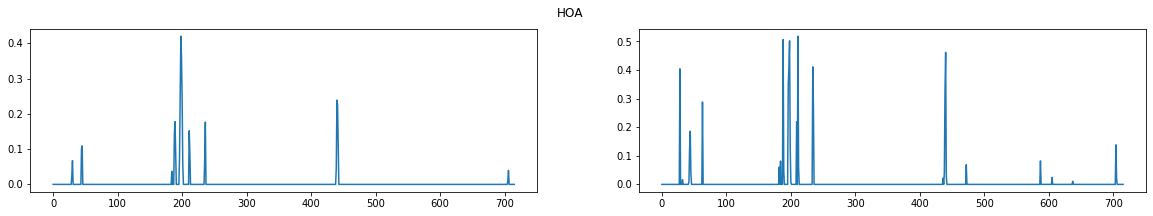

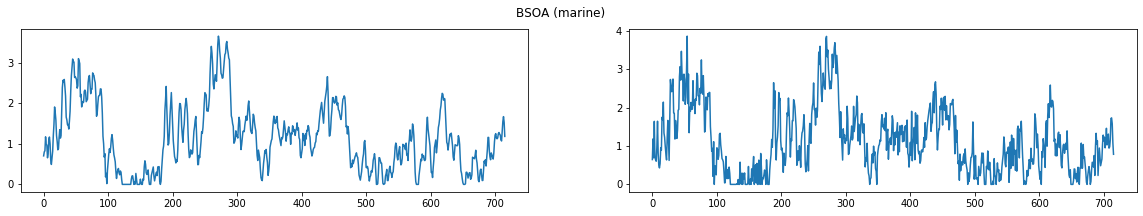

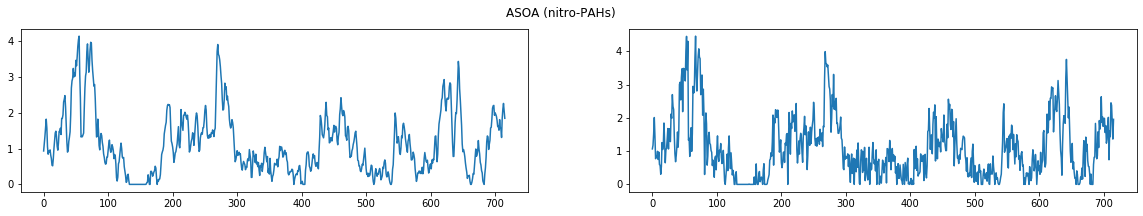

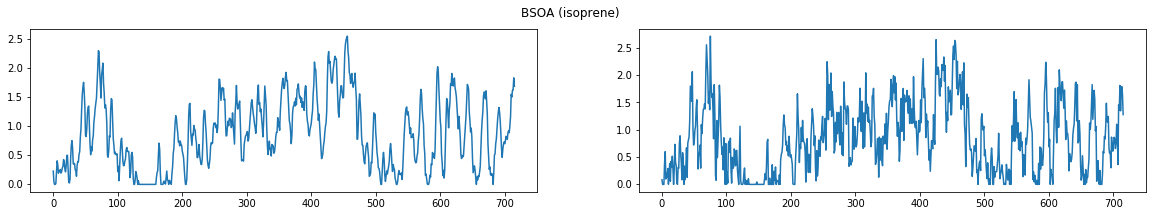

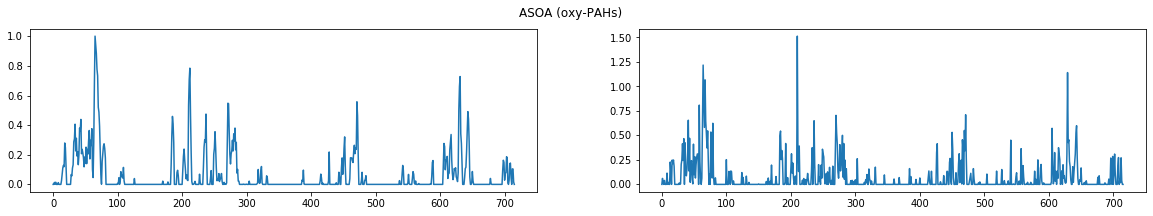

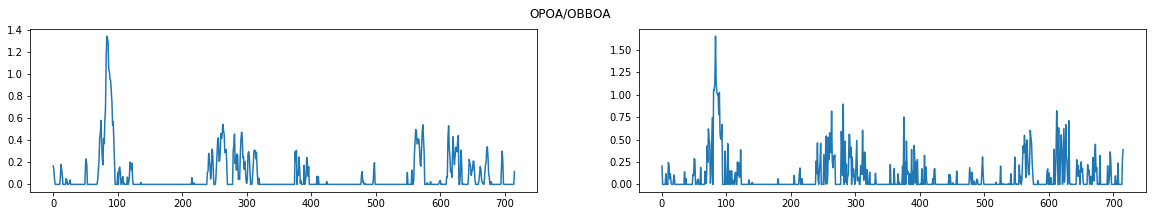

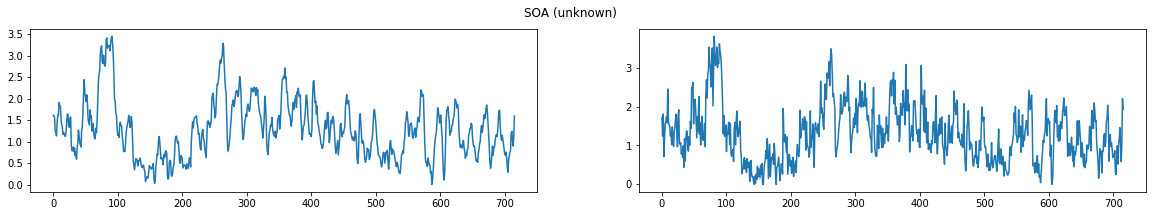

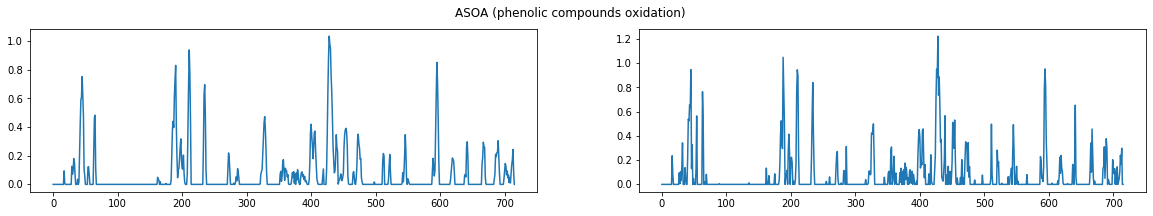

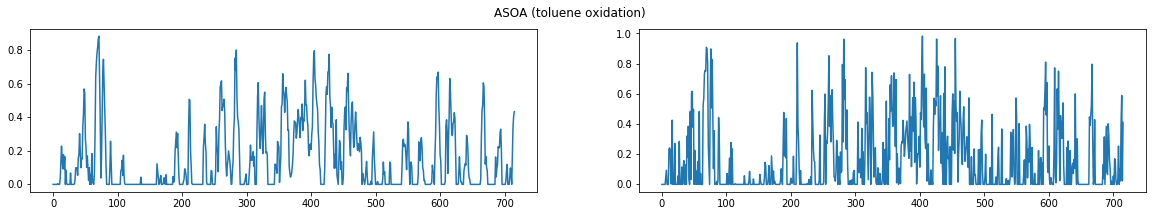

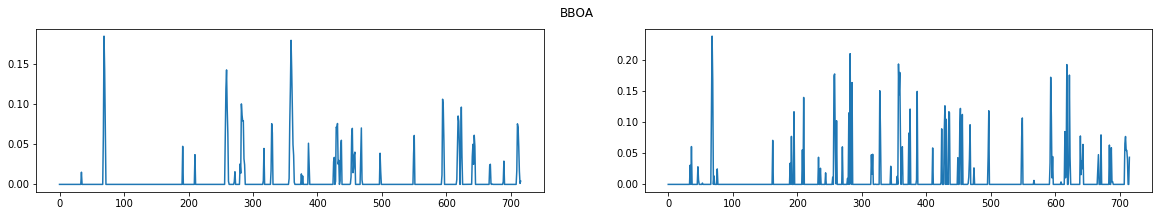

In [13]:
plt.rcParams["figure.figsize"] = (20,3)
for n, prof in enumerate(pro):
    fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.size(7,10)
    fig.suptitle(prof)
    ax1.plot(contirubtion[n])
    ax2.plot(contirubtion1[n])
    plt.show()

# III- Effet de l'approche time series entre 2016-03-01 et 2016-03-31

In [14]:
start_date = '2016-03-01'
end_date = '2016-03-31'
sql = f"""SELECT to_char(date, 'YYYY-MM-DD HH24:00:00') FROM(SELECT date FROM public.data_receptor 
          WHERE date>='{start_date}' AND date<='{end_date}' GROUP BY 1 ORDER BY 1) AS foo;"""
connection = psycopg2.connect(user = USER, password = PASSWORD, host = HOSTNAME, port = PORT, database = DATABASE)
df_dates = sqlio.read_sql_query(sql, connection)
connection.close()
dates = df_dates.T.values[0]

In [15]:
df = pd.read_excel('pmf_profiles.xlsx')

df.drop(columns=['Unnamed: 0'], inplace=True)
df.rename(columns={'Unnamed: 1': 'amus'}, inplace=True)
pro = df.columns[1:]

In [16]:
pro

Index(['HOA', 'BSOA (marine)', 'ASOA (nitro-PAHs)', 'BSOA (isoprene)',
       'ASOA (oxy-PAHs)', 'OPOA/OBBOA', 'SOA (unknown)',
       'ASOA (phenolic compounds oxidation)', 'ASOA (toluene oxidation)',
       'BBOA'],
      dtype='object')

In [17]:
contirubtion = [[] for i in pro]
for i in dates[3:]:    
    date = i
    date_be = (datetime.strptime(date, '%Y-%m-%d %H:%M:%S')-timedelta(hours=1)).strftime('%Y-%m-%d %H:%M:%S')
    date_bee = (datetime.strptime(date, '%Y-%m-%d %H:%M:%S')-timedelta(hours=2)).strftime('%Y-%m-%d %H:%M:%S')
    sql = f"""SELECT * FROM public.data_receptor where date = '{date}' 
    or date = '{date_be}' or date = '{date_bee}'
    order by mass;"""
    connection = psycopg2.connect(user = USER, password = PASSWORD, host = HOSTNAME, port = PORT, database = DATABASE)
    df_receptor_data = sqlio.read_sql_query(sql, connection)
    connection.close()
    df_receptor_data = df_receptor_data[df_receptor_data.columns]
    cor = df.merge(df_receptor_data, left_on='amus', right_on='mass').drop(columns=['mass', 'amus'])


    X_train = cor[pro].values
    y_train = cor['value'].values.reshape(-1,1)

    alpha = 0.0001
    lasso = Lasso(fit_intercept=False, alpha=alpha, positive=True)     # We train without intercept and we shoose to have only positive values
    lasso.fit(X_train, y_train)                                        #training the algorithm  
    print(date)
    for n, prof in enumerate(pro):
        contirubtion[n].append(lasso.coef_[n])

C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035723688985258573, tolerance: 0.0022320676677235595
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002926984293401408, tolerance: 0.0019189498265297829
  positive)


2016-03-01 03:00:00
2016-03-01 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029316092761292045, tolerance: 0.0018987770778390823
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029965323746846823, tolerance: 0.001926670053131067
  positive)


2016-03-01 05:00:00
2016-03-01 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002795842247233532, tolerance: 0.001783346585118477
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019274078614484047, tolerance: 0.0012429269484909682
  positive)


2016-03-01 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012256294481056695, tolerance: 0.0008345464474780589
  positive)


2016-03-01 08:00:00
2016-03-01 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000767654046158868, tolerance: 0.0005087508705612415
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009570067844877905, tolerance: 0.0005665895607113964
  positive)


2016-03-01 10:00:00
2016-03-01 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011334784686210797, tolerance: 0.0006235432714706805
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013128216672157744, tolerance: 0.0007467182210664436
  positive)


2016-03-01 12:00:00
2016-03-01 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015184994987876982, tolerance: 0.0007294152278452574
  positive)


2016-03-01 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015813042393907698, tolerance: 0.0007715041346954265
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016874644795029092, tolerance: 0.0007536973903768449
  positive)


2016-03-01 15:00:00
2016-03-01 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013157260156993894, tolerance: 0.0006931015527800068
  positive)


2016-03-01 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008748252695446879, tolerance: 0.0005376390889391967
  positive)


2016-03-01 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004390694482946378, tolerance: 0.0003560165158056246
  positive)


2016-03-01 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002697833531360161, tolerance: 0.00021356056082123947
  positive)


2016-03-01 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00016755941616005549, tolerance: 0.00013387311191186634
  positive)


2016-03-01 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001339710371438263, tolerance: 0.00010299599832497664
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.255322186840081e-05, tolerance: 7.984899703193363e-05
  positive)


2016-03-01 22:00:00
2016-03-01 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.525301061874975e-05, tolerance: 6.748752295917797e-05
  positive)


2016-03-02 00:00:00
2016-03-02 01:00:00
2016-03-02 02:00:00
2016-03-02 03:00:00
2016-03-02 04:00:00
2016-03-02 05:00:00
2016-03-02 06:00:00
2016-03-02 07:00:00
2016-03-02 08:00:00
2016-03-02 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.392974302390573e-05, tolerance: 3.8313814145760585e-05
  positive)


2016-03-02 10:00:00
2016-03-02 11:00:00
2016-03-02 12:00:00
2016-03-02 13:00:00
2016-03-02 14:00:00
2016-03-02 15:00:00
2016-03-02 16:00:00
2016-03-02 17:00:00
2016-03-02 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.4906100634470314e-05, tolerance: 3.70326391761952e-05
  positive)


2016-03-02 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.137491308211897e-05, tolerance: 5.640881147488689e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.529062094825331e-05, tolerance: 5.7875269297079317e-05
  positive)


2016-03-02 20:00:00
2016-03-02 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.108932479861231e-05, tolerance: 4.9845541233096346e-05
  positive)


2016-03-02 22:00:00
2016-03-02 23:00:00
2016-03-03 00:00:00
2016-03-03 01:00:00
2016-03-03 02:00:00
2016-03-03 03:00:00
2016-03-03 04:00:00
2016-03-03 05:00:00
2016-03-03 06:00:00
2016-03-03 07:00:00
2016-03-03 08:00:00
2016-03-03 09:00:00
2016-03-03 10:00:00
2016-03-03 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.31095327951885e-05, tolerance: 1.8895713775931367e-05
  positive)


2016-03-03 12:00:00
2016-03-03 13:00:00
2016-03-03 14:00:00
2016-03-03 15:00:00
2016-03-03 16:00:00
2016-03-03 17:00:00
2016-03-03 18:00:00
2016-03-03 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010946870922336482, tolerance: 0.0009340531323284399
  positive)


2016-03-03 20:00:00
2016-03-03 21:00:00
2016-03-03 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008171347282249983, tolerance: 0.000488551846531832
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007798221118939588, tolerance: 0.00045307718957853356
  positive)


2016-03-03 23:00:00
2016-03-04 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005566161206460585, tolerance: 0.0003324364967885788
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00021002830446592569, tolerance: 0.00018264298662892445
  positive)


2016-03-04 01:00:00
2016-03-04 02:00:00
2016-03-04 03:00:00
2016-03-04 04:00:00
2016-03-04 05:00:00
2016-03-04 06:00:00
2016-03-04 07:00:00
2016-03-04 08:00:00
2016-03-04 09:00:00
2016-03-04 10:00:00
2016-03-04 11:00:00
2016-03-04 12:00:00
2016-03-04 13:00:00
2016-03-04 14:00:00
2016-03-04 15:00:00
2016-03-04 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.498638333922059e-05, tolerance: 6.654935875622952e-05
  positive)


2016-03-04 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00022715312996365866, tolerance: 0.0001768798664122522
  positive)


2016-03-04 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00044058833790133756, tolerance: 0.00025658358662406834
  positive)


2016-03-04 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007161026148166869, tolerance: 0.00034922832782319295
  positive)


2016-03-04 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008962524491147872, tolerance: 0.00043780529538929705
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009043820711888834, tolerance: 0.00044446705320197086
  positive)


2016-03-04 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009313508162524659, tolerance: 0.0004945343912195903
  positive)


2016-03-04 22:00:00
2016-03-04 23:00:00
2016-03-05 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007520465807615839, tolerance: 0.00041153420441012947
  positive)


2016-03-05 01:00:00
2016-03-05 02:00:00
2016-03-05 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3879766708662384e-05, tolerance: 3.278317993321428e-05
  positive)


2016-03-05 04:00:00
2016-03-05 05:00:00
2016-03-05 06:00:00
2016-03-05 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.610710995825277e-05, tolerance: 7.650743661424387e-05
  positive)


2016-03-05 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00014952510032928065, tolerance: 0.00010780621328075466
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002058434822307248, tolerance: 0.00012785490790869842
  positive)


2016-03-05 09:00:00
2016-03-05 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001730861211397157, tolerance: 0.0001609286918524894
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00022436440988182066, tolerance: 0.00021174780063791713
  positive)


2016-03-05 11:00:00
2016-03-05 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003282507581575875, tolerance: 0.0002559047902210017
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004424588866337332, tolerance: 0.0003017481165200961
  positive)


2016-03-05 13:00:00
2016-03-05 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000433431283133532, tolerance: 0.0003407601359194622
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003532965095695284, tolerance: 0.00030381897787849896
  positive)


2016-03-05 15:00:00
2016-03-05 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004586014723974019, tolerance: 0.00035822768922257346
  positive)


2016-03-05 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008239489739770289, tolerance: 0.0005480449015927901
  positive)


2016-03-05 18:00:00
2016-03-05 19:00:00
2016-03-05 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012697606509658454, tolerance: 0.0010186381235118274
  positive)


2016-03-05 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007989715129743669, tolerance: 0.0006148437455784624
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006958444220819173, tolerance: 0.000432074608436594
  positive)


2016-03-05 22:00:00
2016-03-05 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006398188086347845, tolerance: 0.0005078623281797301
  positive)


2016-03-06 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008732878935516844, tolerance: 0.000559520943101658
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009755280355096124, tolerance: 0.0005639004149707807
  positive)


2016-03-06 01:00:00
2016-03-06 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008613570945408613, tolerance: 0.000447105596311884
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005001298675953933, tolerance: 0.00037073042194066014
  positive)


2016-03-06 03:00:00
2016-03-06 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003902593387751993, tolerance: 0.0002916490935900635
  positive)


2016-03-06 05:00:00
2016-03-06 06:00:00
2016-03-06 07:00:00
2016-03-06 08:00:00
2016-03-06 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00019130212419194575, tolerance: 0.00016288102399519478
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00014518415926878525, tolerance: 0.00011024976641495146
  positive)


2016-03-06 10:00:00
2016-03-06 11:00:00

C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001336271016619539, tolerance: 0.00010645222665834836
  positive)



2016-03-06 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00013062304987626616, tolerance: 0.00010517868165571649
  positive)


2016-03-06 13:00:00
2016-03-06 14:00:00
2016-03-06 15:00:00
2016-03-06 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00027019658571204863, tolerance: 0.00023058618156544109
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006138909096013306, tolerance: 0.00036402328967363777
  positive)


2016-03-06 17:00:00
2016-03-06 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007580249760894553, tolerance: 0.0005816606764027068
  positive)


2016-03-06 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011729614678162026, tolerance: 0.0010961937907860123
  positive)


2016-03-06 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015602145161598413, tolerance: 0.0013839454353819012
  positive)


2016-03-06 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018207214699749175, tolerance: 0.0014951523708265431
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014413004461591161, tolerance: 0.001182572930037917
  positive)


2016-03-06 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008789407768038382, tolerance: 0.0008318074479757856
  positive)


2016-03-06 23:00:00
2016-03-07 00:00:00
2016-03-07 01:00:00
2016-03-07 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00043590926441811756, tolerance: 0.0003777264193363702
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000499999004383439, tolerance: 0.00036405064511887026
  positive)


2016-03-07 03:00:00
2016-03-07 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004809370797262888, tolerance: 0.0003679505007711574
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004316164832921521, tolerance: 0.00036736783352484567
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004185697437156452, tolerance: 0.0003973371260727381
  positive)


2016-03-07 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004927138953243777, tolerance: 0.0003899649458981712
  positive)


2016-03-07 06:00:00
2016-03-07 07:00:00
2016-03-07 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004449418039992395, tolerance: 0.0003364760956821417
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002737747247830158, tolerance: 0.00024749242952531986
  positive)


2016-03-07 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00017375948637951555, tolerance: 0.00015614685858864855
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00011541119445247078, tolerance: 9.421893153992378e-05
  positive)


2016-03-07 10:00:00
2016-03-07 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010973525732481046, tolerance: 8.031903617005603e-05
  positive)


2016-03-07 12:00:00
2016-03-07 13:00:00
2016-03-07 14:00:00
2016-03-07 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.169077054766394e-05, tolerance: 3.9132505100752325e-05
  positive)


2016-03-07 16:00:00
2016-03-07 17:00:00
2016-03-07 18:00:00
2016-03-07 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00022244667640664018, tolerance: 0.0001977111718064336
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006589043747997625, tolerance: 0.00041684427613207113
  positive)


2016-03-07 20:00:00
2016-03-07 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008892919891711759, tolerance: 0.0005148179791453982
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00042265410748787424, tolerance: 0.000418455718843478
  positive)


2016-03-07 22:00:00
2016-03-07 23:00:00
2016-03-08 00:00:00
2016-03-11 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003987688719467615, tolerance: 0.00250635553586027
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00830412269464964, tolerance: 0.005347597933254794
  positive)


2016-03-11 18:00:00
2016-03-11 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014827710171087416, tolerance: 0.008948291296395905
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018198437403841083, tolerance: 0.01163573305750628
  positive)


2016-03-11 20:00:00
2016-03-11 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022787346985641443, tolerance: 0.014711846140574083
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.027317441134677822, tolerance: 0.01742846175521223
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03046296135753726, tolerance: 0.018964179891522527
  positive)


2016-03-11 22:00:00
2016-03-11 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.030655966694965148, tolerance: 0.019835786399455855
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03239946246506825, tolerance: 0.0207067757149637
  positive)


2016-03-12 00:00:00
2016-03-12 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.032607285728288346, tolerance: 0.020747871045173814
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03225635704553695, tolerance: 0.02041327622134237
  positive)


2016-03-12 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02827833649524214, tolerance: 0.018340900782089272
  positive)


2016-03-12 03:00:00
2016-03-12 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021083587770688972, tolerance: 0.015234377460043986
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019090889759893814, tolerance: 0.011705332749890624
  positive)


2016-03-12 05:00:00
2016-03-12 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015382062251496631, tolerance: 0.008718018528069832
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013343245790047753, tolerance: 0.0068844747304473205
  positive)


2016-03-12 07:00:00
2016-03-12 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011096515600439755, tolerance: 0.005528531983193235
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009088074418248326, tolerance: 0.004323964592553991
  positive)


2016-03-12 09:00:00
2016-03-12 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007404896009802986, tolerance: 0.0031403951598190714
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005542744508590158, tolerance: 0.00212456776454575
  positive)


2016-03-12 11:00:00
2016-03-12 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0048073757303717796, tolerance: 0.0017898852916975927
  positive)


2016-03-12 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005084588297693496, tolerance: 0.0017821913766261632
  positive)


2016-03-12 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004920907638019924, tolerance: 0.001754808568384152
  positive)


2016-03-12 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004793598986156111, tolerance: 0.0019745588053623813
  positive)


2016-03-12 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005391945451664326, tolerance: 0.0023167848235165116
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007472162948022998, tolerance: 0.003124948887796037
  positive)


2016-03-12 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009825791889858326, tolerance: 0.00408488900506879
  positive)


2016-03-12 18:00:00
2016-03-12 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011826075861236574, tolerance: 0.004960486087858803
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012599550251371314, tolerance: 0.0055716656031101755
  positive)


2016-03-12 20:00:00
2016-03-12 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01252016160647515, tolerance: 0.005522607865221236
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013705102531275215, tolerance: 0.006087259689352254
  positive)


2016-03-12 22:00:00
2016-03-12 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013856785449918863, tolerance: 0.006471249030152762
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015438906835290922, tolerance: 0.007186503196384817
  positive)


2016-03-13 00:00:00
2016-03-13 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01442095616406483, tolerance: 0.00706011267945548
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015411505956057031, tolerance: 0.007160747026401889
  positive)


2016-03-13 02:00:00
2016-03-13 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012992298896324639, tolerance: 0.006548262303157009
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010016990713774376, tolerance: 0.005382409301087409
  positive)


2016-03-13 04:00:00
2016-03-13 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00656895690387127, tolerance: 0.003935452628747098
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005505902268865048, tolerance: 0.002810633462402235
  positive)


2016-03-13 06:00:00
2016-03-13 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004871833025253569, tolerance: 0.002222454685842309
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003762943135412977, tolerance: 0.0016798801257070523
  positive)


2016-03-13 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003354970355420775, tolerance: 0.0013703230509971459
  positive)


2016-03-13 09:00:00
2016-03-13 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003294840635174129, tolerance: 0.0012951702818022803
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003189848445530767, tolerance: 0.0012776915152042565
  positive)


2016-03-13 11:00:00
2016-03-13 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034110603360484465, tolerance: 0.00142890529665636
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030036253306230526, tolerance: 0.0013656983859160847
  positive)


2016-03-13 13:00:00
2016-03-13 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029103852825599075, tolerance: 0.0012810171644888995
  positive)


2016-03-13 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026889539222358233, tolerance: 0.0011387351863051283
  positive)


2016-03-13 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003605534908574237, tolerance: 0.0014240145896216125
  positive)


2016-03-13 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00418168391975815, tolerance: 0.001687914007584766
  positive)


2016-03-13 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004157829667803259, tolerance: 0.0017127173736347858
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003627174779449696, tolerance: 0.0014890404987841946
  positive)


2016-03-13 19:00:00
2016-03-13 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002919856440787391, tolerance: 0.0012664224856198485
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029133943791748856, tolerance: 0.0011781642618596975
  positive)


2016-03-13 21:00:00
2016-03-13 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023249806461418457, tolerance: 0.0010348565087465974
  positive)


2016-03-13 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023799810921513107, tolerance: 0.0009688288757075008
  positive)


2016-03-14 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0022895442204809713, tolerance: 0.0009205230341745248
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018424889157220847, tolerance: 0.0009015419422942092
  positive)


2016-03-14 01:00:00
2016-03-14 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001875936030210374, tolerance: 0.0008445352436409739
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019501951345295213, tolerance: 0.0009031374073884216
  positive)


2016-03-14 03:00:00
2016-03-14 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021115395746927057, tolerance: 0.0009350062227775343
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001956959740075856, tolerance: 0.0010449766585707639
  positive)


2016-03-14 05:00:00
2016-03-14 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0022159017519798666, tolerance: 0.0010141994683115513
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0020852365945642527, tolerance: 0.000992676900503554
  positive)


2016-03-14 07:00:00
2016-03-14 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0024020480670168542, tolerance: 0.0010121786494020541
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025185034174337595, tolerance: 0.001003003871930821
  positive)


2016-03-14 09:00:00
2016-03-14 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025556902999365055, tolerance: 0.001057038196538009
  positive)


2016-03-14 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002415286016823316, tolerance: 0.001016519571043899
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002584567699556499, tolerance: 0.001119987514872739
  positive)


2016-03-14 12:00:00
2016-03-14 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026161170689247837, tolerance: 0.0010996011126822268
  positive)


2016-03-14 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023558022407751053, tolerance: 0.0010464754948942728
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002087576877212373, tolerance: 0.0010024029983685396
  positive)


2016-03-14 15:00:00
2016-03-14 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021542850406893396, tolerance: 0.0010068866282869763
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027436624997660974, tolerance: 0.001404588169041579
  positive)


2016-03-14 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035776075784165196, tolerance: 0.001912515768196844
  positive)


2016-03-14 18:00:00
2016-03-14 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003814199424099357, tolerance: 0.002379616066395952
  positive)


2016-03-14 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005101549334946703, tolerance: 0.002503751700071115
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00499273103811132, tolerance: 0.002235485948702204
  positive)


2016-03-14 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004804546477443494, tolerance: 0.0019277720262888686
  positive)


2016-03-14 22:00:00
2016-03-14 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003883504390374909, tolerance: 0.0016079655318525434
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003556915648700903, tolerance: 0.0015385674216501141
  positive)


2016-03-15 00:00:00
2016-03-15 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0038735802049748858, tolerance: 0.0015496445466026644
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0039505320944556235, tolerance: 0.0014978120345087917
  positive)


2016-03-15 02:00:00
2016-03-15 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003988581052705262, tolerance: 0.0014380228996919262
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004086965263251162, tolerance: 0.0013927447451289308
  positive)


2016-03-15 04:00:00
2016-03-15 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003620962206537001, tolerance: 0.0015573659989044934
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0033652460907453163, tolerance: 0.0017252135100221551
  positive)


2016-03-15 06:00:00
2016-03-15 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002906505088020872, tolerance: 0.0019735501395113575
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0031237102995287924, tolerance: 0.0021768897956420618
  positive)


2016-03-15 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034961403803040747, tolerance: 0.0021650257967745796
  positive)


2016-03-15 09:00:00
2016-03-15 10:00:00
2016-03-15 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004828938809902469, tolerance: 0.0020467343098334654
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004221752040194343, tolerance: 0.0017514062339474643
  positive)


2016-03-15 12:00:00
2016-03-15 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003993039247068814, tolerance: 0.0015110697305441068
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035483105717081243, tolerance: 0.0012352795774225242
  positive)


2016-03-15 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025733862006041552, tolerance: 0.0009817279584980064
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002362432298035705, tolerance: 0.0008664000096536233
  positive)


2016-03-15 15:00:00
2016-03-15 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023672020636383018, tolerance: 0.000914045180325422
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003661738704752948, tolerance: 0.0014562395780050924
  positive)


2016-03-15 17:00:00
2016-03-15 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0063125590922956665, tolerance: 0.0027037786110798595
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009044861791714931, tolerance: 0.0040749085171051325
  positive)


2016-03-15 19:00:00
2016-03-15 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009752480971451927, tolerance: 0.004949111478300269
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006813204654672722, tolerance: 0.0041599207213795595
  positive)


2016-03-15 21:00:00
2016-03-15 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0037662613591677996, tolerance: 0.0026873825464266672
  positive)


2016-03-15 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019485782147732333, tolerance: 0.0011793290412460294
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011466641440929931, tolerance: 0.0007263345467245943
  positive)


2016-03-16 00:00:00
2016-03-16 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013752974997057743, tolerance: 0.000867681070216981
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017229520967024653, tolerance: 0.001076651128285482
  positive)


2016-03-16 02:00:00
2016-03-16 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0020325396844855514, tolerance: 0.001310314253140491
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002241544862348982, tolerance: 0.00137335216601235
  positive)


2016-03-16 04:00:00
2016-03-16 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029171868491124076, tolerance: 0.0015505907498957721
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029604314515314333, tolerance: 0.0015678115560995819
  positive)


2016-03-16 06:00:00
2016-03-16 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025236300155777602, tolerance: 0.0013825902584288796
  positive)


2016-03-16 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018880437056491006, tolerance: 0.0009958232967484375
  positive)


2016-03-16 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001013609591029918, tolerance: 0.0005793608312789725
  positive)


2016-03-16 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007317177846540429, tolerance: 0.0003694462838109484
  positive)


2016-03-16 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006153504032395535, tolerance: 0.0003076516507734344
  positive)


2016-03-16 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007232754017976323, tolerance: 0.00037234119066502727
  positive)


2016-03-16 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009679281693109332, tolerance: 0.000478454437615025
  positive)


2016-03-16 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001284682618165195, tolerance: 0.0006278553044358307
  positive)


2016-03-16 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001598327318515766, tolerance: 0.000793608933158138
  positive)


2016-03-16 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017867341600926734, tolerance: 0.0009657918655861023
  positive)


2016-03-16 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023615708855297263, tolerance: 0.001127835201132754
  positive)


2016-03-16 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0032438961908351285, tolerance: 0.001256272902531954
  positive)


2016-03-16 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0031126632889190813, tolerance: 0.0013719742135219128
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003449110521155551, tolerance: 0.0014518749344165252
  positive)


2016-03-16 20:00:00
2016-03-16 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0038196004986984083, tolerance: 0.001531145967477126
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004079358937508326, tolerance: 0.0016070575119221935
  positive)


2016-03-16 22:00:00
2016-03-16 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034113016924081363, tolerance: 0.0017052204393457119
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003198849773108848, tolerance: 0.0017597509687790264
  positive)


2016-03-17 00:00:00
2016-03-17 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003283416190551794, tolerance: 0.001777504904398969
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0038497241773519236, tolerance: 0.0018105779135101274
  positive)


2016-03-17 02:00:00
2016-03-17 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004011861140344616, tolerance: 0.0017507670526051894
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00469139627859997, tolerance: 0.0017827383151187775
  positive)


2016-03-17 04:00:00
2016-03-17 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004811373512416978, tolerance: 0.0018589561169757866
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004710413859482482, tolerance: 0.0018919411931243937
  positive)


2016-03-17 06:00:00
2016-03-17 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004106027933719281, tolerance: 0.0018872996493392137
  positive)


2016-03-17 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004090963095461794, tolerance: 0.0018177522144478837
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004210030792812812, tolerance: 0.0018530689574139214
  positive)


2016-03-17 09:00:00
2016-03-17 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004646379478952061, tolerance: 0.0019029695528326564
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004403188962751908, tolerance: 0.0018716173299527736
  positive)


2016-03-17 11:00:00
2016-03-17 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0040859023611038645, tolerance: 0.001864992018175177
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003499118586388905, tolerance: 0.0015954665928912678
  positive)


2016-03-17 13:00:00
2016-03-17 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003241962399592818, tolerance: 0.0014030522243490971
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003118559037973319, tolerance: 0.0011966110510355412
  positive)


2016-03-17 15:00:00
2016-03-17 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034796979330531178, tolerance: 0.0013240668877635426
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002691093201151462, tolerance: 0.002288968392837784
  positive)


2016-03-17 17:00:00
2016-03-17 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034212583445176747, tolerance: 0.003387138931903951
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0046980445758297296, tolerance: 0.004199140968936944
  positive)


2016-03-17 19:00:00
2016-03-17 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005823505125324424, tolerance: 0.003931629073220715
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007910723238427453, tolerance: 0.0038303847621363285
  positive)


2016-03-17 21:00:00
2016-03-17 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0091681168837974, tolerance: 0.004041413983739619
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00976505533122829, tolerance: 0.005091649368678991
  positive)


2016-03-17 23:00:00
2016-03-18 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008391839914739574, tolerance: 0.005851672371296355
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011181848386336957, tolerance: 0.007198226426489412
  positive)


2016-03-18 01:00:00
2016-03-18 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017770597434134783, tolerance: 0.00814543823083714
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022332879719683063, tolerance: 0.009486196758984633
  positive)


2016-03-18 03:00:00
2016-03-18 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021513102430997327, tolerance: 0.010119419490315017
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021845414016574652, tolerance: 0.010826285101425012
  positive)


2016-03-18 05:00:00
2016-03-18 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020023118519917393, tolerance: 0.011637972586954934
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020971094858755757, tolerance: 0.012737590345065285
  positive)


2016-03-18 07:00:00
2016-03-18 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023929304622312075, tolerance: 0.01332228232565544
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.027405189419647646, tolerance: 0.012290724494449151
  positive)


2016-03-18 09:00:00
2016-03-18 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02412368167898027, tolerance: 0.010310324509684545
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020461376918162633, tolerance: 0.008136726842943478
  positive)


2016-03-18 11:00:00
2016-03-18 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019283310048784696, tolerance: 0.007181167237306769
  positive)


2016-03-18 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017912162942781404, tolerance: 0.006987815082528664
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010482143551396268, tolerance: 0.004748579114270618
  positive)


2016-03-18 14:00:00
2016-03-18 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01069879579486381, tolerance: 0.0046668301359406045
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01661163934501811, tolerance: 0.007073998734604215
  positive)


2016-03-18 17:00:00
2016-03-18 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01616905155415077, tolerance: 0.006712432502139307
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016155102921903336, tolerance: 0.006545279942574572
  positive)


2016-03-18 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013779480254595244, tolerance: 0.005803170436733124
  positive)


2016-03-18 20:00:00
2016-03-18 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009608441863880213, tolerance: 0.0043783178025915215
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005423713607593861, tolerance: 0.0027271624199928825
  positive)


2016-03-18 22:00:00
2016-03-18 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029403386555735475, tolerance: 0.0015163901469751153
  positive)


2016-03-19 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002068873490113428, tolerance: 0.0014674892728155325
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017285201042070153, tolerance: 0.0012550752762147278
  positive)


2016-03-19 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013490180727319112, tolerance: 0.001028035289283535
  positive)


2016-03-19 02:00:00
2016-03-19 03:00:00
2016-03-19 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000874937513905355, tolerance: 0.0007402227070258331
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008751610259971204, tolerance: 0.0006092021766998115
  positive)


2016-03-19 05:00:00
2016-03-19 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006294070757745726, tolerance: 0.0005046896776303001
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005550113957800903, tolerance: 0.00044891739272583103
  positive)


2016-03-19 07:00:00
2016-03-19 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005267853728625968, tolerance: 0.00038432461955101635
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005261290386873478, tolerance: 0.00039645536622286403
  positive)


2016-03-19 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005955821635896114, tolerance: 0.00041837413400568134
  positive)


2016-03-19 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008268292914478358, tolerance: 0.0004762672126189868
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009396448048787052, tolerance: 0.0005464439882198995
  positive)


2016-03-19 11:00:00
2016-03-19 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012810742743347737, tolerance: 0.0005812400184181288
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001400186694581973, tolerance: 0.0006177961136623018
  positive)


2016-03-19 13:00:00
2016-03-19 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00138685968289428, tolerance: 0.0006318581381692999
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011947746991638752, tolerance: 0.0007135729131848163
  positive)


2016-03-19 15:00:00
2016-03-19 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014810848085353712, tolerance: 0.0008199810952559803
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018152285335652496, tolerance: 0.001036595532110086
  positive)


2016-03-19 17:00:00
2016-03-19 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002407456439412939, tolerance: 0.0012689468341569817
  positive)


2016-03-19 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002792465263958613, tolerance: 0.0013562257173616843
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027295562733496703, tolerance: 0.0012931946085274122
  positive)


2016-03-19 20:00:00
2016-03-19 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002110987330447525, tolerance: 0.0010848471018124477
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001305272871147671, tolerance: 0.0009368738407397205
  positive)


2016-03-19 22:00:00
2016-03-19 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012948002502221265, tolerance: 0.0009017158202271738
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014361586503294568, tolerance: 0.0009835145442393333
  positive)


2016-03-20 00:00:00
2016-03-20 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017560929003368024, tolerance: 0.0011059501508628908
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018010268691499697, tolerance: 0.0011417706373513382
  positive)


2016-03-20 02:00:00
2016-03-20 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018396690670080748, tolerance: 0.0012024300738735394
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021149333325877068, tolerance: 0.0013199064541240613
  positive)


2016-03-20 04:00:00
2016-03-20 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002438756303343892, tolerance: 0.001642551168523238
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0031011596677716635, tolerance: 0.001910090366596587
  positive)


2016-03-20 06:00:00
2016-03-20 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003964477273418109, tolerance: 0.0021553742839911147
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036238873071858593, tolerance: 0.002087735080945997
  positive)


2016-03-20 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034435125945126155, tolerance: 0.0018834229176471519
  positive)


2016-03-20 09:00:00
2016-03-20 10:00:00
2016-03-20 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025755106019342278, tolerance: 0.0014888367794425315
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021610037552289157, tolerance: 0.00123462160041361
  positive)


2016-03-20 12:00:00
2016-03-20 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018519464912966493, tolerance: 0.0010726581045652757
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016847044651826723, tolerance: 0.0010183850320641657
  positive)


2016-03-20 14:00:00
2016-03-20 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015844705289567093, tolerance: 0.000889477136897343
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013351363619328559, tolerance: 0.0007991760604577742
  positive)


2016-03-20 16:00:00
2016-03-20 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000951074035891411, tolerance: 0.000657116610229783
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007707609863693288, tolerance: 0.0005592739648048454
  positive)


2016-03-20 18:00:00
2016-03-20 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000972739654056521, tolerance: 0.0004546625362307502
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011313962653247966, tolerance: 0.0005155478718464119
  positive)


2016-03-20 20:00:00
2016-03-20 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001271682278876092, tolerance: 0.0005583208726985756
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014975715269117673, tolerance: 0.0006586180226269387
  positive)


2016-03-20 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001689333720667957, tolerance: 0.0007881485656722546
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019817682959287347, tolerance: 0.000964410627831061
  positive)


2016-03-20 23:00:00
2016-03-21 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016086106748008366, tolerance: 0.0009131282367453262
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011581679877377682, tolerance: 0.0006935666036439903
  positive)


2016-03-21 01:00:00
2016-03-21 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009255699143257204, tolerance: 0.0004829934317266922
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010021387894072614, tolerance: 0.00048373897151533313
  positive)


2016-03-21 03:00:00
2016-03-21 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013039542149487285, tolerance: 0.0005770658780567395
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007946819083525514, tolerance: 0.0005178324513396461
  positive)


2016-03-21 05:00:00
2016-03-21 06:00:00
2016-03-21 09:00:00
2016-03-21 10:00:00
2016-03-21 11:00:00
2016-03-21 12:00:00
2016-03-21 13:00:00
2016-03-21 14:00:00
2016-03-21 15:00:00
2016-03-21 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00027597979115126167, tolerance: 0.00017512765663537129
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00032925404785148424, tolerance: 0.00019548195896120296
  positive)


2016-03-21 17:00:00
2016-03-21 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003728859179655958, tolerance: 0.00019412740951028486
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004832291351580531, tolerance: 0.0002341527458731968
  positive)


2016-03-21 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006542730468950819, tolerance: 0.00032783007607506404
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010770881572058078, tolerance: 0.00046706157284628934
  positive)


2016-03-21 20:00:00
2016-03-21 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014778322945523392, tolerance: 0.0005920198367650273
  positive)


2016-03-21 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018499220136398986, tolerance: 0.0007597095117437082
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0024400669959516175, tolerance: 0.0009316570727318497
  positive)


2016-03-21 23:00:00
2016-03-22 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002956938633326786, tolerance: 0.0011432294642388608
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0033010100246938998, tolerance: 0.001321652883491057
  positive)


2016-03-22 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003487185065010112, tolerance: 0.001494623734862659
  positive)


2016-03-22 02:00:00
2016-03-22 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0037219522842127373, tolerance: 0.0016581672164130133
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003926611672187719, tolerance: 0.001820854335321093
  positive)


2016-03-22 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004408830911386358, tolerance: 0.002024766881131274
  positive)


2016-03-22 05:00:00
2016-03-22 06:00:00
2016-03-22 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004530206483998739, tolerance: 0.0022214614437397907
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0038940665997722057, tolerance: 0.001919444404270246
  positive)


2016-03-22 08:00:00
2016-03-22 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002545462328681136, tolerance: 0.0013516258254726886
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014340049316575176, tolerance: 0.0007792845922772255
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011578770326187635, tolerance: 0.0005830395753445242
  positive)


2016-03-22 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010643136603415565, tolerance: 0.0005144173467582185
  positive)


2016-03-22 11:00:00
2016-03-22 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010402814412268785, tolerance: 0.0004021370804048429
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008339535236924524, tolerance: 0.00034135340773224
  positive)


2016-03-22 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007644401085244688, tolerance: 0.00033705751110126156
  positive)


2016-03-22 14:00:00
2016-03-22 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006885580624452284, tolerance: 0.000301153491452891
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005678349460836174, tolerance: 0.00030237200077347197
  positive)


2016-03-22 16:00:00
2016-03-22 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006284021540141072, tolerance: 0.0003387276654651946
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011372339384002061, tolerance: 0.0005227990952265079
  positive)


2016-03-22 18:00:00
2016-03-22 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018325116920547002, tolerance: 0.0007246785250610093
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026287119120811386, tolerance: 0.0011714939211196586
  positive)


2016-03-22 20:00:00
2016-03-22 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0037943291654820577, tolerance: 0.0016903626358687092
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005191518057940062, tolerance: 0.0022087460285630457
  positive)


2016-03-22 22:00:00
2016-03-22 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006231700522429336, tolerance: 0.0024639085177994907
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006692348929165405, tolerance: 0.0025190580020864324
  positive)


2016-03-23 00:00:00
2016-03-23 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006415577400650123, tolerance: 0.002485960957831637
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006516921386161306, tolerance: 0.0026225232808263733
  positive)


2016-03-23 02:00:00
2016-03-23 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007525792052422875, tolerance: 0.003147720722390025
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007482946495888515, tolerance: 0.0033900855091295976
  positive)


2016-03-23 04:00:00
2016-03-23 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005737552668936219, tolerance: 0.0032077535302359175
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002956946520038084, tolerance: 0.0021888915620584966
  positive)


2016-03-23 06:00:00
2016-03-23 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015027123955140276, tolerance: 0.001311043037635084
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007334284599945784, tolerance: 0.0005727653103642381
  positive)


2016-03-23 08:00:00
2016-03-23 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004063867630385576, tolerance: 0.00026413877077280325
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003535514151485064, tolerance: 0.0001758240699358949
  positive)


2016-03-23 10:00:00
2016-03-23 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004261685873303833, tolerance: 0.00019370003095564112
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005341819469978602, tolerance: 0.00023008948144268924
  positive)


2016-03-23 12:00:00
2016-03-23 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00044009399800179483, tolerance: 0.00025476179315138484
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004957580747125198, tolerance: 0.00025647572047019526
  positive)


2016-03-23 14:00:00
2016-03-23 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006753839583369878, tolerance: 0.0003022624455899826
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009346481214422969, tolerance: 0.00035323191631736554
  positive)


2016-03-23 16:00:00
2016-03-23 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013064729038723688, tolerance: 0.000596025558146619
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00206217243144613, tolerance: 0.0010212272827252254
  positive)


2016-03-23 18:00:00
2016-03-23 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0032933030175128497, tolerance: 0.0017862282107489592
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005183867730643388, tolerance: 0.0025214197322212992
  positive)


2016-03-23 20:00:00
2016-03-23 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0056765725618835305, tolerance: 0.002721981098024552
  positive)


2016-03-23 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0047300410189378694, tolerance: 0.0024260294115400075
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027393061490931236, tolerance: 0.0017881897847700373
  positive)


2016-03-23 23:00:00
2016-03-24 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002260644005322346, tolerance: 0.0015594028229024607
  positive)


2016-03-24 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0024212023220683276, tolerance: 0.0015661783859013
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0032897967367908343, tolerance: 0.0019276057116964724
  positive)


2016-03-24 02:00:00
2016-03-24 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004656641669604861, tolerance: 0.002292307298656018
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004923670582853215, tolerance: 0.0025622042766225693
  positive)


2016-03-24 04:00:00
2016-03-24 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004594343916083127, tolerance: 0.0024825285524688527
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0044714698953672305, tolerance: 0.0024210196058811655
  positive)


2016-03-24 06:00:00
2016-03-24 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004087113746511439, tolerance: 0.002366061263257348
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004150313125304412, tolerance: 0.0025395241790189507
  positive)


2016-03-24 08:00:00
2016-03-24 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004011164788378135, tolerance: 0.0025616134713144023
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003792726335072362, tolerance: 0.0025701936497829606
  positive)


2016-03-24 10:00:00
2016-03-24 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0038931884935184957, tolerance: 0.0025346893853438668
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0044157396264686705, tolerance: 0.00271080625799098
  positive)


2016-03-24 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004875930668525347, tolerance: 0.0027989660246584627
  positive)


2016-03-24 13:00:00
2016-03-24 14:00:00
2016-03-24 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004264949214945801, tolerance: 0.0026180567011798816
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004153483431255767, tolerance: 0.0022889225438718496
  positive)


2016-03-24 16:00:00
2016-03-24 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0040504483141649145, tolerance: 0.002218437329511694
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0054161312298569575, tolerance: 0.0026681852397189283
  positive)


2016-03-24 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007097505305107443, tolerance: 0.0036899764588367127
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0070017143454293995, tolerance: 0.0046805939139840155
  positive)


2016-03-24 19:00:00
2016-03-24 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006564661863102617, tolerance: 0.004896098887063226
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008002619685732626, tolerance: 0.004414712990225445
  positive)


2016-03-24 21:00:00
2016-03-24 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0076985330059746795, tolerance: 0.0038940994483874533
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00822635263381069, tolerance: 0.003976600502443653
  positive)


2016-03-24 23:00:00
2016-03-25 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008492003843148244, tolerance: 0.004323375086517337
  positive)


2016-03-25 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009736883737717139, tolerance: 0.004781092361452115
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010018301916995098, tolerance: 0.004870511738545978
  positive)


2016-03-25 02:00:00
2016-03-25 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008041013501275174, tolerance: 0.004074663040858374
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0051243516629440045, tolerance: 0.002663368853862147
  positive)


2016-03-25 04:00:00
2016-03-25 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023788512797725536, tolerance: 0.001353206736426353
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012053428893115115, tolerance: 0.0006353050282758012
  positive)


2016-03-25 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005366992222525235, tolerance: 0.00028617982203595267
  positive)


2016-03-25 07:00:00
2016-03-25 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00016512247837732752, tolerance: 0.00010374760175339303
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.28816350752562e-05, tolerance: 7.077242007679295e-05
  positive)


2016-03-25 09:00:00
2016-03-25 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.213622066029989e-05, tolerance: 5.4268976927239276e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.305162965336217e-05, tolerance: 5.398189765628463e-05
  positive)


2016-03-25 11:00:00
2016-03-25 12:00:00
2016-03-25 13:00:00
2016-03-25 14:00:00
2016-03-25 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00011579557596508999, tolerance: 6.573625926066476e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00021772305656247992, tolerance: 0.00016092288925870606
  positive)


2016-03-25 16:00:00
2016-03-25 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00041984151995849706, tolerance: 0.00026206764938724504
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008203549736907761, tolerance: 0.0003936130157318933
  positive)


2016-03-25 18:00:00
2016-03-25 19:00:00
2016-03-25 20:00:00
2016-03-25 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019600732115399033, tolerance: 0.0016189831676061983
  positive)


2016-03-25 22:00:00
2016-03-25 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002924757512967495, tolerance: 0.0025448452492803754
  positive)


2016-03-26 00:00:00
2016-03-26 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00309485436120871, tolerance: 0.002129315720839494
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0024250765311344957, tolerance: 0.0016598621590861436
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0020859763410810694, tolerance: 0.00124802103242826
  positive)


2016-03-26 02:00:00
2016-03-26 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013635117835631982, tolerance: 0.0009349834270399474
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008629727553812749, tolerance: 0.0005601480419928533
  positive)


2016-03-26 04:00:00
2016-03-26 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00022882289380582455, tolerance: 0.00022086066718576404
  positive)


2016-03-26 06:00:00
2016-03-26 07:00:00
2016-03-26 08:00:00
2016-03-26 09:00:00
2016-03-26 10:00:00
2016-03-26 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.430475710227703e-05, tolerance: 4.7022975777732755e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00017097601853177657, tolerance: 8.20965051407871e-05
  positive)


2016-03-26 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00024752362604715805, tolerance: 0.0001293815627496014
  positive)


2016-03-26 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003010648904531385, tolerance: 0.00019430781145867975
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002661329255299466, tolerance: 0.00023242316144196079
  positive)


2016-03-26 14:00:00
2016-03-26 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00033743179779541915, tolerance: 0.00028214150312420475
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00047543739794281975, tolerance: 0.00031295069066754225
  positive)


2016-03-26 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006226140026721824, tolerance: 0.0003503610797168998
  positive)


2016-03-26 17:00:00
2016-03-26 18:00:00
2016-03-26 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007971144403016578, tolerance: 0.0003424507418178139
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007182048053673215, tolerance: 0.000300989005523999
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005746355569382494, tolerance: 0.00025805989336539885
  positive)


2016-03-26 20:00:00
2016-03-26 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00021130894284071555, tolerance: 0.00016677411743120648
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001119709843794281, tolerance: 8.882735240894459e-05
  positive)


2016-03-26 22:00:00
2016-03-26 23:00:00
2016-03-27 00:00:00
2016-03-27 01:00:00
2016-03-27 02:00:00
2016-03-27 03:00:00
2016-03-27 04:00:00
2016-03-27 05:00:00
2016-03-27 06:00:00
2016-03-27 07:00:00
2016-03-27 08:00:00
2016-03-27 09:00:00
2016-03-27 10:00:00
2016-03-27 11:00:00
2016-03-27 12:00:00
2016-03-27 13:00:00
2016-03-27 14:00:00
2016-03-27 15:00:00
2016-03-27 16:00:00
2016-03-27 17:00:00
2016-03-27 18:00:00
2016-03-27 19:00:00
2016-03-27 20:00:00
2016-03-27 21:00:00
2016-03-27 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1002026585052735e-05, tolerance: 1.7783916350409102e-05
  positive)


2016-03-27 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3841653393977952e-05, tolerance: 2.0705088634276912e-05
  positive)


2016-03-28 00:00:00
2016-03-28 01:00:00
2016-03-28 02:00:00
2016-03-28 03:00:00
2016-03-28 04:00:00
2016-03-28 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.349942171866025e-05, tolerance: 3.0572843272128034e-05
  positive)


2016-03-28 06:00:00
2016-03-28 07:00:00
2016-03-28 08:00:00
2016-03-28 09:00:00
2016-03-28 10:00:00
2016-03-28 11:00:00
2016-03-28 12:00:00
2016-03-28 13:00:00
2016-03-28 14:00:00
2016-03-28 15:00:00
2016-03-28 16:00:00
2016-03-28 17:00:00
2016-03-28 18:00:00
2016-03-28 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.26725314388418e-05, tolerance: 2.6621980687844217e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6429214730748903e-05, tolerance: 1.5278438570090507e-05
  positive)


2016-03-28 20:00:00
2016-03-28 21:00:00
2016-03-28 22:00:00
2016-03-28 23:00:00
2016-03-29 00:00:00
2016-03-29 01:00:00
2016-03-29 02:00:00
2016-03-29 03:00:00
2016-03-29 04:00:00
2016-03-29 05:00:00
2016-03-29 06:00:00
2016-03-29 07:00:00
2016-03-29 08:00:00
2016-03-29 09:00:00
2016-03-29 10:00:00
2016-03-29 11:00:00
2016-03-29 12:00:00
2016-03-29 13:00:00
2016-03-29 14:00:00
2016-03-29 15:00:00
2016-03-29 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010128662451316939, tolerance: 5.7983053040792655e-05
  positive)


2016-03-29 17:00:00
2016-03-29 18:00:00
2016-03-29 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.114269710919088e-05, tolerance: 6.270746541226107e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.466897480535751e-05, tolerance: 7.609464369909023e-05
  positive)


2016-03-29 20:00:00
2016-03-29 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.807533934593979e-05, tolerance: 8.392307522305149e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00011361876569478124, tolerance: 0.00010990393362101044
  positive)


2016-03-29 22:00:00
2016-03-29 23:00:00
2016-03-30 00:00:00
2016-03-30 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.805271296170828e-05, tolerance: 6.877565075270203e-05
  positive)


2016-03-30 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.663674605825227e-05, tolerance: 5.675888097210864e-05
  positive)


2016-03-30 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.732216022821649e-05, tolerance: 5.9407118730073044e-05
  positive)


2016-03-30 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010562562476894473, tolerance: 6.975301505984941e-05
  positive)


2016-03-30 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001299464820310823, tolerance: 7.055169510285983e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00011086516002285426, tolerance: 6.325062862744584e-05
  positive)


2016-03-30 06:00:00
2016-03-30 07:00:00
2016-03-30 08:00:00
2016-03-30 09:00:00
2016-03-30 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8433148462000957e-05, tolerance: 2.0328274761673e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.832791776541694e-05, tolerance: 2.8710001269704005e-05
  positive)


2016-03-30 11:00:00
2016-03-30 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.253444839111419e-05, tolerance: 4.401470594186863e-05
  positive)


2016-03-30 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00012532979476809203, tolerance: 6.157781972800708e-05
  positive)


2016-03-30 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00022727889112386657, tolerance: 0.00011776912353318153
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00027508713278578956, tolerance: 0.00019155400345750645
  positive)


2016-03-30 15:00:00
2016-03-30 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003026010617654465, tolerance: 0.00023550847815042016
  positive)


2016-03-30 17:00:00
2016-03-30 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006738226871139674, tolerance: 0.0004957887669600803
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012792143152841398, tolerance: 0.000646627597189179
  positive)


2016-03-30 19:00:00
2016-03-30 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015354725748378817, tolerance: 0.0006603390511327767
  positive)


2016-03-30 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013170311518869715, tolerance: 0.0005296793306938948
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009531040544629443, tolerance: 0.00040968176710872204
  positive)


2016-03-30 22:00:00
2016-03-30 23:00:00
2016-03-31 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005771867648115964, tolerance: 0.0002957063149430014
  positive)


In [18]:
contirubtion1 = [[] for i in pro]
for i in dates[3:]:    
    date = i
    date_be = (datetime.strptime(date, '%Y-%m-%d %H:%M:%S')-timedelta(hours=1)).strftime('%Y-%m-%d %H:%M:%S')
    date_bee = (datetime.strptime(date, '%Y-%m-%d %H:%M:%S')-timedelta(hours=2)).strftime('%Y-%m-%d %H:%M:%S')
    sql = f"""SELECT * FROM public.data_receptor where date = '{date}' 
    order by mass;"""
    connection = psycopg2.connect(user = USER, password = PASSWORD, host = HOSTNAME, port = PORT, database = DATABASE)
    df_receptor_data = sqlio.read_sql_query(sql, connection)
    connection.close()
    df_receptor_data = df_receptor_data[df_receptor_data.columns]
    cor = df.merge(df_receptor_data, left_on='amus', right_on='mass').drop(columns=['mass', 'amus'])


    X_train = cor[pro].values
    y_train = cor['value'].values.reshape(-1,1)

    alpha = 0.0001
    lasso = Lasso(fit_intercept=False, alpha=alpha, positive=True)     # We train without intercept and we shoose to have only positive values
    lasso.fit(X_train, y_train)                                        #training the algorithm  
    print(date)
    for n, prof in enumerate(pro):
        contirubtion1[n].append(lasso.coef_[n])

2016-03-01 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000959474447086048, tolerance: 0.0006029290630632886
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001159500700189357, tolerance: 0.000744496999298604
  positive)


2016-03-01 04:00:00
2016-03-01 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008355884543763655, tolerance: 0.0005792439907691744
  positive)


2016-03-01 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008057640294170994, tolerance: 0.0004596055950506986
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003590092246972317, tolerance: 0.00020407736267109524
  positive)


2016-03-01 07:00:00
2016-03-01 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00021427166857417197, tolerance: 0.00017086348975626478
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002517071409184248, tolerance: 0.00013381001813388154
  positive)


2016-03-01 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00041712080403184673, tolerance: 0.00026191605282125004
  positive)


2016-03-01 10:00:00
2016-03-01 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000405708406000644, tolerance: 0.000227817200515549
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004216714940202676, tolerance: 0.00025698496772964455
  positive)


2016-03-01 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005609904845891166, tolerance: 0.00024461305960006373
  positive)


2016-03-01 13:00:00
2016-03-01 14:00:00
2016-03-01 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00038982954657450913, tolerance: 0.00026990610736571814
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006032277538820033, tolerance: 0.00023917822341106297
  positive)


2016-03-01 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00022604198006632645, tolerance: 0.0001840172220032256
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00013397866121863528, tolerance: 0.00011444364352490815
  positive)


2016-03-01 17:00:00
2016-03-01 18:00:00
2016-03-01 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.951269112396216e-05, tolerance: 4.156126701884051e-05
  positive)


2016-03-01 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.064632284383899e-05, tolerance: 3.475619461553503e-05
  positive)


2016-03-01 21:00:00
2016-03-01 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.132755951516057e-05, tolerance: 1.8414265725797506e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6947190933059115e-05, tolerance: 2.2394720542779352e-05
  positive)


2016-03-01 23:00:00
2016-03-02 00:00:00
2016-03-02 01:00:00
2016-03-02 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.812511942619107e-05, tolerance: 1.6410179368911922e-05
  positive)


2016-03-02 03:00:00
2016-03-02 04:00:00
2016-03-02 05:00:00
2016-03-02 06:00:00
2016-03-02 07:00:00
2016-03-02 08:00:00
2016-03-02 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4065268750666884e-05, tolerance: 1.7243809912154345e-05
  positive)


2016-03-02 10:00:00
2016-03-02 11:00:00
2016-03-02 12:00:00
2016-03-02 13:00:00
2016-03-02 14:00:00
2016-03-02 15:00:00
2016-03-02 16:00:00
2016-03-02 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.860150779716695e-06, tolerance: 7.963100494100642e-06
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.506558798271886e-05, tolerance: 2.172627259030628e-05
  positive)


2016-03-02 18:00:00
2016-03-02 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.232838778062996e-05, tolerance: 2.6719438390479967e-05
  positive)


2016-03-02 20:00:00
2016-03-02 21:00:00
2016-03-02 22:00:00
2016-03-02 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.455527396707683e-06, tolerance: 4.008744761080597e-06
  positive)


2016-03-03 00:00:00
2016-03-03 01:00:00
2016-03-03 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.439844069836437e-06, tolerance: 7.934810428909495e-06
  positive)


2016-03-03 03:00:00
2016-03-03 04:00:00
2016-03-03 05:00:00
2016-03-03 06:00:00
2016-03-03 07:00:00
2016-03-03 08:00:00
2016-03-03 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.255337471203307e-06, tolerance: 7.3790828087456386e-06
  positive)


2016-03-03 10:00:00
2016-03-03 11:00:00
2016-03-03 12:00:00
2016-03-03 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.162538984881994e-06, tolerance: 5.926465458098764e-06
  positive)


2016-03-03 14:00:00
2016-03-03 15:00:00
2016-03-03 16:00:00
2016-03-03 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.417680615133353e-05, tolerance: 2.8972426506880367e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00029762797633681864, tolerance: 0.0001893620901799249
  positive)


2016-03-03 18:00:00
2016-03-03 19:00:00
2016-03-03 20:00:00
2016-03-03 21:00:00
2016-03-03 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002638700375431277, tolerance: 0.0001700837316517979
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00022004935737495812, tolerance: 0.00013741365156054038
  positive)


2016-03-03 23:00:00
2016-03-04 00:00:00
2016-03-04 01:00:00
2016-03-04 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.069524541406539e-05, tolerance: 1.0572704967213589e-05
  positive)


2016-03-04 03:00:00
2016-03-04 04:00:00
2016-03-04 05:00:00
2016-03-04 06:00:00
2016-03-04 07:00:00
2016-03-04 08:00:00
2016-03-04 09:00:00
2016-03-04 10:00:00
2016-03-04 11:00:00
2016-03-04 12:00:00
2016-03-04 13:00:00
2016-03-04 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.998332439741046e-06, tolerance: 7.12451284350797e-06
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9541777507217986e-05, tolerance: 1.6007680990211166e-05
  positive)


2016-03-04 15:00:00
2016-03-04 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.52108870560363e-05, tolerance: 4.3417164922510376e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00018590221669474933, tolerance: 0.00011745502049953065
  positive)


2016-03-04 17:00:00
2016-03-04 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002031305399973612, tolerance: 9.57114012020273e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003109481101012776, tolerance: 0.00013606190612163507
  positive)


2016-03-04 19:00:00
2016-03-04 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00033391845566892045, tolerance: 0.00020603198806563478
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010738579015774066, tolerance: 0.00010237315901470119
  positive)


2016-03-04 21:00:00
2016-03-04 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003803009469269397, tolerance: 0.00018612924413925438
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00015424784472253816, tolerance: 0.00012303180125617397
  positive)


2016-03-04 23:00:00
2016-03-05 00:00:00
2016-03-05 01:00:00
2016-03-05 02:00:00
2016-03-05 03:00:00
2016-03-05 04:00:00
2016-03-05 05:00:00
2016-03-05 06:00:00
2016-03-05 07:00:00
2016-03-05 08:00:00
2016-03-05 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.057843847187506e-05, tolerance: 5.664269245162699e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.40180875951598e-05, tolerance: 6.551759044831287e-05
  positive)


2016-03-05 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00011817910980679511, tolerance: 8.958751773797724e-05
  positive)


2016-03-05 11:00:00
2016-03-05 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001315692547341988, tolerance: 0.0001007996820347116
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001417296289136262, tolerance: 0.00011136091674740728
  positive)


2016-03-05 13:00:00
2016-03-05 14:00:00
2016-03-05 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.839671956206545e-05, tolerance: 6.385852399374833e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00029064751092917635, tolerance: 0.00016576962809148168
  positive)


2016-03-05 16:00:00
2016-03-05 17:00:00
2016-03-05 18:00:00
2016-03-05 19:00:00
2016-03-05 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00045947218670648604, tolerance: 0.0003317446864369575
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00025060568043524037, tolerance: 0.00015007657322994495
  positive)


2016-03-05 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001649110808603308, tolerance: 0.00013302248591155982
  positive)


2016-03-05 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00016861207765397554, tolerance: 0.00014897554929508918
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00026895032928327123, tolerance: 0.00022586429297308117
  positive)


2016-03-05 23:00:00
2016-03-06 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00033215932931301116, tolerance: 0.00018468110083348763
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002127498357513075, tolerance: 0.000153355021164212
  positive)


2016-03-06 01:00:00
2016-03-06 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00016987956253683716, tolerance: 0.0001090694743141843
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00012545406937336263, tolerance: 0.00010830592646226381
  positive)


2016-03-06 03:00:00
2016-03-06 04:00:00
2016-03-06 05:00:00
2016-03-06 06:00:00
2016-03-06 07:00:00
2016-03-06 08:00:00
2016-03-06 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.46023384465754e-05, tolerance: 3.8159746404254476e-05
  positive)


2016-03-06 10:00:00
2016-03-06 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.979013013991975e-05, tolerance: 4.575854649039961e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.32381124585296e-05, tolerance: 3.688620140162261e-05
  positive)


2016-03-06 12:00:00
2016-03-06 13:00:00
2016-03-06 14:00:00
2016-03-06 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9027185411535156e-05, tolerance: 3.798770396952686e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.578754850314347e-05, tolerance: 8.065062221180618e-05
  positive)


2016-03-06 16:00:00
2016-03-06 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001976472147655708, tolerance: 0.0001119478553841081
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00024205885210119155, tolerance: 0.0001714248120777235
  positive)


2016-03-06 18:00:00
2016-03-06 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007082301348880632, tolerance: 0.0006264809697674137
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005980097152579345, tolerance: 0.0004591764566736123
  positive)


2016-03-06 20:00:00
2016-03-06 21:00:00
2016-03-06 22:00:00
2016-03-06 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003441250514619387, tolerance: 0.0003139015289787873
  positive)


2016-03-07 00:00:00
2016-03-07 01:00:00
2016-03-07 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00021073934076119068, tolerance: 0.00013791539918886576
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00013206242365071483, tolerance: 9.473520039398112e-05
  positive)


2016-03-07 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00017162566925264843, tolerance: 0.00013529990118831063
  positive)


2016-03-07 04:00:00
2016-03-07 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00018990767007607276, tolerance: 0.00012470449294187358
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001717278014855281, tolerance: 0.00012792772101374367
  positive)


2016-03-07 06:00:00
2016-03-07 07:00:00
2016-03-07 08:00:00
2016-03-07 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.018786876150952e-05, tolerance: 3.658215007707234e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.809031939082036e-05, tolerance: 2.1915954677799684e-05
  positive)


2016-03-07 10:00:00
2016-03-07 11:00:00
2016-03-07 12:00:00
2016-03-07 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9174813814432567e-05, tolerance: 1.3450845381890481e-05
  positive)


2016-03-07 14:00:00
2016-03-07 15:00:00
2016-03-07 16:00:00
2016-03-07 17:00:00
2016-03-07 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00021297772417607982, tolerance: 0.0001271661995899512
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003737044820448631, tolerance: 0.00023283801445766323
  positive)


2016-03-07 19:00:00
2016-03-07 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00024700204887519476, tolerance: 0.00015481376509778378
  positive)


2016-03-07 21:00:00
2016-03-07 22:00:00
2016-03-07 23:00:00
2016-03-08 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003537485514690549, tolerance: 0.0020897534839559827
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003987688719467615, tolerance: 0.00250635553586027
  positive)


2016-03-11 17:00:00
2016-03-11 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004432379700626909, tolerance: 0.0028412423973945247
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006725286131168795, tolerance: 0.003600693363141111
  positive)


2016-03-11 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008210587537067333, tolerance: 0.005193797296970644
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0102382937859564, tolerance: 0.005917355480462327
  positive)


2016-03-11 20:00:00
2016-03-11 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010349656058557435, tolerance: 0.006317308977779259
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011111402365457018, tolerance: 0.0067295154332809365
  positive)


2016-03-11 22:00:00
2016-03-11 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010280737955381244, tolerance: 0.006788961988395658
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011735163096996924, tolerance: 0.007188298293287105
  positive)


2016-03-12 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01023836240608067, tolerance: 0.006770610763491052
  positive)


2016-03-12 01:00:00
2016-03-12 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009701407311751127, tolerance: 0.006454367164564212
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007973868711548687, tolerance: 0.005115922854034005
  positive)


2016-03-12 03:00:00
2016-03-12 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005360042751874048, tolerance: 0.0036640874414457644
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006080846272116185, tolerance: 0.0029253224544108533
  positive)


2016-03-12 05:00:00
2016-03-12 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003878619563738181, tolerance: 0.0021286086322132142
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036094065792686807, tolerance: 0.0018305436438232534
  positive)


2016-03-12 07:00:00
2016-03-12 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034833652578711875, tolerance: 0.0015693797071567681
  positive)


2016-03-12 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002290139896156961, tolerance: 0.0009240412415739698
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013930389433520008, tolerance: 0.0006469742110883334
  positive)


2016-03-12 10:00:00
2016-03-12 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014553182818224557, tolerance: 0.0005535523118834468
  positive)


2016-03-12 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015845061988889273, tolerance: 0.0005893587687258126
  positive)


2016-03-12 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016958273163677692, tolerance: 0.0006392802960169034
  positive)


2016-03-12 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012992812192447797, tolerance: 0.0005261695036414363
  positive)


2016-03-12 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015711265475114432, tolerance: 0.0008091090057040415
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018285628502345838, tolerance: 0.000981506314171034
  positive)


2016-03-12 16:00:00
2016-03-12 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003257870457920614, tolerance: 0.0013343335679209614
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003989311823343812, tolerance: 0.0017690491229767947
  positive)


2016-03-12 18:00:00
2016-03-12 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004311690059783855, tolerance: 0.0018571033969610473
  positive)


2016-03-12 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004397794055218198, tolerance: 0.0019455130831723334
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0033743566340706556, tolerance: 0.001719991385087856
  positive)


2016-03-12 21:00:00
2016-03-12 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005654591883639846, tolerance: 0.0024217552210920646
  positive)


2016-03-12 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004438342208830224, tolerance: 0.0023295024239728427
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005138291253943984, tolerance: 0.002435245551319909
  positive)


2016-03-13 00:00:00
2016-03-13 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004502854744196316, tolerance: 0.002295364704162728
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005737939350161023, tolerance: 0.002430136770919252
  positive)


2016-03-13 02:00:00
2016-03-13 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027014636673214215, tolerance: 0.0018227608280750275
  positive)


2016-03-13 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018016643631446703, tolerance: 0.0011295117020931284
  positive)


2016-03-13 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002080721461079899, tolerance: 0.0009831800985789405
  positive)


2016-03-13 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012566635177807713, tolerance: 0.0006979416617301661
  positive)


2016-03-13 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012426940814666571, tolerance: 0.0005413329255332025
  positive)


2016-03-13 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010976421616012725, tolerance: 0.00044060553844368385
  positive)


2016-03-13 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009860916941504382, tolerance: 0.00038838458702025963
  positive)


2016-03-13 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010771039837872104, tolerance: 0.0004661801563383371
  positive)


2016-03-13 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010333530734314093, tolerance: 0.00042312677184566
  positive)


2016-03-13 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001229881450871391, tolerance: 0.0005395983684723628
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005239875179608765, tolerance: 0.00040297324559806195
  positive)


2016-03-13 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008854514957002783, tolerance: 0.00033844555041847457
  positive)


2016-03-13 14:00:00
2016-03-13 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001001806250352939, tolerance: 0.00039731639028859196
  positive)


2016-03-13 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015333767619726646, tolerance: 0.0006882526489145459
  positive)


2016-03-13 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001425090015517421, tolerance: 0.000602344968381628
  positive)


2016-03-13 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008255626348179501, tolerance: 0.00042211975633861185
  positive)


2016-03-13 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013013184905579078, tolerance: 0.0004645757740639547
  positive)


2016-03-13 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007763155891390133, tolerance: 0.00037972695521728194
  positive)


2016-03-13 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008161648069077085, tolerance: 0.00033386153257846095
  positive)


2016-03-13 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007045672741916673, tolerance: 0.0003212680209508545
  positive)


2016-03-13 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007549627905632031, tolerance: 0.0003136993221781852
  positive)


2016-03-14 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00046258244665526183, tolerance: 0.0002855556910454851
  positive)


2016-03-14 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000693922254746863, tolerance: 0.0003022869290705389
  positive)


2016-03-14 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005437772414223895, tolerance: 0.00025669262352494976
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005900866269684954, tolerance: 0.0003441578547929329
  positive)


2016-03-14 03:00:00
2016-03-14 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008150766070731939, tolerance: 0.0003341557444596519
  positive)


2016-03-14 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005745611173667529, tolerance: 0.0003666630593181792
  positive)


2016-03-14 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006834538358067234, tolerance: 0.0003133806645337203
  positive)


2016-03-14 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007422099458340697, tolerance: 0.00031263317665165434
  positive)


2016-03-14 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000793892138945808, tolerance: 0.00038616480821667933
  positive)


2016-03-14 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007858880494505402, tolerance: 0.00030420588706248737
  positive)


2016-03-14 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005869408428175755, tolerance: 0.00036666750125884215
  positive)


2016-03-14 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008996996270645239, tolerance: 0.0003456461827225696
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009214091308792291, tolerance: 0.0004076738308913271
  positive)


2016-03-14 12:00:00
2016-03-14 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007723135080828798, tolerance: 0.0003462810990683302
  positive)


2016-03-14 14:00:00
2016-03-14 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006987312236765627, tolerance: 0.0003636013343655939
  positive)


2016-03-14 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007561088507807862, tolerance: 0.0003507647289867671
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011180949655891313, tolerance: 0.000690222105689218
  positive)


2016-03-14 17:00:00
2016-03-14 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015210154678726249, tolerance: 0.0008715289335208589
  positive)


2016-03-14 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009056268455462108, tolerance: 0.0008178650271858747
  positive)


2016-03-14 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002279457412325588, tolerance: 0.0008143577393643814
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016442981669736387, tolerance: 0.0006032631821519479
  positive)


2016-03-14 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001104783643762569, tolerance: 0.0005101511047725397
  positive)


2016-03-14 22:00:00
2016-03-14 23:00:00
2016-03-15 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012432163084227354, tolerance: 0.000494551244928056
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012655236322791337, tolerance: 0.0005338650719495185
  positive)


2016-03-15 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012767819922226854, tolerance: 0.0005212282297250903
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012380439802395973, tolerance: 0.0004427187328341826
  positive)


2016-03-15 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012814908218707934, tolerance: 0.00047407593713265323
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013615321759238687, tolerance: 0.0004759500751620951
  positive)


2016-03-15 03:00:00
2016-03-15 04:00:00
2016-03-15 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008035731466519919, tolerance: 0.0006073399866097451
  positive)


2016-03-15 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007214658148821471, tolerance: 0.0006419234482503149
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010507032581214635, tolerance: 0.0007242867046512975
  positive)


2016-03-15 07:00:00
2016-03-15 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019177005469127786, tolerance: 0.0008106796427404493
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013334985111854401, tolerance: 0.000630059449382833
  positive)


2016-03-15 09:00:00
2016-03-15 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018005590243198501, tolerance: 0.0006059952177101828
  positive)


2016-03-15 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012691282238858678, tolerance: 0.0005153515668544483
  positive)


2016-03-15 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000949590455623742, tolerance: 0.00038972294597947564
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008136045872386387, tolerance: 0.0003302050645886002
  positive)


2016-03-15 13:00:00
2016-03-15 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006147342753553458, tolerance: 0.00026179994792993074
  positive)


2016-03-15 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007634743710233966, tolerance: 0.00027439499713509256
  positive)


2016-03-15 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009099238906992348, tolerance: 0.0003778502352603987
  positive)


2016-03-15 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0020574745909835174, tolerance: 0.0008039943456096012
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036127421143143205, tolerance: 0.0015219340302098593
  positive)


2016-03-15 18:00:00
2016-03-15 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003054290121649811, tolerance: 0.0017489801412856718
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002603210108198719, tolerance: 0.0016781973068047376
  positive)


2016-03-15 20:00:00
2016-03-15 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001109877919774141, tolerance: 0.0007327432732891506
  positive)


2016-03-15 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005417453860067046, tolerance: 0.0002764419663327792
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003649082697282928, tolerance: 0.00017014380162409966
  positive)


2016-03-15 23:00:00
2016-03-16 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00042364454643745663, tolerance: 0.0002797487787677155
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008618961957521792, tolerance: 0.0004177884898251659
  positive)


2016-03-16 01:00:00
2016-03-16 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005259622208292824, tolerance: 0.0003791138596926007
  positive)


2016-03-16 03:00:00
2016-03-16 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009806858231079891, tolerance: 0.0004808264026970249
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010397393501130484, tolerance: 0.0005563524435760228
  positive)


2016-03-16 05:00:00
2016-03-16 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010611471765984305, tolerance: 0.0005306327098265346
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005706935485132805, tolerance: 0.00029560510502632255
  positive)


2016-03-16 07:00:00
2016-03-16 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003271540877160246, tolerance: 0.0001695854818955804
  positive)


2016-03-16 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001628298110062684, tolerance: 0.00011417024435706953
  positive)


2016-03-16 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00020278941820995895, tolerance: 8.56905575582985e-05
  positive)


2016-03-16 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001829895366645554, tolerance: 0.00010779084885806641
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00033916521362841335, tolerance: 0.0001788597842486623
  positive)


2016-03-16 12:00:00
2016-03-16 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00046337115436986473, tolerance: 0.00019180380450829626
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004115040557421878, tolerance: 0.00025719171567887216
  positive)


2016-03-16 14:00:00
2016-03-16 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005608812730938293, tolerance: 0.0003446134129709696
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009072884005113437, tolerance: 0.0003639867369362607
  positive)


2016-03-16 16:00:00
2016-03-16 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000968181201608805, tolerance: 0.0004192350512255239
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010863684635977477, tolerance: 0.0004730511143701696
  positive)


2016-03-16 18:00:00
2016-03-16 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009578178109165315, tolerance: 0.00047968804792621945
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013524547794095164, tolerance: 0.0004991357721201361
  positive)


2016-03-16 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014450372443385543, tolerance: 0.0005523221474307706
  positive)


2016-03-16 21:00:00
2016-03-16 22:00:00
2016-03-16 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011783312659382184, tolerance: 0.0005555995923712866
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011012165806300565, tolerance: 0.0005972986995436542
  positive)


2016-03-17 00:00:00
2016-03-17 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011907838170811483, tolerance: 0.0006068526768640855
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001146977542046455, tolerance: 0.0005733535279912294
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011483346124187364, tolerance: 0.0006303717086548125
  positive)


2016-03-17 02:00:00
2016-03-17 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015001048607422955, tolerance: 0.0005470418159591475
  positive)


2016-03-17 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017681434012731916, tolerance: 0.0006053247905048174
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014349417791467735, tolerance: 0.0007065895105118218
  positive)


2016-03-17 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001386532332072394, tolerance: 0.0005800268921077543
  positive)


2016-03-17 06:00:00
2016-03-17 07:00:00
2016-03-17 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011428886098607512, tolerance: 0.0006006832467196375
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014825484935485182, tolerance: 0.0006370420756204918
  positive)


2016-03-17 09:00:00
2016-03-17 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013295970829770203, tolerance: 0.000615343635073792
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014241820247378363, tolerance: 0.0006505838421383728
  positive)


2016-03-17 11:00:00
2016-03-17 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001363212271062203, tolerance: 0.0006056898527406091
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001452326729448672, tolerance: 0.0006087183232961958
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008262173131801439, tolerance: 0.00038105841685446315
  positive)


2016-03-17 13:00:00
2016-03-17 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011946252165097142, tolerance: 0.00041327548419843813
  positive)


2016-03-17 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000764432379484683, tolerance: 0.0004022771499826398
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008824125681278321, tolerance: 0.0005085142535824644
  positive)


2016-03-17 16:00:00
2016-03-17 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019586152823531933, tolerance: 0.00137817698927268
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001886923860243115, tolerance: 0.001500447689048806
  positive)


2016-03-17 18:00:00
2016-03-17 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023450633430062845, tolerance: 0.001320516290615458
  positive)


2016-03-17 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018054198646022066, tolerance: 0.0011106650935564504
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003690090989206387, tolerance: 0.0013992033779644203
  positive)


2016-03-17 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035376419683812114, tolerance: 0.0015315455122187492
  positive)


2016-03-17 22:00:00
2016-03-17 23:00:00
2016-03-18 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002632465569214499, tolerance: 0.002160900478495821
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0037682076910716122, tolerance: 0.0021592263805817846
  positive)


2016-03-18 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007064998904132681, tolerance: 0.002878099567411806
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005884863919265876, tolerance: 0.00310811228284355
  positive)


2016-03-18 02:00:00
2016-03-18 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007082907373177953, tolerance: 0.003499984908729275
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007528797151709211, tolerance: 0.003511322298742191
  positive)


2016-03-18 04:00:00
2016-03-18 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007014457661345824, tolerance: 0.003814977893953547
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006231768765998978, tolerance: 0.004311672394259196
  positive)


2016-03-18 06:00:00
2016-03-18 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007943251975811076, tolerance: 0.004610940056852544
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00949352812883586, tolerance: 0.0043996698745437
  positive)


2016-03-18 08:00:00
2016-03-18 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007976361603920332, tolerance: 0.0032801145630529066
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0057878156883349255, tolerance: 0.002630540072087938
  positive)


2016-03-18 10:00:00
2016-03-18 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006304291958205248, tolerance: 0.0022260722078026327
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006366055586131181, tolerance: 0.0023245549574162
  positive)


2016-03-18 12:00:00
2016-03-18 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005050205221017231, tolerance: 0.0024371879173098313
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005350463585413145, tolerance: 0.002311391196960788
  positive)


2016-03-18 14:00:00
2016-03-18 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00530036911469803, tolerance: 0.002355438938979817
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005912415488283532, tolerance: 0.00240716859866361
  positive)


2016-03-18 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0047157689018261575, tolerance: 0.0019498249644958783
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005324878690306435, tolerance: 0.0021882863794150846
  positive)


2016-03-18 18:00:00
2016-03-18 19:00:00
2016-03-18 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003570468961859764, tolerance: 0.0016650590928221612
  positive)


2016-03-18 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010769063695010442, tolerance: 0.000524972330354276
  positive)


2016-03-18 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009049659636477967, tolerance: 0.0005371309968164451
  positive)


2016-03-18 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007372168173967767, tolerance: 0.00045428681980439427
  positive)


2016-03-19 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007077798795021096, tolerance: 0.00047607145619469314
  positive)


2016-03-19 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004296760441011233, tolerance: 0.00032471700021564025
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002788757155118564, tolerance: 0.00022724683287320168
  positive)


2016-03-19 02:00:00
2016-03-19 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00021030311269880104, tolerance: 0.00018825887393699117
  positive)


2016-03-19 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002392962593658187, tolerance: 0.00019369646988961852
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00015361396055721052, tolerance: 0.00012273433380369047
  positive)


2016-03-19 05:00:00
2016-03-19 06:00:00

C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00016690981060090912, tolerance: 0.0001324865890325221
  positive)



2016-03-19 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00013953803853652882, tolerance: 0.0001291036967148038
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002680065300486199, tolerance: 0.00013486508047553812
  positive)


2016-03-19 08:00:00
2016-03-19 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00022757811565412775, tolerance: 0.0001544053568153394
  positive)


2016-03-19 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003012790151514077, tolerance: 0.00018699677532810931
  positive)


2016-03-19 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00041391725230029586, tolerance: 0.00020504185607645082
  positive)


2016-03-19 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005543362610835019, tolerance: 0.00018920138701356852
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00035841370109487933, tolerance: 0.00022355287057228255
  positive)


2016-03-19 13:00:00
2016-03-19 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00044794058245356625, tolerance: 0.00021910388058344897
  positive)


2016-03-19 15:00:00
2016-03-19 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006656033728229837, tolerance: 0.00032996105264344644
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005957377981811547, tolerance: 0.0004357183174375546
  positive)


2016-03-19 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010048967611803261, tolerance: 0.0005032674640759806
  positive)


2016-03-19 18:00:00
2016-03-19 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001012368431084842, tolerance: 0.0004172399358481488
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005724967396652757, tolerance: 0.0003726872086032827
  positive)


2016-03-19 20:00:00
2016-03-19 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003438389664130459, tolerance: 0.00029491995736101613
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000357921504258305, tolerance: 0.0002692666747754216
  positive)


2016-03-19 22:00:00
2016-03-19 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005462650479053656, tolerance: 0.00033752918809073606
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006547949523346584, tolerance: 0.0003767186813731757
  positive)


2016-03-20 00:00:00
2016-03-20 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007328939330241866, tolerance: 0.00039170228139897905
  positive)


2016-03-20 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005764558529760926, tolerance: 0.00037334967457918324
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006179939149996779, tolerance: 0.0004373781178953769
  positive)


2016-03-20 03:00:00
2016-03-20 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007789056385253943, tolerance: 0.000509178661649501
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011094726826021747, tolerance: 0.0006959943889783601
  positive)


2016-03-20 05:00:00
2016-03-20 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011170437739196175, tolerance: 0.0007049173159687261
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011649771216302798, tolerance: 0.0007544625790440288
  positive)


2016-03-20 07:00:00
2016-03-20 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008695052570721106, tolerance: 0.0006283551859332418
  positive)


2016-03-20 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000932730925916685, tolerance: 0.0005006051526698814
  positive)


2016-03-20 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00058414062376416, tolerance: 0.0003598764408394081
  positive)


2016-03-20 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000470805408592327, tolerance: 0.00037414000690432067
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006039184199186486, tolerance: 0.000338641656821547
  positive)


2016-03-20 12:00:00
2016-03-20 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000493971552357227, tolerance: 0.00030560336833829806
  positive)


2016-03-20 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00041848995052500655, tolerance: 0.00024523211173749785
  positive)


2016-03-20 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003472777699593055, tolerance: 0.00024834058038197826
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00020735778950011115, tolerance: 0.00016354391811030693
  positive)


2016-03-20 16:00:00
2016-03-20 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00026785046765653246, tolerance: 0.00014738946631256026
  positive)


2016-03-20 18:00:00
2016-03-20 19:00:00

C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00043788929486827943, tolerance: 0.00022442925372596862
  positive)



2016-03-20 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00046162217406911163, tolerance: 0.00019016246716472386
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005788617880108935, tolerance: 0.00024402630173624607
  positive)


2016-03-20 21:00:00
2016-03-20 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006080555608545422, tolerance: 0.00035395979677128447
  positive)


2016-03-20 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007192391324943874, tolerance: 0.00036642452932353033
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00022001692664792502, tolerance: 0.00019274391065051132
  positive)


2016-03-21 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00021493128799578978, tolerance: 0.00013439816366994872
  positive)


2016-03-21 01:00:00
2016-03-21 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00034400745610100843, tolerance: 0.00015585135740623222
  positive)


2016-03-21 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00032936556958307675, tolerance: 0.00019348945043915224
  positive)


2016-03-21 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002939726249664488, tolerance: 0.00022772507021135514
  positive)


2016-03-21 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00016822819993631173, tolerance: 9.661793068913871e-05
  positive)


2016-03-21 06:00:00
2016-03-21 09:00:00
2016-03-21 10:00:00
2016-03-21 11:00:00
2016-03-21 12:00:00
2016-03-21 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.0974815784314304e-05, tolerance: 4.043706960681364e-05
  positive)


2016-03-21 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00011227128727192776, tolerance: 7.324027581598914e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00011463976111392897, tolerance: 6.14503112125685e-05
  positive)


2016-03-21 15:00:00
2016-03-21 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.642571533396562e-05, tolerance: 6.07913719326453e-05
  positive)


2016-03-21 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00019859750294670252, tolerance: 7.188572636507104e-05
  positive)


2016-03-21 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00014962010453329656, tolerance: 0.00010147564757548045
  positive)


2016-03-21 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003262654066429247, tolerance: 0.00015446870213451253
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004973819368682183, tolerance: 0.00021111722313629626
  positive)


2016-03-21 20:00:00
2016-03-21 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005346797794222391, tolerance: 0.00022643391149421843
  positive)


2016-03-21 22:00:00
2016-03-21 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007411548708450479, tolerance: 0.0003221583771131935
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010588750292455582, tolerance: 0.0003830647841244379
  positive)


2016-03-22 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011229673333719619, tolerance: 0.00043800630300122985
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010498855651240643, tolerance: 0.0005005817963653895
  positive)


2016-03-22 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012360395796883247, tolerance: 0.00055603563549604
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014270101460986638, tolerance: 0.0006015497845515837
  positive)


2016-03-22 02:00:00
2016-03-22 03:00:00
2016-03-22 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012852856693609692, tolerance: 0.0006632689152734691
  positive)


2016-03-22 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001523835195011156, tolerance: 0.0007599481813062216
  positive)


2016-03-22 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015406723098409176, tolerance: 0.0007982443471601003
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007255068472757607, tolerance: 0.00036125187580392416
  positive)


2016-03-22 07:00:00
2016-03-22 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004344225585655179, tolerance: 0.00019212960250866422
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003334842946557128, tolerance: 0.00022590311396463713
  positive)


2016-03-22 09:00:00
2016-03-22 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004198970817792507, tolerance: 0.00016500685887122288
  positive)


2016-03-22 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00023830745871215864, tolerance: 0.00012350737392235843
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003005936153356349, tolerance: 0.00011362284761126156
  positive)


2016-03-22 12:00:00
2016-03-22 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002473977459891204, tolerance: 0.00010422318619862
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00020092772632553536, tolerance: 0.00011921147729138006
  positive)


2016-03-22 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00011759694934085308, tolerance: 7.771882796289099e-05
  positive)


2016-03-22 15:00:00
2016-03-22 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001866808152880422, tolerance: 0.00010544169551920089
  positive)


2016-03-22 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003591818440544848, tolerance: 0.00015556714198310272
  positive)


2016-03-22 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006003850586021112, tolerance: 0.00026179025772420425
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008301967196757765, tolerance: 0.0003073211253537024
  positive)


2016-03-22 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012104682889491486, tolerance: 0.000602382538041752
  positive)


2016-03-22 20:00:00
2016-03-22 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018759864899939808, tolerance: 0.0007806589724732551
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021557735957033666, tolerance: 0.0008257045180480386
  positive)


2016-03-22 22:00:00
2016-03-22 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0022005580879928084, tolerance: 0.0008575450272781964
  positive)


2016-03-23 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021900108300921548, tolerance: 0.0008358084567601968
  positive)


2016-03-23 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021234187182941396, tolerance: 0.0007926074737932439
  positive)


2016-03-23 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023303350177808005, tolerance: 0.0009941073502729328
  positive)


2016-03-23 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0031007916870980576, tolerance: 0.0013610058983238478
  positive)


2016-03-23 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0019312065944373687, tolerance: 0.0010349722605328166
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009677501780425042, tolerance: 0.0008117753713792531
  positive)


2016-03-23 05:00:00
2016-03-23 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003937177081945074, tolerance: 0.00034214393014642694
  positive)


2016-03-23 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003245202147648457, tolerance: 0.00015712373610940396
  positive)


2016-03-23 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.652139876834193e-05, tolerance: 7.349764410840721e-05
  positive)


2016-03-23 09:00:00
2016-03-23 10:00:00

C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00015513750606886288, tolerance: 6.880903527249567e-05
  positive)



2016-03-23 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00017672055044313292, tolerance: 9.137360512815338e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00013662029119644245, tolerance: 6.990684104204017e-05
  positive)


2016-03-23 12:00:00
2016-03-23 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00011185061093451623, tolerance: 9.348134698119129e-05
  positive)


2016-03-23 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002022803568387816, tolerance: 9.30875324469638e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002332562858504781, tolerance: 0.00011569356616182756
  positive)


2016-03-23 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.000401225060040704, tolerance: 0.0001444508177085742
  positive)


2016-03-23 16:00:00
2016-03-23 17:00:00
2016-03-23 18:00:00

C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006345317037961679, tolerance: 0.0003358811742762173
  positive)


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009864001027083038, tolerance: 0.0005408952907404341
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017966642655464129, tolerance: 0.0009094517457323081
  positive)


2016-03-23 19:00:00
2016-03-23 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023647519930402837, tolerance: 0.0010710726957485572
  positive)


2016-03-23 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012246638817984701, tolerance: 0.0007414566565436868
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009094900236949178, tolerance: 0.0006135000592477633
  positive)


2016-03-23 22:00:00
2016-03-23 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007437458084521365, tolerance: 0.0004332330689785872
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0008373043140628878, tolerance: 0.0005126696946761104
  positive)


2016-03-24 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010982514447965158, tolerance: 0.0006202756222466022
  positive)


2016-03-24 01:00:00
2016-03-24 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001605070994244122, tolerance: 0.0007946603947737599
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0017760376878236776, tolerance: 0.0008773712816356561
  positive)


2016-03-24 03:00:00
2016-03-24 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016790503343676912, tolerance: 0.0008901726002131536
  positive)


2016-03-24 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001116508893891175, tolerance: 0.0007149846706200432
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015821576368385956, tolerance: 0.0008158623350479687
  positive)


2016-03-24 06:00:00
2016-03-24 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013924518336387633, tolerance: 0.0008352142575893357
  positive)


2016-03-24 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015690713513335421, tolerance: 0.0008884475863816463
  positive)


2016-03-24 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011705974587366934, tolerance: 0.00083795162734342
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0012536816545297173, tolerance: 0.0008437944360578943
  positive)


2016-03-24 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0015988926769141022, tolerance: 0.000852943321942552
  positive)


2016-03-24 11:00:00
2016-03-24 12:00:00
2016-03-24 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0014150702200365836, tolerance: 0.0010140684999905341
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001688293127497624, tolerance: 0.0009319542027253771
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011400374648796573, tolerance: 0.0006720339984639707
  positive)


2016-03-24 14:00:00
2016-03-24 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010495588208307687, tolerance: 0.0006849343426825016
  positive)


2016-03-24 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0016139157780984282, tolerance: 0.0008614689883652215
  positive)


2016-03-24 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002714288044330635, tolerance: 0.0011217819086712052
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001859007861720649, tolerance: 0.001706725561800286
  positive)


2016-03-24 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001959251007734659, tolerance: 0.0018520864435125238
  positive)


2016-03-24 19:00:00
2016-03-24 20:00:00
2016-03-24 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0025321414436862283, tolerance: 0.001337286881750416
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002717051125609101, tolerance: 0.0012253396649625054
  positive)


2016-03-24 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002699075923112978, tolerance: 0.0013314729016745321
  positive)


2016-03-24 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002908734882478418, tolerance: 0.0014197879358066152
  positive)


2016-03-25 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030120849312018708, tolerance: 0.0015721142490361885
  positive)


2016-03-25 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0039621321774386785, tolerance: 0.0017891901766093111
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003188321595003483, tolerance: 0.0015092073129004781
  positive)


2016-03-25 02:00:00
2016-03-25 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011648052224775482, tolerance: 0.0007762655513485854
  positive)


2016-03-25 04:00:00
2016-03-25 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009380345772774792, tolerance: 0.00037789598961308413
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002556153401065877, tolerance: 0.0001990451954646838
  positive)


2016-03-25 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001365376236739592, tolerance: 5.836384319803324e-05
  positive)


2016-03-25 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.5668689248873915e-05, tolerance: 2.877078337323562e-05
  positive)


2016-03-25 08:00:00
2016-03-25 09:00:00
2016-03-25 10:00:00
2016-03-25 11:00:00
2016-03-25 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0597220373085035e-05, tolerance: 1.6325895911169505e-05
  positive)


2016-03-25 13:00:00
2016-03-25 14:00:00
2016-03-25 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.674986043675202e-05, tolerance: 3.4947813398182355e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00019109054513192798, tolerance: 0.00010520011814305358
  positive)


2016-03-25 16:00:00
2016-03-25 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00023385691723252664, tolerance: 0.00012191971784600911
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00031442999250909723, tolerance: 0.0001664931797428306
  positive)


2016-03-25 18:00:00
2016-03-25 19:00:00
2016-03-25 20:00:00
2016-03-25 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010102803107866695, tolerance: 0.0008883268390242542
  positive)


2016-03-25 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013109719464090182, tolerance: 0.0008854437954197707
  positive)


2016-03-25 23:00:00
2016-03-26 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010010490551639155, tolerance: 0.0004801074532233861
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006034168778432649, tolerance: 0.00041599023366642023
  positive)


2016-03-26 01:00:00
2016-03-26 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005227729837241884, tolerance: 0.00035192334553845356
  positive)


2016-03-26 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002998633210706059, tolerance: 0.00016706984783507344
  positive)


2016-03-26 04:00:00
2016-03-26 05:00:00
2016-03-26 06:00:00
2016-03-26 07:00:00
2016-03-26 08:00:00
2016-03-26 09:00:00
2016-03-26 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2099398601273332e-05, tolerance: 1.4729709952760528e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.380774487489623e-05, tolerance: 2.7619038561456163e-05
  positive)


2016-03-26 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.864887501943604e-05, tolerance: 3.974775662657041e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.635868436546377e-05, tolerance: 6.201476756157483e-05
  positive)


2016-03-26 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010801461509186766, tolerance: 9.254528727053451e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.394966415007203e-05, tolerance: 7.786310660985141e-05
  positive)


2016-03-26 13:00:00
2016-03-26 14:00:00
2016-03-26 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002137684735390123, tolerance: 0.00011173310924381883
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002250185716988211, tolerance: 0.000123354474813872
  positive)


2016-03-26 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00015048183221111908, tolerance: 0.00011527349565920893
  positive)


2016-03-26 17:00:00
2016-03-26 18:00:00
2016-03-26 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00021938698284075736, tolerance: 0.00010382277134473289
  positive)


2016-03-26 20:00:00
2016-03-26 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00011705186951556758, tolerance: 7.234438350060874e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4105131571411252e-05, tolerance: 1.2536995410540586e-05
  positive)


2016-03-26 22:00:00
2016-03-26 23:00:00
2016-03-27 00:00:00
2016-03-27 01:00:00
2016-03-27 02:00:00
2016-03-27 03:00:00
2016-03-27 04:00:00
2016-03-27 05:00:00
2016-03-27 06:00:00
2016-03-27 07:00:00
2016-03-27 08:00:00
2016-03-27 09:00:00
2016-03-27 10:00:00
2016-03-27 11:00:00
2016-03-27 12:00:00
2016-03-27 13:00:00
2016-03-27 14:00:00
2016-03-27 15:00:00
2016-03-27 16:00:00
2016-03-27 17:00:00
2016-03-27 18:00:00
2016-03-27 19:00:00
2016-03-27 20:00:00
2016-03-27 21:00:00
2016-03-27 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0849572819826136e-05, tolerance: 1.0146726936289835e-05
  positive)


2016-03-27 23:00:00
2016-03-28 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.757589834713087e-06, tolerance: 4.7271745005675956e-06
  positive)


2016-03-28 01:00:00
2016-03-28 02:00:00
2016-03-28 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.70652583251496e-05, tolerance: 1.326027556850704e-05
  positive)


2016-03-28 04:00:00
2016-03-28 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1517285696596106e-05, tolerance: 6.818639439135744e-06
  positive)


2016-03-28 06:00:00
2016-03-28 07:00:00
2016-03-28 08:00:00
2016-03-28 09:00:00
2016-03-28 10:00:00
2016-03-28 11:00:00
2016-03-28 12:00:00
2016-03-28 13:00:00
2016-03-28 14:00:00
2016-03-28 15:00:00
2016-03-28 16:00:00
2016-03-28 17:00:00
2016-03-28 18:00:00
2016-03-28 19:00:00
2016-03-28 20:00:00
2016-03-28 21:00:00
2016-03-28 22:00:00
2016-03-28 23:00:00
2016-03-29 00:00:00
2016-03-29 01:00:00
2016-03-29 02:00:00
2016-03-29 03:00:00
2016-03-29 04:00:00
2016-03-29 05:00:00
2016-03-29 06:00:00
2016-03-29 07:00:00
2016-03-29 08:00:00
2016-03-29 09:00:00
2016-03-29 10:00:00
2016-03-29 11:00:00
2016-03-29 12:00:00
2016-03-29 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0020445289472303e-05, tolerance: 8.712728085406529e-06
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4718244460305667e-05, tolerance: 1.016148839640993e-05
  positive)


2016-03-29 14:00:00
2016-03-29 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.5544054949838335e-05, tolerance: 3.910883655897621e-05
  positive)


2016-03-29 16:00:00
2016-03-29 17:00:00
2016-03-29 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8899831454468408e-05, tolerance: 2.2547261688746237e-05
  positive)


2016-03-29 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.085554908718565e-05, tolerance: 2.2713247043772355e-05
  positive)


2016-03-29 20:00:00
2016-03-29 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.557790956833557e-05, tolerance: 3.037569321270749e-05
  positive)


2016-03-29 22:00:00
2016-03-29 23:00:00
2016-03-30 00:00:00
2016-03-30 01:00:00
2016-03-30 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7264653827833415e-05, tolerance: 1.867498167892523e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.219092967942985e-05, tolerance: 1.5913100645210876e-05
  positive)


2016-03-30 03:00:00
2016-03-30 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.681265213939698e-05, tolerance: 2.4819036405936924e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9029049225291915e-05, tolerance: 2.902087800870159e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0412311870110526e-05, tolerance: 1.67117806882213e-05
  positive)


2016-03-30 05:00:00
2016-03-30 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5483611149826275e-05, tolerance: 1.751796993052294e-05
  positive)


2016-03-30 07:00:00
2016-03-30 08:00:00
2016-03-30 09:00:00
2016-03-30 10:00:00
2016-03-30 11:00:00
2016-03-30 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4926607967795666e-05, tolerance: 1.861736077704818e-05
  positive)


2016-03-30 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.099589325494082e-05, tolerance: 3.1904447519333194e-05
  positive)


2016-03-30 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00012909883983817493, tolerance: 6.724731523680014e-05
  positive)


2016-03-30 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.600877333875747e-05, tolerance: 9.240224070137311e-05
  positive)


2016-03-30 16:00:00
2016-03-30 17:00:00
2016-03-30 18:00:00
2016-03-30 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006172852642113932, tolerance: 0.00022669775244134566
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00035761471860350095, tolerance: 0.00018505256294381578
  positive)


2016-03-30 20:00:00
2016-03-30 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00018012755812696953, tolerance: 0.00011792901530873344
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00016824086387860803, tolerance: 0.00010670018885617284
  positive)


2016-03-30 22:00:00
2016-03-30 23:00:00
2016-03-31 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.359585509067115e-05, tolerance: 7.107711077809507e-05
  positive)


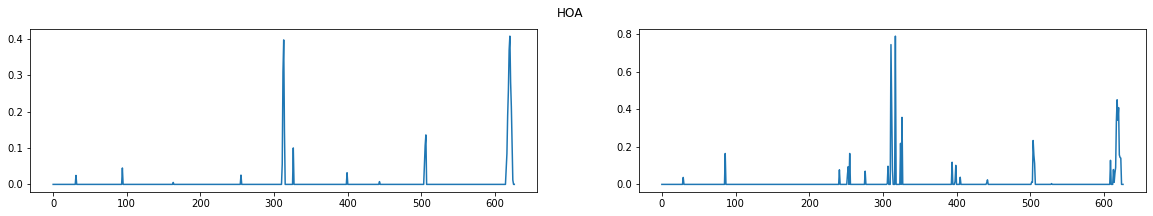

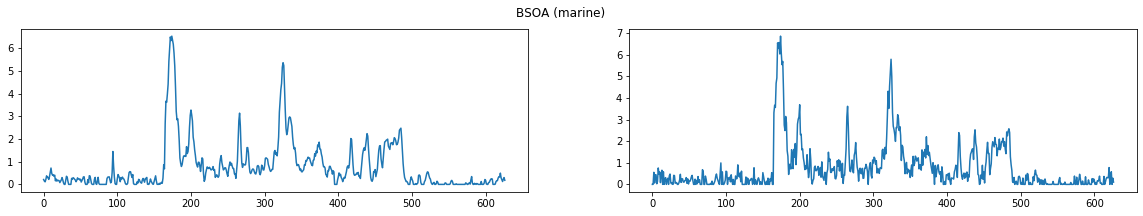

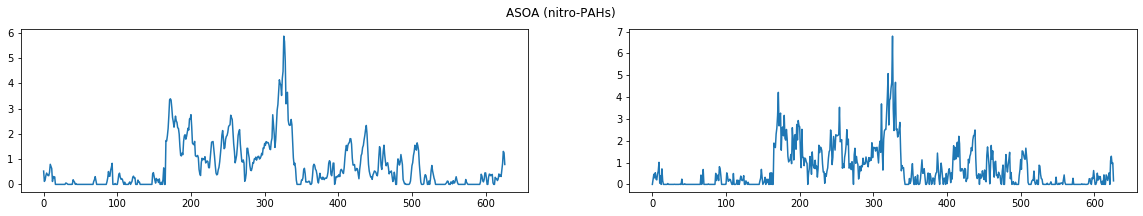

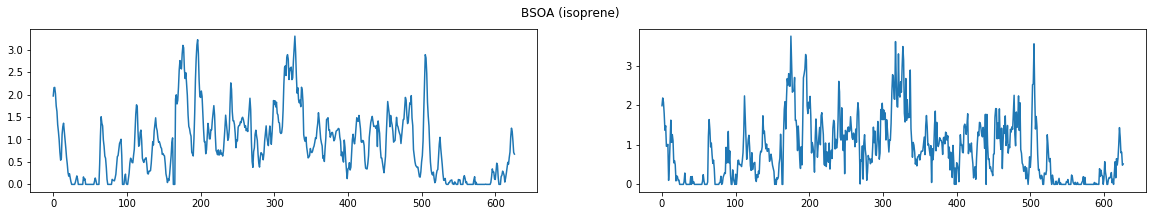

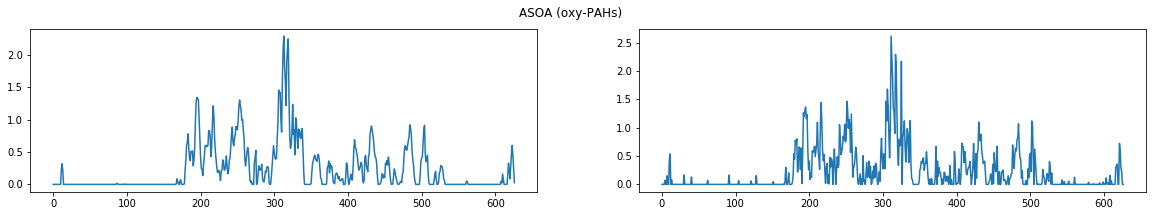

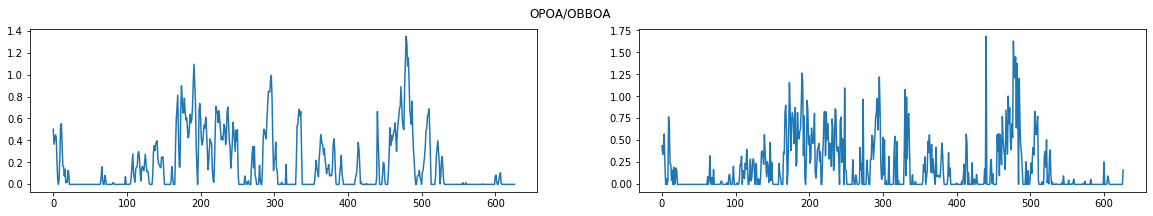

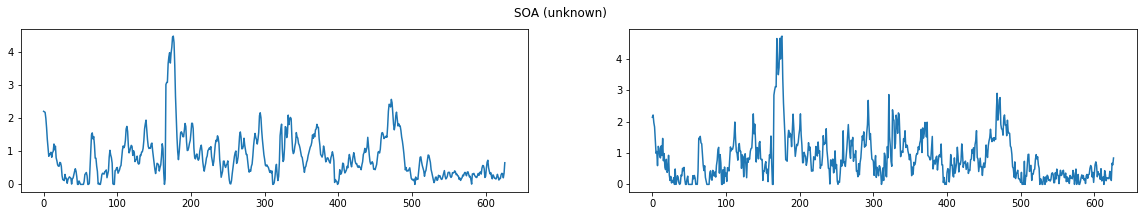

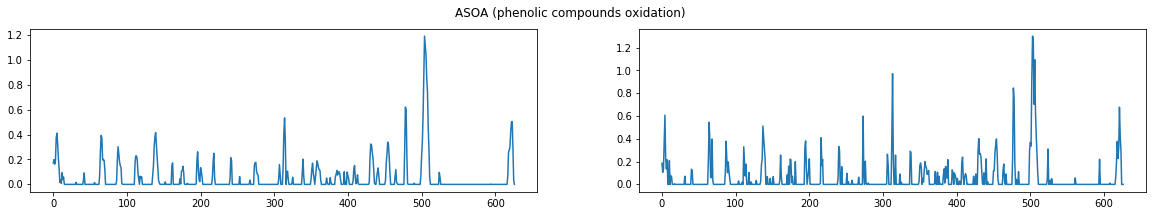

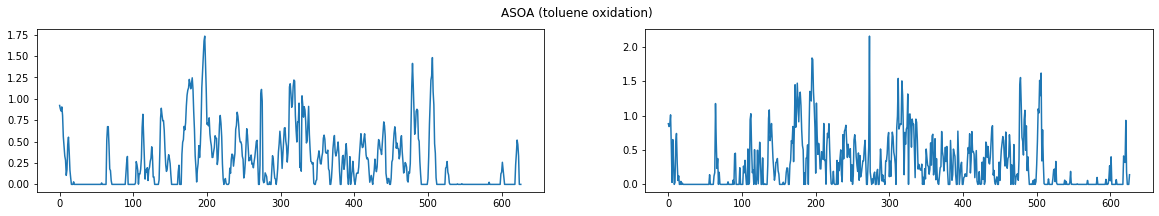

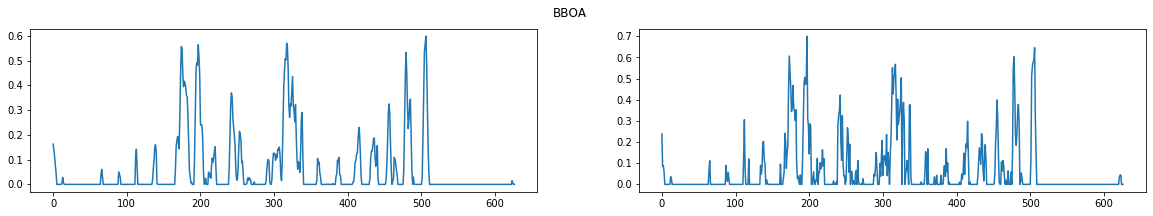

In [19]:
plt.rcParams["figure.figsize"] = (20,3)
for n, prof in enumerate(pro):
    fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.size(7,10)
    fig.suptitle(prof)
    ax1.plot(contirubtion[n])
    ax2.plot(contirubtion1[n])
    plt.show()

# IV- Effet de l'approche time series entre 2018-01-01 et 2018-01-31

In [20]:
start_date = '2018-01-01'
end_date = '2018-01-31'
sql = f"""SELECT to_char(date, 'YYYY-MM-DD HH24:00:00') FROM(SELECT date FROM public.data_receptor 
          WHERE date>='{start_date}' AND date<='{end_date}' GROUP BY 1 ORDER BY 1) AS foo;"""
connection = psycopg2.connect(user = USER, password = PASSWORD, host = HOSTNAME, port = PORT, database = DATABASE)
df_dates = sqlio.read_sql_query(sql, connection)
connection.close()
dates = df_dates.T.values[0]

In [21]:
df = pd.read_excel('pmf_profiles.xlsx')

df.drop(columns=['Unnamed: 0'], inplace=True)
df.rename(columns={'Unnamed: 1': 'amus'}, inplace=True)
pro = df.columns[1:]

In [22]:
pro

Index(['HOA', 'BSOA (marine)', 'ASOA (nitro-PAHs)', 'BSOA (isoprene)',
       'ASOA (oxy-PAHs)', 'OPOA/OBBOA', 'SOA (unknown)',
       'ASOA (phenolic compounds oxidation)', 'ASOA (toluene oxidation)',
       'BBOA'],
      dtype='object')

In [23]:
contirubtion = [[] for i in pro]
for i in dates[3:]:    
    date = i
    date_be = (datetime.strptime(date, '%Y-%m-%d %H:%M:%S')-timedelta(hours=1)).strftime('%Y-%m-%d %H:%M:%S')
    date_bee = (datetime.strptime(date, '%Y-%m-%d %H:%M:%S')-timedelta(hours=2)).strftime('%Y-%m-%d %H:%M:%S')
    sql = f"""SELECT * FROM public.data_receptor where date = '{date}' 
    or date = '{date_be}' or date = '{date_bee}'
    order by mass;"""
    connection = psycopg2.connect(user = USER, password = PASSWORD, host = HOSTNAME, port = PORT, database = DATABASE)
    df_receptor_data = sqlio.read_sql_query(sql, connection)
    connection.close()
    df_receptor_data = df_receptor_data[df_receptor_data.columns]
    cor = df.merge(df_receptor_data, left_on='amus', right_on='mass').drop(columns=['mass', 'amus'])


    X_train = cor[pro].values
    y_train = cor['value'].values.reshape(-1,1)

    alpha = 0.0001
    lasso = Lasso(fit_intercept=False, alpha=alpha, positive=True)     # We train without intercept and we shoose to have only positive values
    lasso.fit(X_train, y_train)                                        #training the algorithm  
    print(date)
    for n, prof in enumerate(pro):
        contirubtion[n].append(lasso.coef_[n])

2018-01-05 15:00:00
2018-01-05 16:00:00
2018-01-05 17:00:00
2018-01-05 18:00:00
2018-01-05 19:00:00
2018-01-05 20:00:00
2018-01-05 21:00:00
2018-01-05 22:00:00
2018-01-05 23:00:00
2018-01-06 00:00:00
2018-01-06 01:00:00
2018-01-06 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.522186429340799e-05, tolerance: 3.990976054558532e-05
  positive)


2018-01-06 03:00:00
2018-01-06 04:00:00
2018-01-06 05:00:00
2018-01-06 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.138862880705355e-05, tolerance: 2.3169629287191103e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.759469929063162e-05, tolerance: 2.3249502435836524e-05
  positive)


2018-01-06 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.805881737481553e-05, tolerance: 3.182601389836483e-05
  positive)


2018-01-06 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.056306855919223e-05, tolerance: 4.458757159335377e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001237157940875283, tolerance: 5.448477541637766e-05
  positive)


2018-01-06 09:00:00
2018-01-06 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010425661271315414, tolerance: 5.547465348755334e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010408131880847073, tolerance: 5.632046912136293e-05
  positive)


2018-01-06 11:00:00
2018-01-06 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00014676573144836204, tolerance: 6.37176616273237e-05
  positive)


2018-01-06 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00015475126227317698, tolerance: 7.585333558423955e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00011910235662118338, tolerance: 9.51118598559146e-05
  positive)


2018-01-06 14:00:00
2018-01-06 15:00:00
2018-01-06 16:00:00
2018-01-06 17:00:00
2018-01-06 18:00:00
2018-01-06 19:00:00
2018-01-06 20:00:00
2018-01-06 21:00:00
2018-01-06 22:00:00
2018-01-06 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002505258820266736, tolerance: 0.00021238140530555478
  positive)


2018-01-07 00:00:00
2018-01-07 01:00:00
2018-01-07 02:00:00
2018-01-07 03:00:00
2018-01-07 04:00:00
2018-01-07 05:00:00
2018-01-07 06:00:00
2018-01-07 07:00:00
2018-01-07 08:00:00
2018-01-07 09:00:00
2018-01-07 10:00:00
2018-01-07 11:00:00
2018-01-07 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.091821325441299e-05, tolerance: 6.258326935186443e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.623363225623715e-05, tolerance: 5.2861240476286224e-05
  positive)


2018-01-07 13:00:00
2018-01-07 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.653432500855529e-05, tolerance: 4.715378297732336e-05
  positive)


2018-01-07 15:00:00
2018-01-07 16:00:00
2018-01-07 17:00:00
2018-01-07 18:00:00
2018-01-07 19:00:00
2018-01-07 20:00:00
2018-01-07 21:00:00
2018-01-07 22:00:00
2018-01-07 23:00:00
2018-01-08 00:00:00
2018-01-08 01:00:00
2018-01-08 02:00:00
2018-01-08 03:00:00
2018-01-08 04:00:00
2018-01-08 05:00:00
2018-01-08 06:00:00
2018-01-08 07:00:00
2018-01-08 08:00:00
2018-01-08 09:00:00
2018-01-08 10:00:00
2018-01-08 11:00:00
2018-01-08 12:00:00
2018-01-08 13:00:00
2018-01-08 14:00:00
2018-01-08 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003086872037194703, tolerance: 0.0002255996861379301
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002661189791349598, tolerance: 0.00022412655953286633
  positive)


2018-01-08 16:00:00
2018-01-08 17:00:00
2018-01-08 18:00:00
2018-01-08 19:00:00
2018-01-08 20:00:00
2018-01-08 21:00:00
2018-01-08 22:00:00
2018-01-08 23:00:00
2018-01-09 00:00:00
2018-01-09 01:00:00
2018-01-09 02:00:00
2018-01-09 03:00:00
2018-01-09 04:00:00
2018-01-09 05:00:00
2018-01-09 06:00:00
2018-01-09 07:00:00
2018-01-09 08:00:00
2018-01-09 09:00:00
2018-01-09 10:00:00
2018-01-09 11:00:00
2018-01-09 12:00:00
2018-01-09 13:00:00
2018-01-09 14:00:00
2018-01-09 15:00:00
2018-01-09 16:00:00
2018-01-09 17:00:00
2018-01-09 18:00:00
2018-01-09 19:00:00
2018-01-09 20:00:00
2018-01-09 21:00:00
2018-01-09 22:00:00
2018-01-09 23:00:00
2018-01-10 00:00:00
2018-01-10 01:00:00
2018-01-10 02:00:00
2018-01-10 03:00:00
2018-01-10 04:00:00
2018-01-10 05:00:00
2018-01-10 06:00:00
2018-01-10 07:00:00
2018-01-10 08:00:00
2018-01-10 09:00:00
2018-01-10 10:00:00
2018-01-10 11:00:00
2018-01-10 12:00:00
2018-01-10 13:00:00
2018-01-10 14:00:00
2018-01-10 15:00:00
2018-01-10 16:00:00
2018-01-10 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.94371181370404e-06, tolerance: 5.977624039562326e-06
  positive)


2018-01-15 21:00:00
2018-01-15 22:00:00
2018-01-15 23:00:00
2018-01-16 00:00:00
2018-01-16 01:00:00
2018-01-16 02:00:00
2018-01-16 03:00:00
2018-01-16 04:00:00
2018-01-16 05:00:00
2018-01-16 06:00:00
2018-01-16 07:00:00
2018-01-16 08:00:00
2018-01-16 09:00:00
2018-01-16 10:00:00
2018-01-16 11:00:00
2018-01-16 12:00:00
2018-01-16 13:00:00
2018-01-16 14:00:00
2018-01-16 15:00:00
2018-01-16 16:00:00
2018-01-16 17:00:00
2018-01-16 18:00:00
2018-01-16 19:00:00
2018-01-16 20:00:00
2018-01-16 21:00:00
2018-01-16 22:00:00
2018-01-16 23:00:00
2018-01-17 00:00:00
2018-01-17 01:00:00
2018-01-17 02:00:00
2018-01-17 03:00:00
2018-01-17 04:00:00
2018-01-17 05:00:00
2018-01-17 06:00:00
2018-01-17 07:00:00
2018-01-17 08:00:00
2018-01-17 09:00:00
2018-01-17 10:00:00
2018-01-17 11:00:00
2018-01-17 12:00:00
2018-01-17 13:00:00
2018-01-17 14:00:00
2018-01-17 15:00:00
2018-01-17 16:00:00
2018-01-17 17:00:00
2018-01-17 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.240810016278382e-06, tolerance: 5.512317278138197e-06
  positive)


2018-01-17 19:00:00
2018-01-17 20:00:00
2018-01-17 21:00:00
2018-01-17 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.137612987881954e-05, tolerance: 1.93079569178298e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9850398114359316e-05, tolerance: 2.3036052435256147e-05
  positive)


2018-01-17 23:00:00
2018-01-18 00:00:00
2018-01-18 01:00:00
2018-01-18 02:00:00
2018-01-18 03:00:00
2018-01-18 04:00:00
2018-01-18 05:00:00
2018-01-18 06:00:00
2018-01-18 07:00:00
2018-01-18 08:00:00
2018-01-18 09:00:00
2018-01-18 10:00:00
2018-01-18 11:00:00
2018-01-18 12:00:00
2018-01-18 13:00:00
2018-01-18 14:00:00
2018-01-18 15:00:00
2018-01-18 16:00:00
2018-01-18 17:00:00
2018-01-18 18:00:00
2018-01-18 19:00:00
2018-01-18 20:00:00
2018-01-18 21:00:00
2018-01-18 22:00:00
2018-01-18 23:00:00
2018-01-19 00:00:00
2018-01-19 01:00:00
2018-01-19 02:00:00
2018-01-19 03:00:00
2018-01-19 04:00:00
2018-01-19 05:00:00
2018-01-19 06:00:00
2018-01-19 07:00:00
2018-01-19 08:00:00
2018-01-19 09:00:00
2018-01-19 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6860255413940484e-05, tolerance: 1.3817758693747353e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.326299982231001e-05, tolerance: 1.2075189973097532e-05
  positive)


2018-01-19 11:00:00
2018-01-19 12:00:00
2018-01-19 13:00:00
2018-01-19 14:00:00
2018-01-19 15:00:00
2018-01-19 16:00:00
2018-01-19 17:00:00
2018-01-19 18:00:00
2018-01-19 19:00:00
2018-01-19 20:00:00
2018-01-19 21:00:00
2018-01-19 22:00:00
2018-01-19 23:00:00
2018-01-20 00:00:00
2018-01-20 01:00:00
2018-01-20 02:00:00
2018-01-20 03:00:00
2018-01-20 04:00:00
2018-01-20 05:00:00
2018-01-20 06:00:00
2018-01-20 07:00:00
2018-01-20 08:00:00
2018-01-20 09:00:00
2018-01-20 10:00:00
2018-01-20 11:00:00
2018-01-20 12:00:00
2018-01-20 13:00:00
2018-01-20 14:00:00
2018-01-20 15:00:00
2018-01-20 16:00:00
2018-01-20 17:00:00
2018-01-20 18:00:00
2018-01-20 19:00:00
2018-01-20 20:00:00
2018-01-20 21:00:00
2018-01-20 22:00:00
2018-01-20 23:00:00
2018-01-21 00:00:00
2018-01-21 01:00:00
2018-01-21 02:00:00
2018-01-21 03:00:00
2018-01-21 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.32672073780948e-05, tolerance: 2.5295625232480848e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.550717950858139e-05, tolerance: 2.8903532442569236e-05
  positive)


2018-01-21 05:00:00
2018-01-21 06:00:00
2018-01-21 07:00:00
2018-01-21 08:00:00
2018-01-21 09:00:00
2018-01-21 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00016699407692069568, tolerance: 0.00012110539831710302
  positive)


2018-01-21 11:00:00
2018-01-21 12:00:00
2018-01-21 13:00:00
2018-01-21 14:00:00
2018-01-21 15:00:00
2018-01-21 16:00:00
2018-01-21 17:00:00
2018-01-21 18:00:00
2018-01-21 19:00:00
2018-01-21 20:00:00
2018-01-21 21:00:00
2018-01-21 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.503861144823692e-05, tolerance: 2.3948351321582288e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1527453756116366e-05, tolerance: 1.5496350274089368e-05
  positive)


2018-01-21 23:00:00
2018-01-22 00:00:00
2018-01-22 01:00:00
2018-01-22 02:00:00
2018-01-22 03:00:00
2018-01-22 04:00:00
2018-01-22 05:00:00
2018-01-22 06:00:00
2018-01-22 07:00:00
2018-01-22 08:00:00
2018-01-22 09:00:00
2018-01-22 10:00:00
2018-01-22 11:00:00
2018-01-22 12:00:00
2018-01-22 13:00:00
2018-01-22 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5771092919039604e-05, tolerance: 1.3352410457635064e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9330338476451422e-05, tolerance: 1.8498473564502613e-05
  positive)


2018-01-22 15:00:00
2018-01-22 16:00:00
2018-01-22 17:00:00
2018-01-22 18:00:00
2018-01-22 19:00:00
2018-01-22 20:00:00
2018-01-22 21:00:00
2018-01-22 22:00:00
2018-01-22 23:00:00
2018-01-23 00:00:00
2018-01-23 01:00:00
2018-01-23 02:00:00
2018-01-23 03:00:00
2018-01-23 04:00:00
2018-01-23 05:00:00
2018-01-23 06:00:00
2018-01-23 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.260260941836406e-05, tolerance: 6.957749261180051e-05
  positive)


2018-01-23 08:00:00
2018-01-23 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002786782501368948, tolerance: 0.00012216155476808496
  positive)


2018-01-23 10:00:00
2018-01-23 11:00:00
2018-01-23 12:00:00
2018-01-23 13:00:00
2018-01-23 14:00:00
2018-01-23 15:00:00
2018-01-23 16:00:00
2018-01-23 17:00:00
2018-01-23 18:00:00
2018-01-23 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00012369394603557998, tolerance: 0.00011392589083723299
  positive)


2018-01-23 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00016864135461237134, tolerance: 9.759388762489546e-05
  positive)


2018-01-23 21:00:00
2018-01-23 22:00:00
2018-01-23 23:00:00
2018-01-24 00:00:00
2018-01-24 01:00:00
2018-01-24 02:00:00
2018-01-24 03:00:00
2018-01-24 04:00:00
2018-01-24 05:00:00
2018-01-24 06:00:00
2018-01-24 07:00:00
2018-01-24 08:00:00
2018-01-24 09:00:00
2018-01-24 10:00:00
2018-01-24 11:00:00
2018-01-24 12:00:00
2018-01-24 13:00:00
2018-01-24 14:00:00
2018-01-24 15:00:00
2018-01-24 16:00:00
2018-01-24 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010127522681914036, tolerance: 4.5350728785365306e-05
  positive)


2018-01-24 18:00:00
2018-01-24 19:00:00
2018-01-24 20:00:00
2018-01-24 21:00:00
2018-01-24 22:00:00
2018-01-24 23:00:00
2018-01-25 00:00:00
2018-01-25 01:00:00
2018-01-25 02:00:00
2018-01-25 03:00:00
2018-01-25 04:00:00
2018-01-25 05:00:00
2018-01-25 06:00:00
2018-01-25 07:00:00
2018-01-25 08:00:00
2018-01-25 09:00:00
2018-01-25 10:00:00
2018-01-25 11:00:00
2018-01-25 12:00:00
2018-01-25 13:00:00
2018-01-25 14:00:00
2018-01-25 15:00:00
2018-01-25 16:00:00
2018-01-25 17:00:00
2018-01-25 18:00:00
2018-01-25 19:00:00
2018-01-25 20:00:00
2018-01-25 21:00:00
2018-01-25 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.499865749291146e-05, tolerance: 8.872219183955106e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00017820118074870703, tolerance: 8.42911301853337e-05
  positive)


2018-01-25 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00012547771416041888, tolerance: 8.110899545102097e-05
  positive)


2018-01-26 00:00:00
2018-01-26 01:00:00
2018-01-26 02:00:00
2018-01-26 03:00:00
2018-01-26 04:00:00
2018-01-26 05:00:00
2018-01-26 06:00:00
2018-01-26 07:00:00
2018-01-26 08:00:00
2018-01-26 09:00:00
2018-01-26 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00013297163605130793, tolerance: 8.653171886946149e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00014377462048159942, tolerance: 6.304880358051872e-05
  positive)


2018-01-26 11:00:00
2018-01-26 12:00:00
2018-01-26 13:00:00
2018-01-26 14:00:00
2018-01-26 15:00:00
2018-01-26 16:00:00
2018-01-26 17:00:00
2018-01-26 18:00:00
2018-01-26 19:00:00
2018-01-26 20:00:00
2018-01-26 21:00:00
2018-01-26 22:00:00
2018-01-26 23:00:00
2018-01-27 00:00:00
2018-01-27 01:00:00
2018-01-27 02:00:00
2018-01-27 03:00:00
2018-01-27 04:00:00
2018-01-27 05:00:00
2018-01-27 06:00:00
2018-01-27 07:00:00
2018-01-27 08:00:00
2018-01-27 09:00:00
2018-01-27 10:00:00
2018-01-27 11:00:00
2018-01-27 12:00:00
2018-01-27 13:00:00
2018-01-27 14:00:00
2018-01-27 15:00:00
2018-01-27 16:00:00
2018-01-27 17:00:00
2018-01-27 18:00:00
2018-01-27 19:00:00
2018-01-27 20:00:00
2018-01-27 21:00:00
2018-01-27 22:00:00
2018-01-27 23:00:00
2018-01-28 00:00:00
2018-01-28 01:00:00
2018-01-28 02:00:00
2018-01-28 03:00:00
2018-01-28 04:00:00
2018-01-28 05:00:00
2018-01-28 06:00:00
2018-01-28 07:00:00
2018-01-28 08:00:00
2018-01-28 09:00:00
2018-01-28 10:00:00
2018-01-28 11:00:00
2018-01-28 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00013631972976388407, tolerance: 0.00013426514254486846
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00013442687384511258, tolerance: 0.0001076801010996656
  positive)


2018-01-28 15:00:00
2018-01-28 16:00:00
2018-01-28 17:00:00
2018-01-28 18:00:00
2018-01-28 19:00:00
2018-01-28 20:00:00
2018-01-28 21:00:00
2018-01-28 22:00:00
2018-01-28 23:00:00
2018-01-29 00:00:00
2018-01-29 01:00:00
2018-01-29 02:00:00
2018-01-29 03:00:00
2018-01-29 04:00:00
2018-01-29 05:00:00
2018-01-29 06:00:00
2018-01-29 07:00:00
2018-01-29 08:00:00
2018-01-29 09:00:00
2018-01-29 10:00:00
2018-01-29 11:00:00
2018-01-29 12:00:00
2018-01-29 13:00:00
2018-01-29 14:00:00
2018-01-29 15:00:00
2018-01-29 16:00:00
2018-01-29 17:00:00
2018-01-29 18:00:00
2018-01-29 19:00:00
2018-01-29 20:00:00
2018-01-29 21:00:00
2018-01-29 22:00:00
2018-01-29 23:00:00
2018-01-30 00:00:00
2018-01-30 01:00:00
2018-01-30 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001482905275345791, tolerance: 7.469029540212391e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00011892127355638688, tolerance: 6.840712309313326e-05
  positive)


2018-01-30 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.799569218449725e-05, tolerance: 6.48304199528857e-05
  positive)


2018-01-30 04:00:00
2018-01-30 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00012335690862701199, tolerance: 7.274513304144719e-05
  positive)


2018-01-30 06:00:00
2018-01-30 07:00:00
2018-01-30 08:00:00
2018-01-30 09:00:00
2018-01-30 10:00:00
2018-01-30 11:00:00
2018-01-30 12:00:00
2018-01-30 13:00:00
2018-01-30 14:00:00
2018-01-30 15:00:00
2018-01-30 16:00:00
2018-01-30 17:00:00
2018-01-30 18:00:00
2018-01-30 19:00:00
2018-01-30 20:00:00
2018-01-30 21:00:00
2018-01-30 22:00:00
2018-01-30 23:00:00
2018-01-31 00:00:00


In [24]:
contirubtion1 = [[] for i in pro]
for i in dates[3:]:    
    date = i
    date_be = (datetime.strptime(date, '%Y-%m-%d %H:%M:%S')-timedelta(hours=1)).strftime('%Y-%m-%d %H:%M:%S')
    date_bee = (datetime.strptime(date, '%Y-%m-%d %H:%M:%S')-timedelta(hours=2)).strftime('%Y-%m-%d %H:%M:%S')
    sql = f"""SELECT * FROM public.data_receptor where date = '{date}' 
    order by mass;"""
    connection = psycopg2.connect(user = USER, password = PASSWORD, host = HOSTNAME, port = PORT, database = DATABASE)
    df_receptor_data = sqlio.read_sql_query(sql, connection)
    connection.close()
    df_receptor_data = df_receptor_data[df_receptor_data.columns]
    cor = df.merge(df_receptor_data, left_on='amus', right_on='mass').drop(columns=['mass', 'amus'])


    X_train = cor[pro].values
    y_train = cor['value'].values.reshape(-1,1)

    alpha = 0.0001
    lasso = Lasso(fit_intercept=False, alpha=alpha, positive=True)     # We train without intercept and we shoose to have only positive values
    lasso.fit(X_train, y_train)                                        #training the algorithm  
    print(date)
    for n, prof in enumerate(pro):
        contirubtion1[n].append(lasso.coef_[n])

2018-01-05 15:00:00
2018-01-05 16:00:00
2018-01-05 17:00:00
2018-01-05 18:00:00
2018-01-05 19:00:00
2018-01-05 20:00:00
2018-01-05 21:00:00
2018-01-05 22:00:00
2018-01-05 23:00:00
2018-01-06 00:00:00
2018-01-06 01:00:00
2018-01-06 02:00:00
2018-01-06 03:00:00
2018-01-06 04:00:00
2018-01-06 05:00:00
2018-01-06 06:00:00
2018-01-06 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.110407394261018e-05, tolerance: 1.6018806957852205e-05
  positive)


2018-01-06 08:00:00
2018-01-06 09:00:00

C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.765554714199766e-05, tolerance: 1.7587944022903183e-05
  positive)



2018-01-06 10:00:00
2018-01-06 11:00:00

C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.2484406483759814e-05, tolerance: 2.172384006943185e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.90417630176718e-05, tolerance: 2.498513652886396e-05
  positive)



2018-01-06 12:00:00
2018-01-06 13:00:00
2018-01-06 14:00:00
2018-01-06 15:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.57568420045133e-05, tolerance: 4.0982364341106894e-05
  positive)


2018-01-06 16:00:00
2018-01-06 17:00:00
2018-01-06 18:00:00
2018-01-06 19:00:00
2018-01-06 20:00:00
2018-01-06 21:00:00
2018-01-06 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001598191390663065, tolerance: 7.185073840572117e-05
  positive)


2018-01-06 23:00:00
2018-01-07 00:00:00
2018-01-07 01:00:00
2018-01-07 02:00:00
2018-01-07 03:00:00
2018-01-07 04:00:00
2018-01-07 05:00:00
2018-01-07 06:00:00
2018-01-07 07:00:00
2018-01-07 08:00:00
2018-01-07 09:00:00
2018-01-07 10:00:00
2018-01-07 11:00:00
2018-01-07 12:00:00
2018-01-07 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3258490270557644e-05, tolerance: 1.7300666137577347e-05
  positive)


2018-01-07 14:00:00
2018-01-07 15:00:00
2018-01-07 16:00:00
2018-01-07 17:00:00
2018-01-07 18:00:00
2018-01-07 19:00:00
2018-01-07 20:00:00
2018-01-07 21:00:00
2018-01-07 22:00:00
2018-01-07 23:00:00
2018-01-08 00:00:00
2018-01-08 01:00:00
2018-01-08 02:00:00
2018-01-08 03:00:00
2018-01-08 04:00:00
2018-01-08 05:00:00
2018-01-08 06:00:00
2018-01-08 07:00:00
2018-01-08 08:00:00
2018-01-08 09:00:00
2018-01-08 10:00:00
2018-01-08 11:00:00
2018-01-08 12:00:00
2018-01-08 13:00:00
2018-01-08 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010467484639711463, tolerance: 7.872512405689967e-05
  positive)


2018-01-08 15:00:00
2018-01-08 16:00:00
2018-01-08 17:00:00
2018-01-08 18:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00013727142779643283, tolerance: 8.630568650454879e-05
  positive)


2018-01-08 19:00:00
2018-01-08 20:00:00
2018-01-08 21:00:00
2018-01-08 22:00:00
2018-01-08 23:00:00
2018-01-09 00:00:00
2018-01-09 01:00:00
2018-01-09 02:00:00
2018-01-09 03:00:00
2018-01-09 04:00:00
2018-01-09 05:00:00
2018-01-09 06:00:00
2018-01-09 07:00:00
2018-01-09 08:00:00
2018-01-09 09:00:00
2018-01-09 10:00:00
2018-01-09 11:00:00
2018-01-09 12:00:00
2018-01-09 13:00:00
2018-01-09 14:00:00
2018-01-09 15:00:00
2018-01-09 16:00:00
2018-01-09 17:00:00
2018-01-09 18:00:00
2018-01-09 19:00:00
2018-01-09 20:00:00
2018-01-09 21:00:00
2018-01-09 22:00:00
2018-01-09 23:00:00
2018-01-10 00:00:00
2018-01-10 01:00:00
2018-01-10 02:00:00
2018-01-10 03:00:00
2018-01-10 04:00:00
2018-01-10 05:00:00
2018-01-10 06:00:00
2018-01-10 07:00:00
2018-01-10 08:00:00
2018-01-10 09:00:00
2018-01-10 10:00:00
2018-01-10 11:00:00
2018-01-10 12:00:00
2018-01-10 13:00:00
2018-01-10 14:00:00
2018-01-10 15:00:00
2018-01-10 16:00:00
2018-01-10 17:00:00
2018-01-10 18:00:00
2018-01-10 19:00:00
2018-01-10 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8404936057438018e-05, tolerance: 1.6585140651364112e-05
  positive)


2018-01-11 15:00:00
2018-01-11 16:00:00
2018-01-11 17:00:00
2018-01-11 18:00:00
2018-01-11 19:00:00
2018-01-11 20:00:00
2018-01-11 21:00:00
2018-01-11 22:00:00
2018-01-11 23:00:00
2018-01-12 00:00:00
2018-01-12 01:00:00
2018-01-12 02:00:00
2018-01-12 03:00:00
2018-01-12 04:00:00
2018-01-12 05:00:00
2018-01-12 06:00:00
2018-01-12 07:00:00
2018-01-12 08:00:00
2018-01-12 09:00:00
2018-01-12 10:00:00
2018-01-12 11:00:00
2018-01-12 12:00:00
2018-01-12 13:00:00
2018-01-12 14:00:00
2018-01-12 15:00:00
2018-01-12 16:00:00
2018-01-12 17:00:00
2018-01-12 18:00:00
2018-01-12 19:00:00
2018-01-12 20:00:00
2018-01-12 21:00:00
2018-01-12 22:00:00
2018-01-12 23:00:00
2018-01-13 00:00:00
2018-01-13 01:00:00
2018-01-13 02:00:00
2018-01-13 03:00:00
2018-01-13 04:00:00
2018-01-13 05:00:00
2018-01-13 06:00:00
2018-01-13 07:00:00
2018-01-13 08:00:00
2018-01-13 09:00:00
2018-01-13 10:00:00
2018-01-13 11:00:00
2018-01-13 12:00:00
2018-01-13 13:00:00
2018-01-13 14:00:00
2018-01-13 15:00:00
2018-01-13 16:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2706391046498076e-06, tolerance: 2.1769005717773682e-06
  positive)


2018-01-17 10:00:00
2018-01-17 11:00:00
2018-01-17 12:00:00
2018-01-17 13:00:00
2018-01-17 14:00:00
2018-01-17 15:00:00
2018-01-17 16:00:00
2018-01-17 17:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8857240240779689e-06, tolerance: 1.6880500530232743e-06
  positive)


2018-01-17 18:00:00
2018-01-17 19:00:00
2018-01-17 20:00:00
2018-01-17 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9885447811618384e-05, tolerance: 9.951971162670417e-06
  positive)


2018-01-17 22:00:00
2018-01-17 23:00:00
2018-01-18 00:00:00
2018-01-18 01:00:00
2018-01-18 02:00:00
2018-01-18 03:00:00
2018-01-18 04:00:00
2018-01-18 05:00:00
2018-01-18 06:00:00
2018-01-18 07:00:00
2018-01-18 08:00:00
2018-01-18 09:00:00
2018-01-18 10:00:00
2018-01-18 11:00:00
2018-01-18 12:00:00
2018-01-18 13:00:00
2018-01-18 14:00:00
2018-01-18 15:00:00
2018-01-18 16:00:00
2018-01-18 17:00:00
2018-01-18 18:00:00
2018-01-18 19:00:00
2018-01-18 20:00:00
2018-01-18 21:00:00
2018-01-18 22:00:00
2018-01-18 23:00:00
2018-01-19 00:00:00
2018-01-19 01:00:00
2018-01-19 02:00:00
2018-01-19 03:00:00
2018-01-19 04:00:00
2018-01-19 05:00:00
2018-01-19 06:00:00
2018-01-19 07:00:00
2018-01-19 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7755234352349586e-06, tolerance: 2.855850537146676e-06
  positive)


2018-01-19 09:00:00
2018-01-19 10:00:00
2018-01-19 11:00:00
2018-01-19 12:00:00
2018-01-19 13:00:00
2018-01-19 14:00:00
2018-01-19 15:00:00
2018-01-19 16:00:00
2018-01-19 17:00:00
2018-01-19 18:00:00
2018-01-19 19:00:00
2018-01-19 20:00:00
2018-01-19 21:00:00
2018-01-19 22:00:00
2018-01-19 23:00:00
2018-01-20 00:00:00
2018-01-20 01:00:00
2018-01-20 02:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2523218471359507e-05, tolerance: 2.296555689620865e-05
  positive)


2018-01-20 03:00:00
2018-01-20 04:00:00
2018-01-20 05:00:00
2018-01-20 06:00:00
2018-01-20 07:00:00
2018-01-20 08:00:00
2018-01-20 09:00:00
2018-01-20 10:00:00
2018-01-20 11:00:00
2018-01-20 12:00:00
2018-01-20 13:00:00
2018-01-20 14:00:00
2018-01-20 15:00:00
2018-01-20 16:00:00
2018-01-20 17:00:00
2018-01-20 18:00:00
2018-01-20 19:00:00
2018-01-20 20:00:00
2018-01-20 21:00:00
2018-01-20 22:00:00
2018-01-20 23:00:00
2018-01-21 00:00:00
2018-01-21 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1916253162682494e-05, tolerance: 8.246921608933014e-06
  positive)


2018-01-21 02:00:00
2018-01-21 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2927776146499752e-05, tolerance: 7.751282988936628e-06
  positive)


2018-01-21 04:00:00
2018-01-21 05:00:00
2018-01-21 06:00:00
2018-01-21 07:00:00
2018-01-21 08:00:00
2018-01-21 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001217531931873659, tolerance: 5.105189774850445e-05
  positive)


2018-01-21 10:00:00
2018-01-21 11:00:00
2018-01-21 12:00:00
2018-01-21 13:00:00
2018-01-21 14:00:00
2018-01-21 15:00:00
2018-01-21 16:00:00
2018-01-21 17:00:00
2018-01-21 18:00:00
2018-01-21 19:00:00
2018-01-21 20:00:00
2018-01-21 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.529820991356237e-06, tolerance: 5.682625920656213e-06
  positive)


2018-01-21 22:00:00
2018-01-21 23:00:00
2018-01-22 00:00:00
2018-01-22 01:00:00
2018-01-22 02:00:00
2018-01-22 03:00:00
2018-01-22 04:00:00
2018-01-22 05:00:00
2018-01-22 06:00:00
2018-01-22 07:00:00
2018-01-22 08:00:00
2018-01-22 09:00:00
2018-01-22 10:00:00
2018-01-22 11:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0618566248116156e-06, tolerance: 2.674030589511243e-06
  positive)


2018-01-22 12:00:00
2018-01-22 13:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.8674480534400804e-06, tolerance: 5.948052789652675e-06
  positive)


2018-01-22 14:00:00
2018-01-22 15:00:00
2018-01-22 16:00:00
2018-01-22 17:00:00
2018-01-22 18:00:00
2018-01-22 19:00:00
2018-01-22 20:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.640417140517914e-05, tolerance: 1.1013501343863858e-05
  positive)


2018-01-22 21:00:00
2018-01-22 22:00:00
2018-01-22 23:00:00
2018-01-23 00:00:00
2018-01-23 01:00:00
2018-01-23 02:00:00
2018-01-23 03:00:00
2018-01-23 04:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.99446205401576e-06, tolerance: 5.877743212371253e-06
  positive)


2018-01-23 05:00:00
2018-01-23 06:00:00
2018-01-23 07:00:00
2018-01-23 08:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.272603700962793e-05, tolerance: 5.6551311670779064e-05
  positive)


2018-01-23 09:00:00
2018-01-23 10:00:00
2018-01-23 11:00:00
2018-01-23 12:00:00
2018-01-23 13:00:00
2018-01-23 14:00:00
2018-01-23 15:00:00
2018-01-23 16:00:00
2018-01-23 17:00:00
2018-01-23 18:00:00
2018-01-23 19:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.020567800381845e-05, tolerance: 3.711525403693777e-05
  positive)


2018-01-23 20:00:00
2018-01-23 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.8016507069911134e-05, tolerance: 2.483878759241533e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4454752043247263e-05, tolerance: 1.8122828278739856e-05
  positive)


2018-01-23 22:00:00
2018-01-23 23:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1785397228767508e-05, tolerance: 9.105530712556506e-06
  positive)


2018-01-24 00:00:00
2018-01-24 01:00:00
2018-01-24 02:00:00
2018-01-24 03:00:00
2018-01-24 04:00:00
2018-01-24 05:00:00
2018-01-24 06:00:00
2018-01-24 07:00:00
2018-01-24 08:00:00
2018-01-24 09:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4065886518990116e-05, tolerance: 1.3186915778930548e-05
  positive)


2018-01-24 10:00:00
2018-01-24 11:00:00
2018-01-24 12:00:00
2018-01-24 13:00:00
2018-01-24 14:00:00
2018-01-24 15:00:00
2018-01-24 16:00:00
2018-01-24 17:00:00
2018-01-24 18:00:00
2018-01-24 19:00:00
2018-01-24 20:00:00
2018-01-24 21:00:00
2018-01-24 22:00:00
2018-01-24 23:00:00
2018-01-25 00:00:00
2018-01-25 01:00:00
2018-01-25 02:00:00
2018-01-25 03:00:00
2018-01-25 04:00:00
2018-01-25 05:00:00
2018-01-25 06:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0886195169660723e-06, tolerance: 1.6250532913619242e-06
  positive)


2018-01-25 07:00:00
2018-01-25 08:00:00
2018-01-25 09:00:00
2018-01-25 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.944036166872664e-06, tolerance: 4.397458497625829e-06
  positive)


2018-01-25 11:00:00
2018-01-25 12:00:00
2018-01-25 13:00:00
2018-01-25 14:00:00
2018-01-25 15:00:00
2018-01-25 16:00:00
2018-01-25 17:00:00
2018-01-25 18:00:00
2018-01-25 19:00:00
2018-01-25 20:00:00
2018-01-25 21:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4350652142810505e-05, tolerance: 2.9664700629811037e-05
  positive)


2018-01-25 22:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.607870042152068e-05, tolerance: 2.880965741078715e-05
  positive)


2018-01-25 23:00:00
2018-01-26 00:00:00
2018-01-26 01:00:00
2018-01-26 02:00:00
2018-01-26 03:00:00
2018-01-26 04:00:00
2018-01-26 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.475843657369895e-05, tolerance: 6.559915028480082e-05
  positive)


2018-01-26 06:00:00
2018-01-26 07:00:00
2018-01-26 08:00:00
2018-01-26 09:00:00
2018-01-26 10:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.515606085239731e-05, tolerance: 2.0000493152845835e-05
  positive)


2018-01-26 11:00:00
2018-01-26 12:00:00
2018-01-26 13:00:00
2018-01-26 14:00:00
2018-01-26 15:00:00
2018-01-26 16:00:00
2018-01-26 17:00:00
2018-01-26 18:00:00
2018-01-26 19:00:00
2018-01-26 20:00:00
2018-01-26 21:00:00
2018-01-26 22:00:00
2018-01-26 23:00:00
2018-01-27 00:00:00
2018-01-27 01:00:00
2018-01-27 02:00:00
2018-01-27 03:00:00
2018-01-27 04:00:00
2018-01-27 05:00:00
2018-01-27 06:00:00
2018-01-27 07:00:00
2018-01-27 08:00:00
2018-01-27 09:00:00
2018-01-27 10:00:00
2018-01-27 11:00:00
2018-01-27 12:00:00
2018-01-27 13:00:00
2018-01-27 14:00:00
2018-01-27 15:00:00
2018-01-27 16:00:00
2018-01-27 17:00:00
2018-01-27 18:00:00
2018-01-27 19:00:00
2018-01-27 20:00:00
2018-01-27 21:00:00
2018-01-27 22:00:00
2018-01-27 23:00:00
2018-01-28 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00017496033228568035, tolerance: 0.00015578628210542449
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00019538808060673603, tolerance: 0.0001815874684044792
  positive)


2018-01-28 01:00:00
2018-01-28 02:00:00
2018-01-28 03:00:00
2018-01-28 04:00:00
2018-01-28 05:00:00
2018-01-28 06:00:00
2018-01-28 07:00:00
2018-01-28 08:00:00
2018-01-28 09:00:00
2018-01-28 10:00:00
2018-01-28 11:00:00
2018-01-28 12:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.252402562592895e-05, tolerance: 7.097950855768265e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.908273891219008e-05, tolerance: 3.275466826032737e-05
  positive)


2018-01-28 13:00:00
2018-01-28 14:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.672378162506462e-05, tolerance: 4.439446711247979e-05
  positive)


2018-01-28 15:00:00
2018-01-28 16:00:00
2018-01-28 17:00:00
2018-01-28 18:00:00
2018-01-28 19:00:00
2018-01-28 20:00:00
2018-01-28 21:00:00
2018-01-28 22:00:00
2018-01-28 23:00:00
2018-01-29 00:00:00
2018-01-29 01:00:00
2018-01-29 02:00:00
2018-01-29 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.542905142084795e-06, tolerance: 6.7712966445128505e-06
  positive)


2018-01-29 04:00:00
2018-01-29 05:00:00
2018-01-29 06:00:00
2018-01-29 07:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1313347053411391e-05, tolerance: 5.533286819082282e-06
  positive)


2018-01-29 08:00:00
2018-01-29 09:00:00
2018-01-29 10:00:00
2018-01-29 11:00:00
2018-01-29 12:00:00
2018-01-29 13:00:00
2018-01-29 14:00:00
2018-01-29 15:00:00
2018-01-29 16:00:00
2018-01-29 17:00:00
2018-01-29 18:00:00
2018-01-29 19:00:00
2018-01-29 20:00:00
2018-01-29 21:00:00
2018-01-29 22:00:00
2018-01-29 23:00:00
2018-01-30 00:00:00
2018-01-30 01:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.914711998099368e-05, tolerance: 2.6929477464890453e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.843243406526022e-05, tolerance: 2.5318704218556265e-05
  positive)


2018-01-30 02:00:00
2018-01-30 03:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6801774687683242e-05, tolerance: 1.615894140968655e-05
  positive)
C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.223232563732495e-05, tolerance: 2.335277432464288e-05
  positive)


2018-01-30 04:00:00
2018-01-30 05:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.76927774163642e-05, tolerance: 3.323341730711777e-05
  positive)


2018-01-30 06:00:00
2018-01-30 07:00:00
2018-01-30 08:00:00
2018-01-30 09:00:00
2018-01-30 10:00:00
2018-01-30 11:00:00
2018-01-30 12:00:00
2018-01-30 13:00:00
2018-01-30 14:00:00
2018-01-30 15:00:00
2018-01-30 16:00:00
2018-01-30 17:00:00
2018-01-30 18:00:00
2018-01-30 19:00:00
2018-01-30 20:00:00
2018-01-30 21:00:00
2018-01-30 22:00:00
2018-01-30 23:00:00
2018-01-31 00:00:00


C:\Users\alahssini\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.128503896656287e-05, tolerance: 2.2027659238615914e-05
  positive)


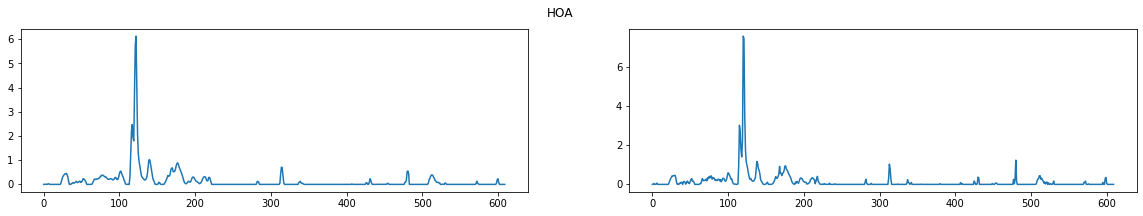

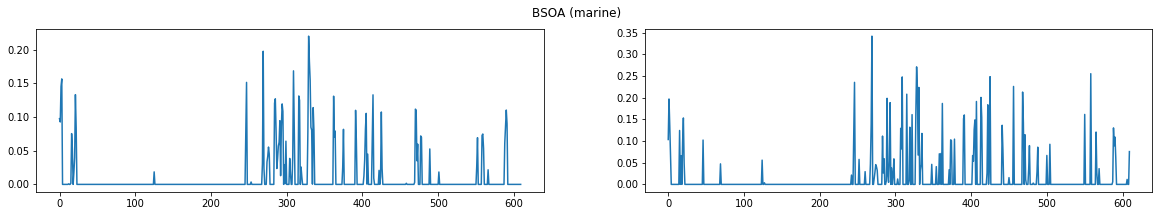

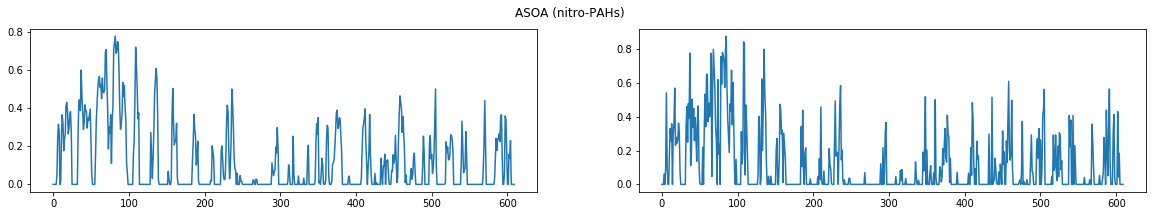

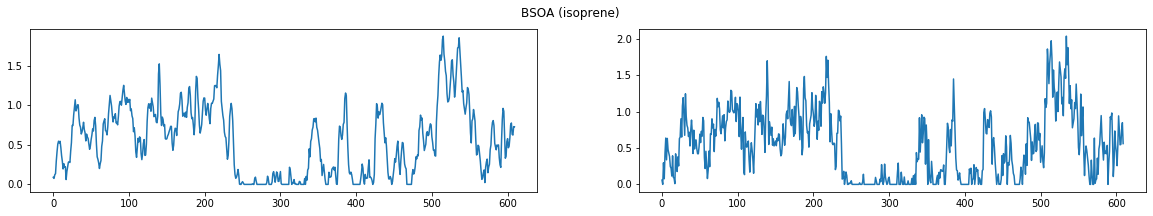

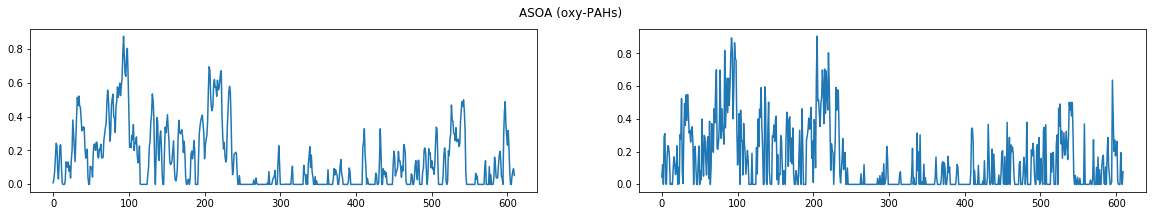

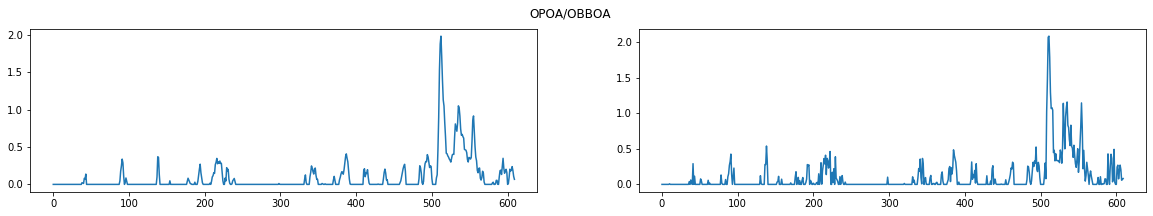

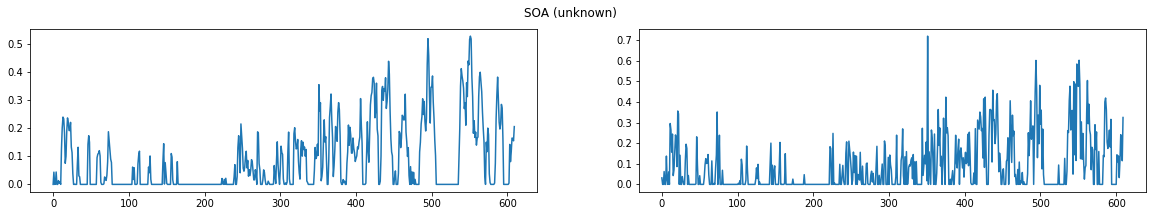

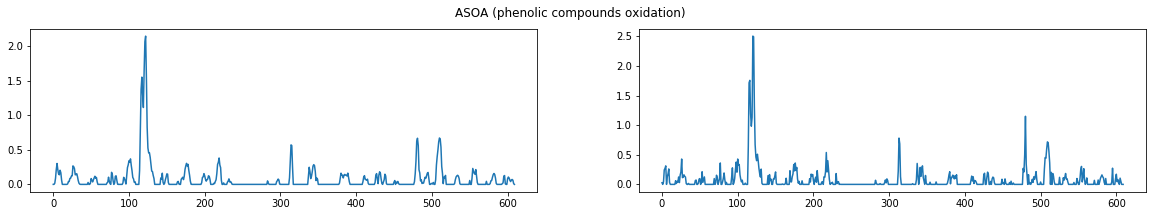

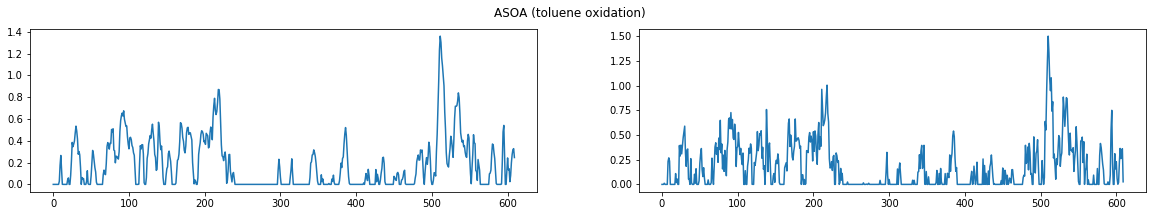

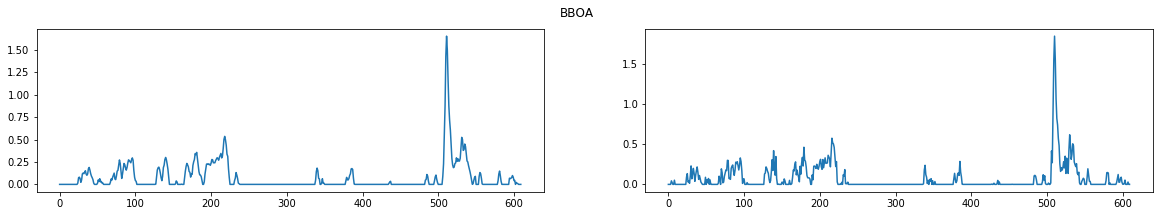

In [25]:
plt.rcParams["figure.figsize"] = (20,3)
for n, prof in enumerate(pro):
    fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.size(7,10)
    fig.suptitle(prof)
    ax1.plot(contirubtion[n])
    ax2.plot(contirubtion1[n])
    plt.show()